<a href="https://colab.research.google.com/github/iemanihsanalwi/Data-Associate-Graduate-Programme-2025/blob/main/Data_Associate_Graduate_Programme_2025_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load data

I used Python with the pandas library to import the dataset from a text file, which uses a "|" (pipe) character as the delimiter. The dataset contains 20,639 rows and 12 columns, representing various aspects of customer transaction records.

The columns include:
*   Transaction Number (trn_no)
* Account Number (acc_no)
* Customer Number (cus_no)
* Branch Code (brn_cd)
* Transaction Type (trn_type)
* Transaction Date (trn_dt)
* Transaction Time (trn_time)
* Transaction Amount (amt)
* Transaction Description (trn_desc)
* Transaction Channel (chn)
* Gender (gndr)
* Age (age)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/dummy dataset.txt'
df = pd.read_csv(file_path, sep='|')
print(df.head())

                 trn_no        acc_no        cus_no  brn_cd trn_type  \
0   1000397185520021516  135566817347  6.911975e+09  449836    DEBIT   
1  10009448378864689316  183264629830  9.919501e+09  339201    DEBIT   
2  10014592218323117335  463122589215  9.926739e+09  449836    DEBIT   
3  10017545544944981640  461697795470  4.349273e+09  339201   CREDIT   
4  10026211495480008202  513072841203  5.591584e+09  449836   CREDIT   

                     trn_dt  trn_time     amt       trn_desc chn    gndr   age  
0  2023-06-10T00:00:00.000Z    150515   100.0        PAYMENT  IB  FEMALE  51.0  
1  2023-07-11T00:00:00.000Z     33714   500.0  FUND TRANSFER  IB    MALE  53.0  
2  2023-08-27T00:00:00.000Z    155150   300.0        PAYMENT  IB  FEMALE  53.0  
3  2023-07-29T00:00:00.000Z    215843  5000.0  FUND TRANSFER  IB    MALE  56.0  
4  2023-07-28T00:00:00.000Z    125259    70.0  FUND TRANSFER  IB    MALE  48.0  


# 2. Initial Exploration

Check the data's structure, summary statistics and missing values. Looking at non-null count is not same across multiple features like 'chn', 'gndr', 'cus_no'. Meaning that these variables may contain null variables.

In [ ]:
# Display data types and non-null counts
print("\nDataFrame summary (structure and data types):")
df.info()


DataFrame summary (structure and data types):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20639 entries, 0 to 20638
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trn_no    20639 non-null  object 
 1   acc_no    20639 non-null  int64  
 2   cus_no    20637 non-null  float64
 3   brn_cd    20639 non-null  int64  
 4   trn_type  20639 non-null  object 
 5   trn_dt    20639 non-null  object 
 6   trn_time  20639 non-null  int64  
 7   amt       20639 non-null  float64
 8   trn_desc  20639 non-null  object 
 9   chn       20220 non-null  object 
 10  gndr      20636 non-null  object 
 11  age       20637 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 1.9+ MB


The summary statistics of numerical columns uncover valuable information like mean, count, minimum and maximum

In [ ]:
# Display summary statistics for numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())


Summary statistics of numerical columns:
             acc_no        cus_no         brn_cd       trn_time           amt  \
count  2.063900e+04  2.063700e+04   20639.000000   20639.000000  20639.000000   
mean   5.579128e+11  5.330933e+09  439759.654005  145740.715926    857.540106   
std    2.458174e+11  2.480406e+09  112051.530969   48082.849696   1635.894539   
min    1.165820e+11  1.027662e+09  143953.000000   32249.000000      0.100000   
25%    3.502946e+11  3.299539e+09  339201.000000  105545.500000     70.900000   
50%    5.379387e+11  5.400873e+09  449836.000000  144044.000000    210.000000   
75%    7.432619e+11  7.513228e+09  449836.000000  184740.000000    800.000000   
max    9.894913e+11  9.926739e+09  732189.000000  235742.000000  10000.000000   

                age  
count  20637.000000  
mean      51.494888  
std        8.054346  
min       25.000000  
25%       46.000000  
50%       51.000000  
75%       57.000000  
max       73.000000  


For 'cus_no', 'age' and 'gndr' have small amount of duplicated values but 'chn' has quite substantial amount of duplicated values. Investigate more-

In [ ]:
# Display the count of missing values per column
print("\nNumber of missing values per column:")
print(df.isnull().sum())


Number of missing values per column:
trn_no        0
acc_no        0
cus_no        2
brn_cd        0
trn_type      0
trn_dt        0
trn_time      0
amt           0
trn_desc      0
chn         419
gndr          3
age           2
dtype: int64



Columns with Low Missing Values — Remove Rows
* cus_no (Customer Number):
  - Only 2 missing out of ~20,000.
  - Unique identifier → imputation doesn’t make sense.
  - Safe to remove rows.

* gndr (Gender):
  - 3 missing values.
  - Imputing gender can introduce bias.
  - Better to remove rows.

* age:
  - 2 missing values.
  - While imputation is possible, removing avoids inaccuracies.
  - Removal preferred due to negligible impact.

Column with Substantial Missing Values — Investigate Further
* chn (Channel):
  - 419 missing values — more substantial.
  - Categorical nature → explore:
       - What are the existing categories?
       - Is there a “not specified” option?
       - Does the missingness follow a pattern?

  - Before removing:
      - Assess distribution and importance of chn.- Evaluate how removing 419 rows would affect your dataset.
    - If chn isn’t critical or 419 rows won’t impact analysis much, removal is okay.
    - Otherwise, further investigation or a placeholder category ("Unknown") may be warranted.

Next Steps
- Remove rows with missing values in:
      cus_no, gndr, and age.
- For chn:
      Explore its unique values and counts.
      Analyze the potential analytical cost of removing 419 rows.
      Decide based on the column’s importance and data impact.

## Missing Values


Remove rows with missing values in 'cus_no', 'gndr', 'age' and 'chn'


In [ ]:
# Remove rows where 'cus_no', 'gndr', or 'age' have missing values
df_cleaned_partial = df.dropna(subset=['cus_no', 'gndr', 'age'])

In [ ]:
# Verify the missing values in these columns after removal
print("\nMissing values in 'cus_no', 'gndr', and 'age' after removal:")
print(df_cleaned_partial[['cus_no', 'gndr', 'age']].isnull().sum())


Missing values in 'cus_no', 'gndr', and 'age' after removal:
cus_no    0
gndr      0
age       0
dtype: int64


In [ ]:
# Display the shape of the DataFrame before and after removal to see the number of rows removed
print(f"\nShape of DataFrame before removal: {df.shape}")
print(f"Shape of DataFrame after removal: {df_cleaned_partial.shape}")


Shape of DataFrame before removal: (20639, 12)
Shape of DataFrame after removal: (20632, 12)


Explore the 'chn' column. To identify the distinct values in 'chn' whether we want to impute or remove them

In [ ]:
# Explore the unique values and their counts in the 'chn' column
print("\nUnique values and their counts in the 'chn' column:")
print(df_cleaned_partial['chn'].value_counts(dropna=False))


Unique values and their counts in the 'chn' column:
chn
IB             16976
MEPS            1189
POS             1112
FPX              727
NaN              419
BRNCH / ATM      209
Name: count, dtype: int64


In [ ]:
# Calculate the percentage of missing values in 'chn' relative to the current DataFrame size
missing_chn_count = df_cleaned_partial['chn'].isnull().sum()
total_rows_cleaned = df_cleaned_partial.shape[0]
percentage_missing_chn = (missing_chn_count / total_rows_cleaned) * 100

In [ ]:
print(f"\nNumber of missing values in 'chn': {missing_chn_count}")
print(f"Total number of rows in the current DataFrame: {total_rows_cleaned}")
print(f"Percentage of missing values in 'chn': {percentage_missing_chn:.2f}%")


Number of missing values in 'chn': 419
Total number of rows in the current DataFrame: 20632
Percentage of missing values in 'chn': 2.03%


  Decide on Removal vs. Imputation:
  - Importance of 'chn' in my analysis (e.g., is it a key predictive feature?).- Proportion of missing values — if the percentage is small, removal might be acceptable.
  - Potential bias — does removing those rows disproportionately affect certain user segments?
  - Feasibility of imputation — could a category like “Unknown” or using the mode be logical and ethical?
  - Best call: **Remove the 419 rows**
        - It's small fraction of current dataset
        - There is no reliable method for imputation 'chn' based on its unique values
        - Guessing the values for 'chn' is riskier than removing the rows

Thre is no missing values anymore!

In [ ]:
# Remove rows where 'chn' has missing values from the partially cleaned DataFrame
df_cleaned_final = df_cleaned_partial.dropna(subset=['chn'])

# Verify the number of missing values in 'chn' in the final DataFrame
print("\nMissing values in 'chn' after removal:")
print(df_cleaned_final['chn'].isnull().sum())

# Display the shape of the DataFrame before and after this final removal
print(f"\nShape of DataFrame before removing 'chn' NaNs: {df_cleaned_partial.shape}")
print(f"Shape of DataFrame after removing 'chn' NaNs: {df_cleaned_final.shape}")

# Display the first few rows of the final cleaned DataFrame
print("\nFirst 5 rows of the final cleaned DataFrame:")
print(df_cleaned_final.head())

# Display the summary information of the final cleaned DataFrame
print("\nSummary information of the final cleaned DataFrame:")
df_cleaned_final.info()


Missing values in 'chn' after removal:
0

Shape of DataFrame before removing 'chn' NaNs: (20632, 12)
Shape of DataFrame after removing 'chn' NaNs: (20213, 12)

First 5 rows of the final cleaned DataFrame:
                 trn_no        acc_no        cus_no  brn_cd trn_type  \
0   1000397185520021516  135566817347  6.911975e+09  449836    DEBIT   
1  10009448378864689316  183264629830  9.919501e+09  339201    DEBIT   
2  10014592218323117335  463122589215  9.926739e+09  449836    DEBIT   
3  10017545544944981640  461697795470  4.349273e+09  339201   CREDIT   
4  10026211495480008202  513072841203  5.591584e+09  449836   CREDIT   

                     trn_dt  trn_time     amt       trn_desc chn    gndr   age  
0  2023-06-10T00:00:00.000Z    150515   100.0        PAYMENT  IB  FEMALE  51.0  
1  2023-07-11T00:00:00.000Z     33714   500.0  FUND TRANSFER  IB    MALE  53.0  
2  2023-08-27T00:00:00.000Z    155150   300.0        PAYMENT  IB  FEMALE  53.0  
3  2023-07-29T00:00:00.000Z    215843

## Duplicates

Identify duplicates in our cleaned data from missing values. Thre are 4978 of duplicates found in this dataset. Quite a big amount. Do we remove, substitute or retain them?

In [ ]:
# Identify duplicate rows based on all columns
duplicates = df_cleaned_final[df_cleaned_final.duplicated()]

# Print the number of duplicate rows found
print(f"Number of duplicate rows found: {len(duplicates)}")

# Display the duplicate rows
if not duplicates.empty:
    print("\nDuplicate rows:")
    print(duplicates)
else:
    print("\nNo duplicate rows found.")

Number of duplicate rows found: 4978

Duplicate rows:
                     trn_no        acc_no        cus_no  brn_cd trn_type  \
12003  11553451606237294847  193345169178  7.513228e+09  339201    DEBIT   
12005  42070801983989156941  193345169178  7.513228e+09  449836   CREDIT   
12008  12183405797908390364  193345169178  7.513228e+09  339201    DEBIT   
12009   7702788747595553101  193345169178  7.513228e+09  449836    DEBIT   
12010  25103987157207231465  193345169178  7.513228e+09  339201    DEBIT   
...                     ...           ...           ...     ...      ...   
20627  39828490639518465214  655843483502  6.112826e+09  339201    DEBIT   
20628   9620012440957978131  655843483502  6.112826e+09  449836   CREDIT   
20633   9565202352907211228  655843483502  6.112826e+09  339201    DEBIT   
20637   4623486297438670123  655843483502  6.112826e+09  339201    DEBIT   
20638  27595073566797127260  655843483502  6.112826e+09  449836    DEBIT   

                         trn_dt  

In [ ]:
# Analyze the value counts of key columns within the duplicate rows
print("\nValue counts of 'acc_no' in duplicate rows:")
print(duplicates['acc_no'].value_counts(normalize=True).head())

print("\nValue counts of 'trn_type' in duplicate rows:")
print(duplicates['trn_type'].value_counts(normalize=True))

print("\nValue counts of 'chn' in duplicate rows:")
print(duplicates['chn'].value_counts(normalize=True))

# Combine 'trn_dt' and 'trn_time' for analysis in duplicate rows
duplicates['trn_timestamp'] = duplicates['trn_dt'].astype(str) + ' ' + duplicates['trn_time'].astype(str).str.zfill(6)
print("\nTop value counts of 'trn_timestamp' in duplicate rows:")
print(duplicates['trn_timestamp'].value_counts().head(10))

# Drop the temporary 'trn_timestamp' column
duplicates = duplicates.drop(columns=['trn_timestamp'])


Value counts of 'acc_no' in duplicate rows:
acc_no
513072841203    0.073524
268674498118    0.067899
302075399531    0.061470
975681872782    0.047007
455197916236    0.045802
Name: proportion, dtype: float64

Value counts of 'trn_type' in duplicate rows:
trn_type
DEBIT     0.726195
CREDIT    0.273805
Name: proportion, dtype: float64

Value counts of 'chn' in duplicate rows:
chn
IB    1.0
Name: proportion, dtype: float64

Top value counts of 'trn_timestamp' in duplicate rows:
trn_timestamp
2023-07-05T00:00:00.000Z 095211    5
2023-07-22T00:00:00.000Z 173945    5
2023-08-03T00:00:00.000Z 145812    5
2023-08-30T00:00:00.000Z 174304    5
2023-06-01T00:00:00.000Z 042146    4
2023-06-28T00:00:00.000Z 093917    4
2023-07-27T00:00:00.000Z 185112    4
2023-08-20T00:00:00.000Z 200352    3
2023-06-29T00:00:00.000Z 034532    3
2023-08-27T00:00:00.000Z 040308    3
Name: count, dtype: int64



- Initial Findings
    - 4978 duplicates found out of 20,213 rows — approximately 25% of the dataset.
    - This high proportion raised red flags for potential bias and data quality issues.
- In-Depth Investigation
     - Key columns examined: 'cus_no', 'trn_dt', 'trn_time', 'trn_timestamp', 'trn_type', 'chn'
     - Timestamps are only precise to the second — possible that transactions with the same time down to the second are not truly duplicates if milliseconds were available in the original system.
- Patterns Observed
     - Account Clustering: A few accounts (e.g., 513072841203) show up frequently among duplicates (7.35% of all duplicates).
     - Transaction Type: Majority are 'DEBIT' (72.62%), indicating duplication leans heavily toward outgoing transactions.
     - Channel: 100% of duplicates occurred via the 'IB' (Internet Banking) channel — clear hint at a channel-specific system issue.
     - Exact Timestamps: Some transactions are identical down to the second, suggesting system-level duplication rather than legitimate customer activity.

Conclusion & Recommendation

Given the identical timestamps, Internet Banking channel exclusivity, and account clustering, these duplicates likely stem from a systemic logging error, not actual user behavior. Therefore, removing the duplicates is recommended to:

    - Preserve data integrity
    - Avoid inflated transaction counts or amounts
    - Ensure accurate time-series or behavioral analysis

Say no more to duplicates

In [ ]:
# Remove duplicate rows, keeping the first occurrence
df_final_no_duplicates = df_cleaned_final.drop_duplicates()

# Print the shape of the DataFrame before and after removing duplicates
print(f"Shape of DataFrame before removing duplicates: {df_cleaned_final.shape}")
print(f"Shape of DataFrame after removing duplicates: {df_final_no_duplicates.shape}")

# Verify that there are no more duplicates
print("\nNumber of duplicate rows after removal:")
print(df_final_no_duplicates.duplicated().sum())

# Display the first few rows of the final DataFrame without duplicates
print("\nFirst 5 rows of the final DataFrame without duplicates:")
print(df_final_no_duplicates.head())

# Display the summary information of the final DataFrame without duplicates
print("\nSummary information of the final DataFrame without duplicates:")
df_final_no_duplicates.info()

Shape of DataFrame before removing duplicates: (20213, 12)
Shape of DataFrame after removing duplicates: (15235, 12)

Number of duplicate rows after removal:
0

First 5 rows of the final DataFrame without duplicates:
                 trn_no        acc_no        cus_no  brn_cd trn_type  \
0   1000397185520021516  135566817347  6.911975e+09  449836    DEBIT   
1  10009448378864689316  183264629830  9.919501e+09  339201    DEBIT   
2  10014592218323117335  463122589215  9.926739e+09  449836    DEBIT   
3  10017545544944981640  461697795470  4.349273e+09  339201   CREDIT   
4  10026211495480008202  513072841203  5.591584e+09  449836   CREDIT   

                     trn_dt  trn_time     amt       trn_desc chn    gndr   age  
0  2023-06-10T00:00:00.000Z    150515   100.0        PAYMENT  IB  FEMALE  51.0  
1  2023-07-11T00:00:00.000Z     33714   500.0  FUND TRANSFER  IB    MALE  53.0  
2  2023-08-27T00:00:00.000Z    155150   300.0        PAYMENT  IB  FEMALE  53.0  
3  2023-07-29T00:00:00.000

In [ ]:
def assess_data_quality(df):
    """
    Assesses the data quality of a pandas DataFrame based on key dimensions.

    Args:
        df (pd.DataFrame): The DataFrame to assess.

    Returns:
        dict: A dictionary containing the results of each data quality check.
    """
    quality_report = {}

    # 1. Completeness (Re-check after removing missing values)
    quality_report['completeness'] = {
        'total_missing_values': df.isnull().sum().sum(),
        'missing_values_per_column': df.isnull().sum().to_dict()
    }

    # 2. Uniqueness (Re-check after removing duplicates)
    quality_report['uniqueness'] = {
        'duplicate_rows': df.duplicated().sum()
    }

    # 3. Consistency Checks
    quality_report['consistency'] = {}

    # Check consistent date format in 'trn_dt'
    try:
        pd.to_datetime(df['trn_dt'])
        quality_report['consistency']['trn_dt_consistent_format'] = True
    except ValueError:
        quality_report['consistency']['trn_dt_consistent_format'] = False

    # Get unique values in 'trn_type' and 'chn' for manual review
    quality_report['consistency']['unique_transaction_types'] = df['trn_type'].unique().tolist()
    quality_report['consistency']['unique_channels'] = df['chn'].unique().tolist()
    quality_report['consistency']['potential_inconsistent_trn_type'] = len(df['trn_type'].unique()) > 5 # Example threshold, adjust as needed
    quality_report['consistency']['potential_inconsistent_chn'] = len(df['chn'].unique()) > 10 # Example threshold, adjust as needed

    # 4. Validity Checks
    quality_report['validity'] = {}

    # Check for reasonable age values (assuming age should be positive and within a reasonable range)
    quality_report['validity']['invalid_age_count'] = df[(df['age'] <= 0) | (df['age'] > 120)]['age'].count()

    # Check if transaction amount is non-negative
    quality_report['validity']['negative_amount_count'] = df[df['amt'] < 0]['amt'].count()

    # 5. Accuracy Checks (Outlier Detection in 'amt')
    quality_report['accuracy'] = {}

    Q1 = df['amt'].quantile(0.25)
    Q3 = df['amt'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]
    quality_report['accuracy']['outlier_amount_count'] = outliers.shape[0]
    quality_report['accuracy']['amount_outlier_thresholds'] = {'lower': lower_bound, 'upper': upper_bound}

    # 6. Timeliness Checks (Checking date format only)
    quality_report['timeliness'] = {}
    quality_report['timeliness']['trn_dt_format_valid'] = quality_report['consistency']['trn_dt_consistent_format']

    return quality_report

# Assuming your cleaned DataFrame is named df_final_no_duplicates
data_quality_report = assess_data_quality(df_final_no_duplicates.copy()) # Use .copy() to avoid modifying the original DataFrame

# Print the data quality report
for dimension, results in data_quality_report.items():
    print(f"\n--- {dimension.upper()} ---")
    for metric, value in results.items():
        print(f"{metric}: {value}")


--- COMPLETENESS ---
total_missing_values: 0
missing_values_per_column: {'trn_no': 0, 'acc_no': 0, 'cus_no': 0, 'brn_cd': 0, 'trn_type': 0, 'trn_dt': 0, 'trn_time': 0, 'amt': 0, 'trn_desc': 0, 'chn': 0, 'gndr': 0, 'age': 0}

--- UNIQUENESS ---
duplicate_rows: 0

--- CONSISTENCY ---
trn_dt_consistent_format: True
unique_transaction_types: ['DEBIT', 'CREDIT']
unique_channels: ['IB', 'MEPS', 'POS', 'FPX', 'BRNCH / ATM']
potential_inconsistent_trn_type: False
potential_inconsistent_chn: False

--- VALIDITY ---
invalid_age_count: 0
negative_amount_count: 0

--- ACCURACY ---
outlier_amount_count: 2017
amount_outlier_thresholds: {'lower': np.float64(-898.8625000000001), 'upper': np.float64(1671.4375)}

--- TIMELINESS ---
trn_dt_format_valid: True


In [ ]:
print(df_final_no_duplicates.columns)

Index(['trn_no', 'acc_no', 'cus_no', 'brn_cd', 'trn_type', 'trn_dt',
       'trn_time', 'amt', 'trn_desc', 'chn', 'gndr', 'age'],
      dtype='object')


# 3. Descriptive Analysis Part I


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Numerical Columns

In [ ]:
numerical_cols = ['acc_no', 'cus_no', 'brn_cd', 'trn_time', 'age', 'amt']

# Get the descriptive statistics
desc_stats = df_final_no_duplicates[numerical_cols].describe().copy()

# Format specific columns to remove decimal places
for col in ['acc_no', 'cus_no', 'brn_cd', 'trn_time', 'age']:
    desc_stats[col] = desc_stats[col].astype(str).apply(lambda x: f'{float(x):.0f}')

# Format the 'amt' column to two decimal places
desc_stats['amt'] = desc_stats['amt'].astype(str).apply(lambda x: f'{float(x):.2f}')

# Print the formatted descriptive statistics
print("Descriptive Statistics for Numerical Columns:")
print(desc_stats)

Descriptive Statistics for Numerical Columns:
             acc_no      cus_no  brn_cd trn_time    age       amt
count         15235       15235   15235    15235  15235  15235.00
mean   558307213871  5248739572  452464   146501     51    796.20
std    243560899017  2573037564  121136    47977      8   1558.32
min    116582005497  1027661837  143953    32249     25      0.10
25%    351673304609  2742357842  339201   110349     46     65.00
50%    537938736476  4825468780  449836   144630     52    200.00
75%    743261936180  7513227576  449836   185417     57    707.58
max    989491322260  9926739320  732189   235742     73  10000.00


## Categorical Columns

In [ ]:
categorical_cols = ['trn_type', 'chn', 'trn_desc']

for col in categorical_cols:
    print(f"\n--- Value Counts for {col.upper()} ---")
    value_counts = df_final_no_duplicates[col].value_counts()
    percentages = df_final_no_duplicates[col].value_counts(normalize=True) * 100
    display_df = pd.DataFrame({'Frequency': value_counts, 'Percentage': percentages.map('{:.2f}%'.format)})
    print(display_df)


--- Value Counts for TRN_TYPE ---
          Frequency Percentage
trn_type                      
DEBIT         11949     78.43%
CREDIT         3286     21.57%

--- Value Counts for CHN ---
             Frequency Percentage
chn                              
IB               11998     78.75%
MEPS              1189      7.80%
POS               1112      7.30%
FPX                727      4.77%
BRNCH / ATM        209      1.37%

--- Value Counts for TRN_DESC ---
               Frequency Percentage
trn_desc                           
FUND TRANSFER      10567     69.36%
PAYMENT             3347     21.97%
SALE DEBIT          1112      7.30%
CDEP                 209      1.37%


## Time-based Columns
Now we know that this dataset is collected for Q3 2023 period starting from 1/6/2023 until 31/8/2023

In [ ]:
# Ensure 'trn_dt' is in datetime format before using .dt accessor
df_final_no_duplicates['trn_dt'] = pd.to_datetime(df_final_no_duplicates['trn_dt'])

# Statistics for Dates
earliest_date = df_final_no_duplicates['trn_dt'].min()
latest_date = df_final_no_duplicates['trn_dt'].max()
unique_dates = df_final_no_duplicates['trn_dt'].nunique()

print("\n--- Transaction Date Analysis ---")
print(f"Earliest Transaction Date: {earliest_date}")
print(f"Latest Transaction Date: {latest_date}")
print(f"Number of Unique Transaction Dates: {unique_dates}")

# 2. Frequency Analysis
print("\n--- Transactions per Month ---")
print(df_final_no_duplicates['trn_dt'].dt.to_period('M').value_counts().sort_index())

print("\n--- Transactions per Day of the Week ---")
print(df_final_no_duplicates['trn_dt'].dt.day_name().value_counts())

# 3. Daily Transaction Volume and Amount Analysis
daily_stats = df_final_no_duplicates.groupby('trn_dt').agg(
    total_volume=('trn_no', 'count'),
    total_amount=('amt', 'sum')
)

most_volume_date = daily_stats['total_volume'].idxmax()
most_volume = daily_stats.loc[most_volume_date, 'total_volume']

least_volume_date = daily_stats['total_volume'].idxmin()
least_volume = daily_stats.loc[least_volume_date, 'total_volume']

most_amount_date = daily_stats['total_amount'].idxmax()
most_amount = daily_stats.loc[most_amount_date, 'total_amount']

least_amount_date = daily_stats['total_amount'].idxmin()
least_amount = daily_stats.loc[least_amount_date, 'total_amount']

print("\n--- Daily Transaction Volume and Amount Extremes ---")
print(f"Date with Most Transaction Volume: {most_volume_date} (Transactions: {most_volume})")
print(f"Date with Least Transaction Volume: {least_volume_date} (Transactions: {least_volume})")
print(f"Date with Highest Transaction Amount: {most_amount_date} (Amount: RM {most_amount:,.2f})")
print(f"Date with Lowest Transaction Amount: {least_amount_date} (Amount: RM {least_amount:,.2f})")


--- Transaction Date Analysis ---
Earliest Transaction Date: 2023-06-01 00:00:00
Latest Transaction Date: 2023-08-31 00:00:00
Number of Unique Transaction Dates: 92

--- Transactions per Month ---
trn_dt
2023-06    4862
2023-07    5331
2023-08    5042
Freq: M, Name: count, dtype: int64

--- Transactions per Day of the Week ---
trn_dt
Tuesday      2382
Thursday     2325
Wednesday    2312
Monday       2240
Friday       2196
Saturday     1972
Sunday       1808
Name: count, dtype: int64

--- Daily Transaction Volume and Amount Extremes ---
Date with Most Transaction Volume: 2023-08-30 00:00:00 (Transactions: 249)
Date with Least Transaction Volume: 2023-06-18 00:00:00 (Transactions: 107)
Date with Highest Transaction Amount: 2023-06-28 00:00:00 (Amount: RM 267,153.50)
Date with Lowest Transaction Amount: 2023-07-16 00:00:00 (Amount: RM 47,235.90)


## Transaction Volume Over Time

Transaction volume generally stays within a consistent range from **June to August 2023**, without a clear long-term upward or downward trend.There some noticeable peaks and dips suggest day-of-week effects or specific events (e.g., paydays, weekends, holidays) may influence transaction behavior. Daily volumes aren't uniform, reflecting natural fluctuations in customer activity. A noticeable increase in activity at the end of August could point to a significant event or trend shift worth exploring further.

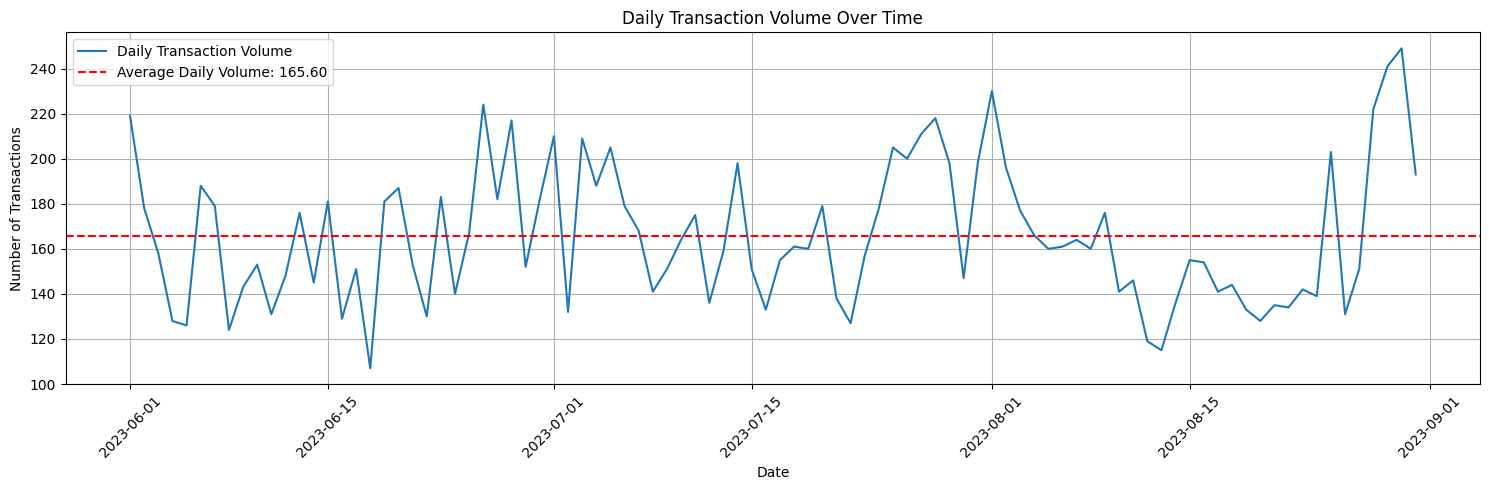

In [ ]:
# Ensure 'trn_dt' is in datetime format
df_final_no_duplicates.loc[:, 'trn_dt'] = pd.to_datetime(df_final_no_duplicates['trn_dt']).dt.date

# Calculate daily transaction volume
daily_volume = df_final_no_duplicates['trn_dt'].value_counts().sort_index()

# Calculate average daily transaction volume
average_daily_volume = daily_volume.mean()

plt.figure(figsize=(15, 5))
plt.plot(daily_volume.index, daily_volume.values, label='Daily Transaction Volume')
plt.axhline(y=average_daily_volume, color='r', linestyle='--', label=f'Average Daily Volume: {average_daily_volume:.2f}')
plt.title('Daily Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

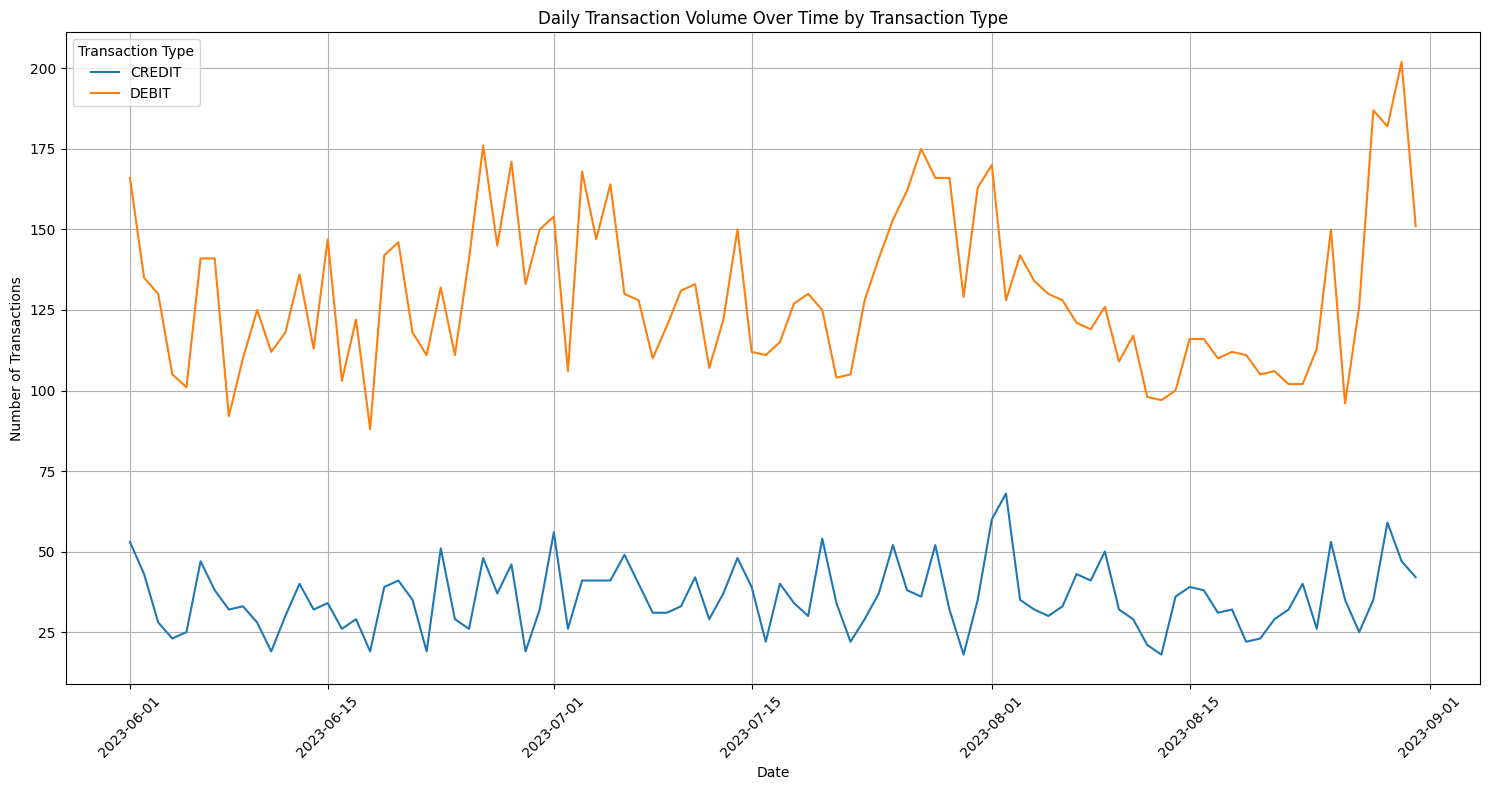

In [ ]:
# Group by date and transaction type, then calculate the count of transactions (volume)
daily_volume_by_type = df_final_no_duplicates.groupby(['trn_dt', 'trn_type'])['trn_no'].count().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(15, 8))

# Plot the daily volume for each transaction type
for column in daily_volume_by_type.columns:
    plt.plot(daily_volume_by_type.index, daily_volume_by_type[column], label=f'{column}')

# Set labels and title
plt.title('Daily Transaction Volume Over Time by Transaction Type')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()

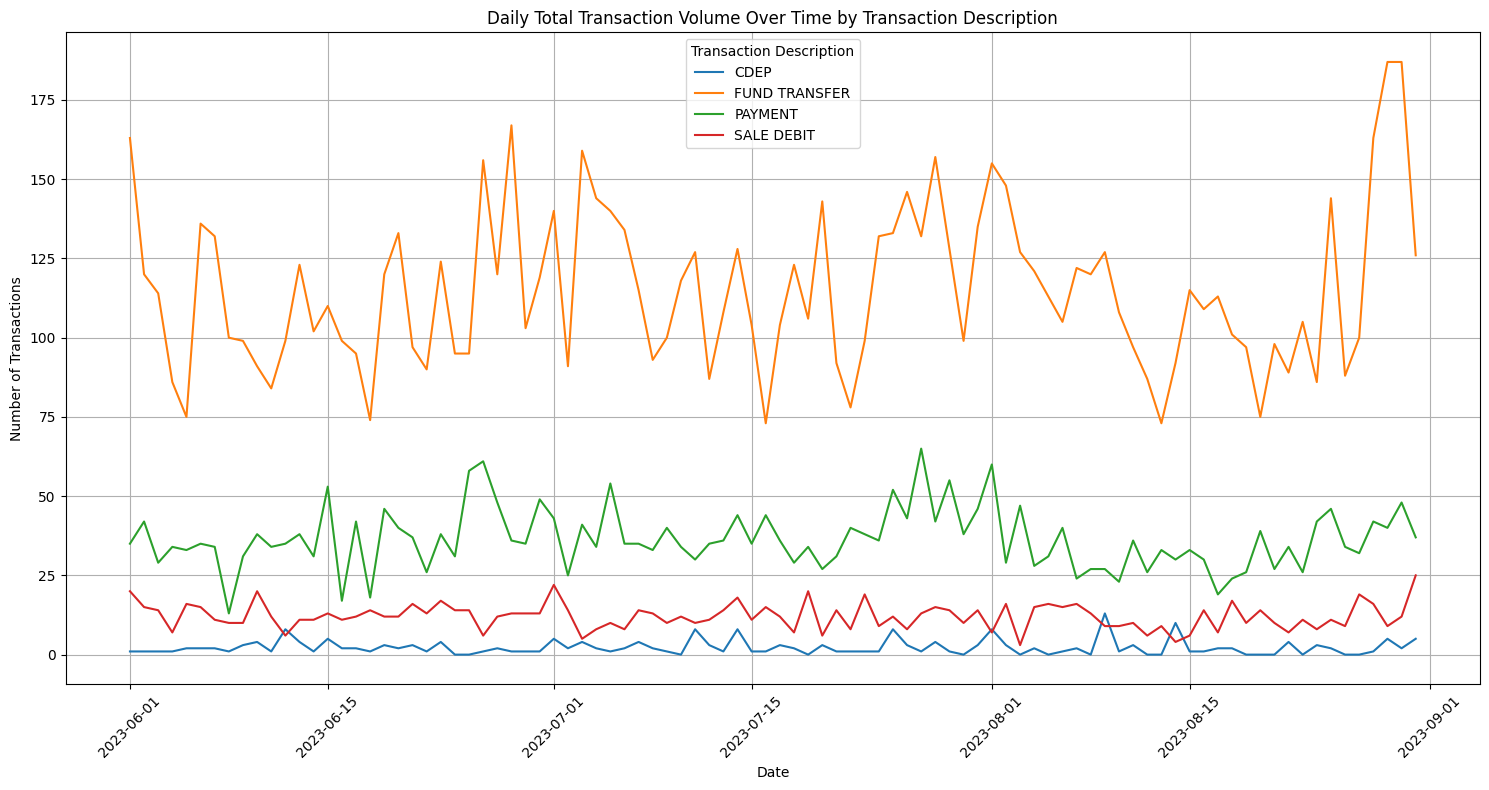

In [ ]:
daily_amount_by_desc = df_final_no_duplicates.groupby(['trn_dt', 'trn_desc'])['trn_no'].count().unstack(fill_value=0)

# Get the list of unique transaction descriptions for consistent ordering in the legend
unique_descriptions = daily_amount_by_desc.columns.tolist()

# Create the plot
plt.figure(figsize=(15, 8))

# Plot the daily amount for each transaction description
for description in unique_descriptions:
    plt.plot(daily_amount_by_desc.index, daily_amount_by_desc[description], label=f'{description}')

# Set labels and title
plt.title('Daily Total Transaction Volume Over Time by Transaction Description')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Transaction Description')
plt.tight_layout()
plt.show()

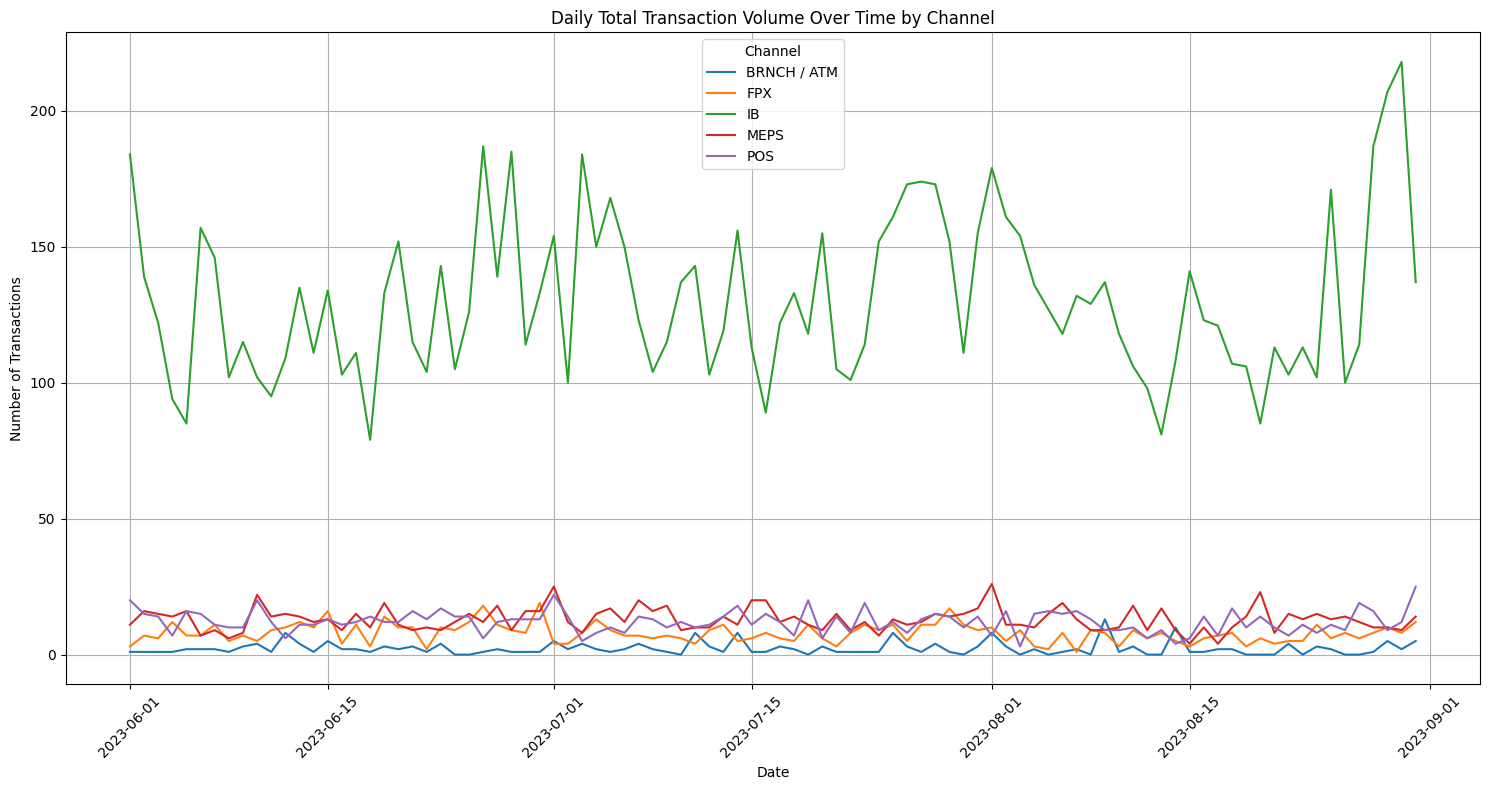

In [ ]:
# Group by date and transaction description, then calculate the sum of transaction amounts
daily_amount_by_desc = df_final_no_duplicates.groupby(['trn_dt', 'chn'])['trn_no'].count().unstack(fill_value=0)

# Get the list of unique transaction descriptions for consistent ordering in the legend
unique_descriptions = daily_amount_by_desc.columns.tolist()

# Create the plot
plt.figure(figsize=(15, 8))

# Plot the daily amount for each transaction description
for description in unique_descriptions:
    plt.plot(daily_amount_by_desc.index, daily_amount_by_desc[description], label=f'{description}')

# Set labels and title
plt.title('Daily Total Transaction Volume Over Time by Channel')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

## Transaction Amount Over Time
The plot reveals a dynamic daily transaction amount with considerable volatility around a stable average. Further analysis could focus on identifying the drivers behind the peaks, troughs, and any underlying periodic patterns to gain deeper insights into the transaction behavior over time.

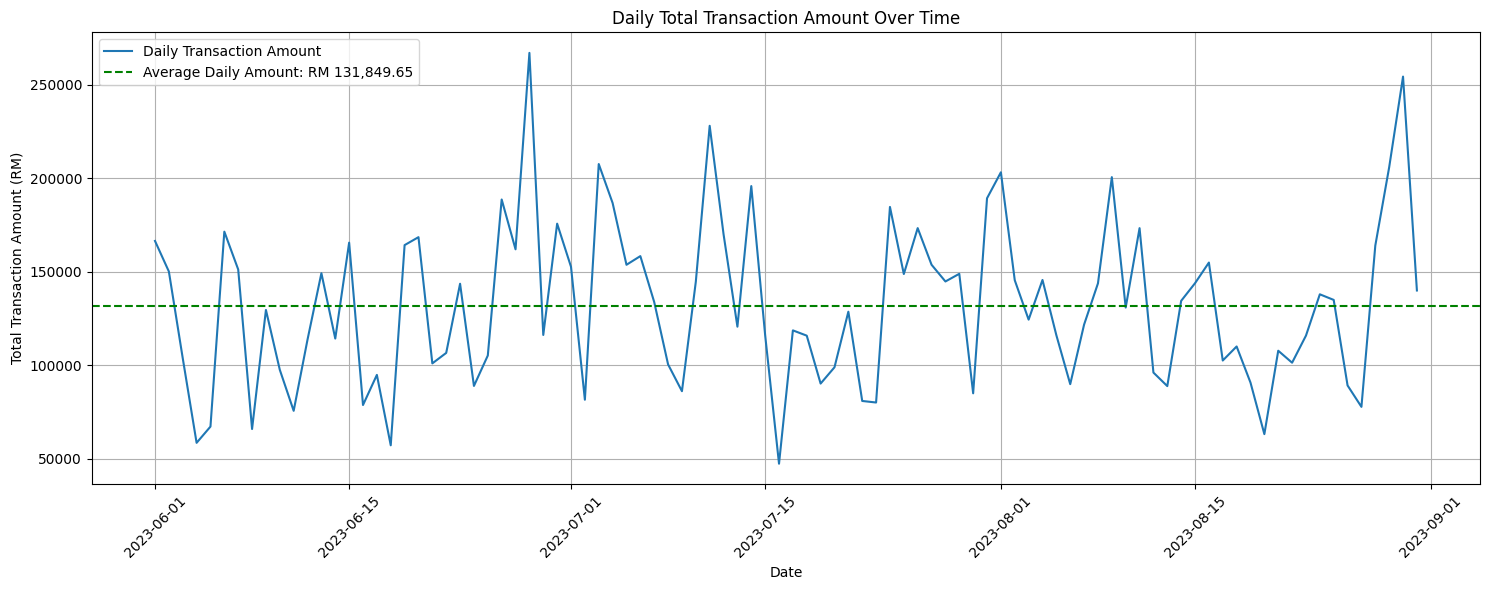

In [ ]:
# Group by date and calculate the sum of transaction amounts
daily_amount = df_final_no_duplicates.groupby('trn_dt')['amt'].sum()

# Calculate the average daily transaction amount
average_daily_amount = daily_amount.mean()

plt.figure(figsize=(15, 6))
plt.plot(daily_amount.index, daily_amount.values, label='Daily Transaction Amount')
plt.axhline(y=average_daily_amount, color='g', linestyle='--', label=f'Average Daily Amount: RM {average_daily_amount:,.2f}')
plt.title('Daily Total Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount (RM)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

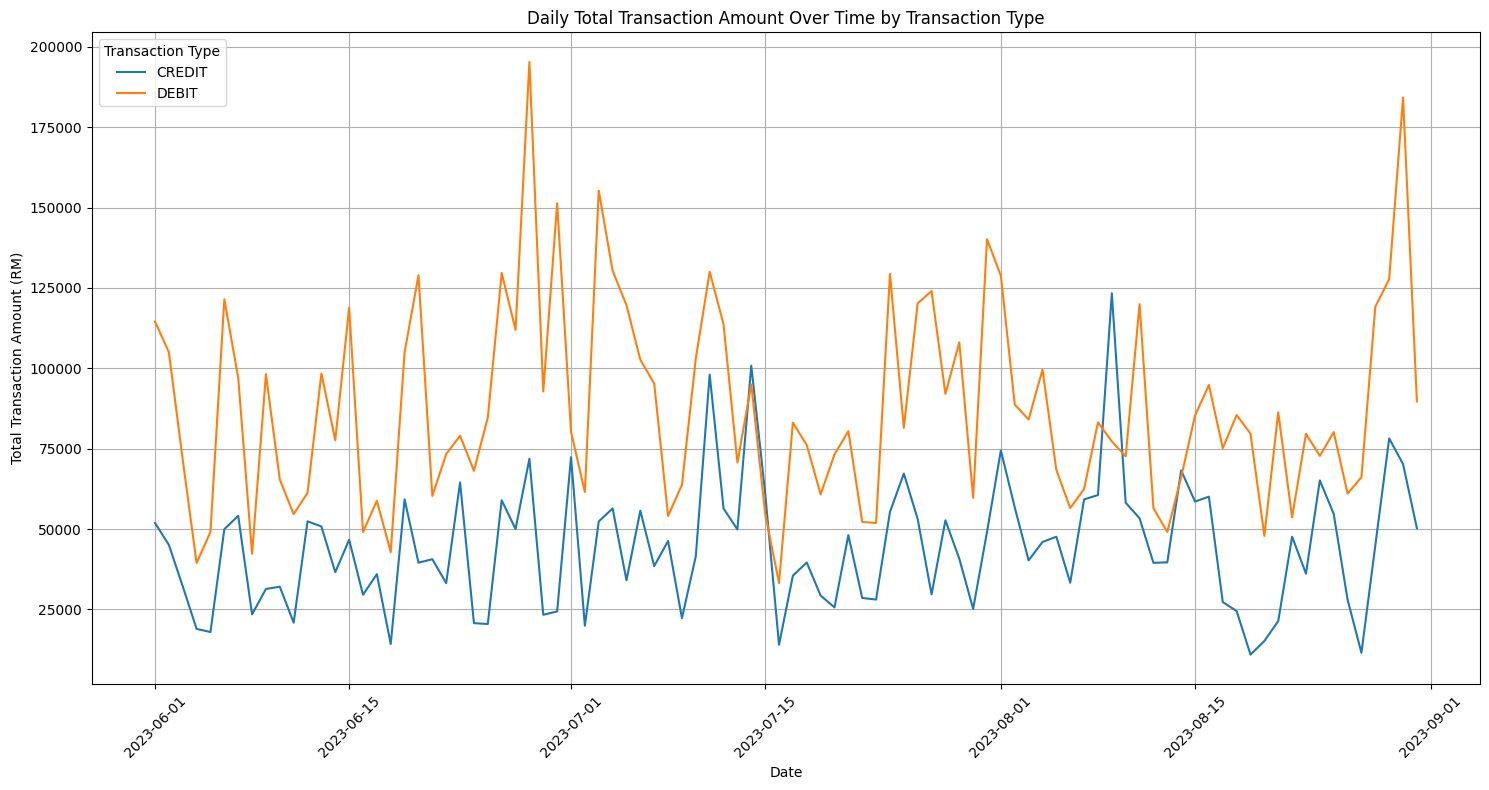

In [ ]:
# Group by date and transaction type, then calculate the sum of transaction amounts
daily_amount_by_type = df_final_no_duplicates.groupby(['trn_dt', 'trn_type'])['amt'].sum().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(15, 8))

# Plot the daily amount for each transaction type
for column in daily_amount_by_type.columns:
    plt.plot(daily_amount_by_type.index, daily_amount_by_type[column], label=f'{column}')

# Set labels and title
plt.title('Daily Total Transaction Amount Over Time by Transaction Type')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount (RM)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()

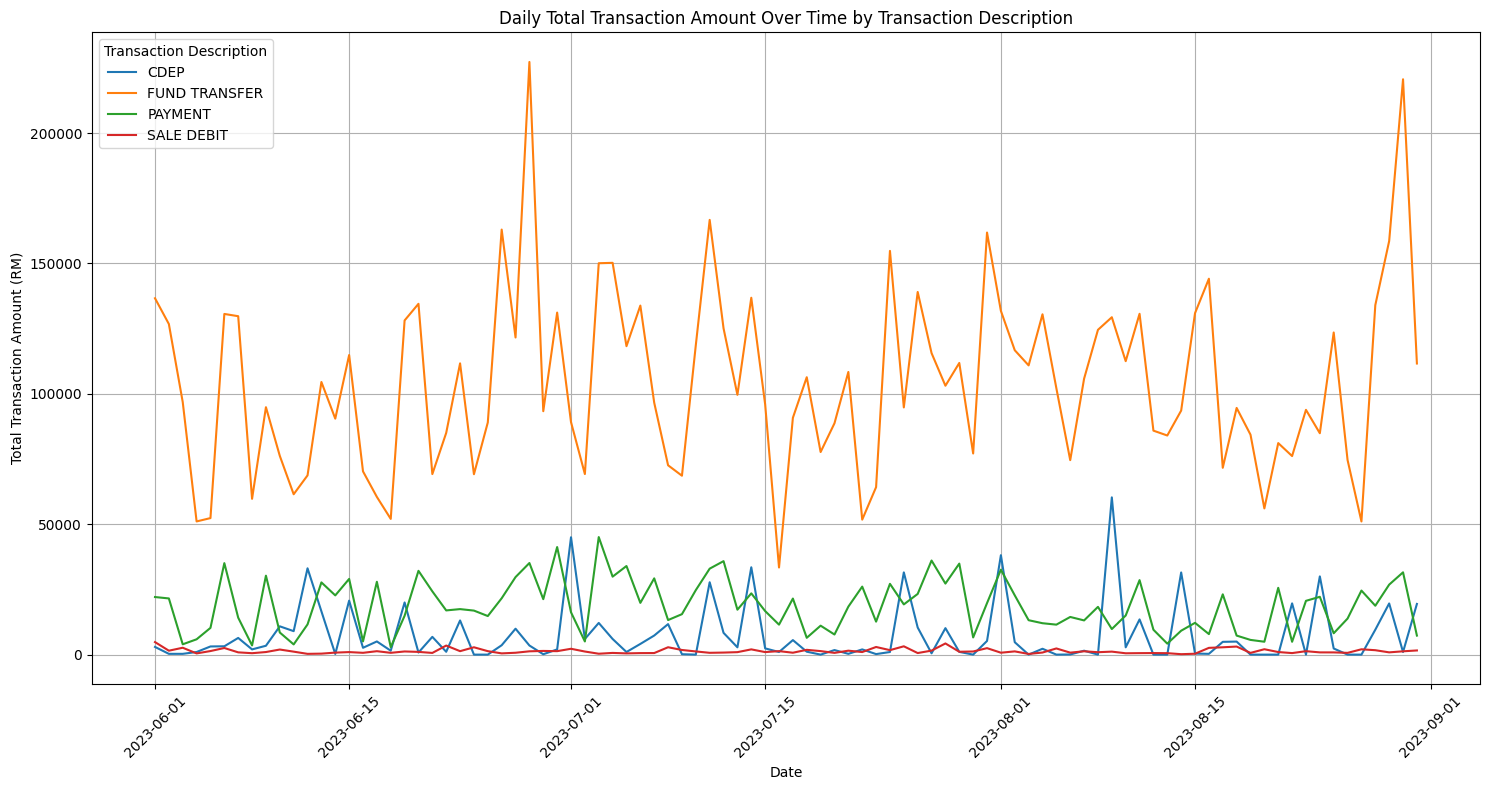

In [ ]:
# Group by date and transaction description, then calculate the sum of transaction amounts
daily_amount_by_desc = df_final_no_duplicates.groupby(['trn_dt', 'trn_desc'])['amt'].sum().unstack(fill_value=0)

# Get the list of unique transaction descriptions for consistent ordering in the legend
unique_descriptions = daily_amount_by_desc.columns.tolist()

# Create the plot
plt.figure(figsize=(15, 8))

# Plot the daily amount for each transaction description
for description in unique_descriptions:
    plt.plot(daily_amount_by_desc.index, daily_amount_by_desc[description], label=f'{description}')

# Set labels and title
plt.title('Daily Total Transaction Amount Over Time by Transaction Description')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount (RM)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Transaction Description')
plt.tight_layout()
plt.show()

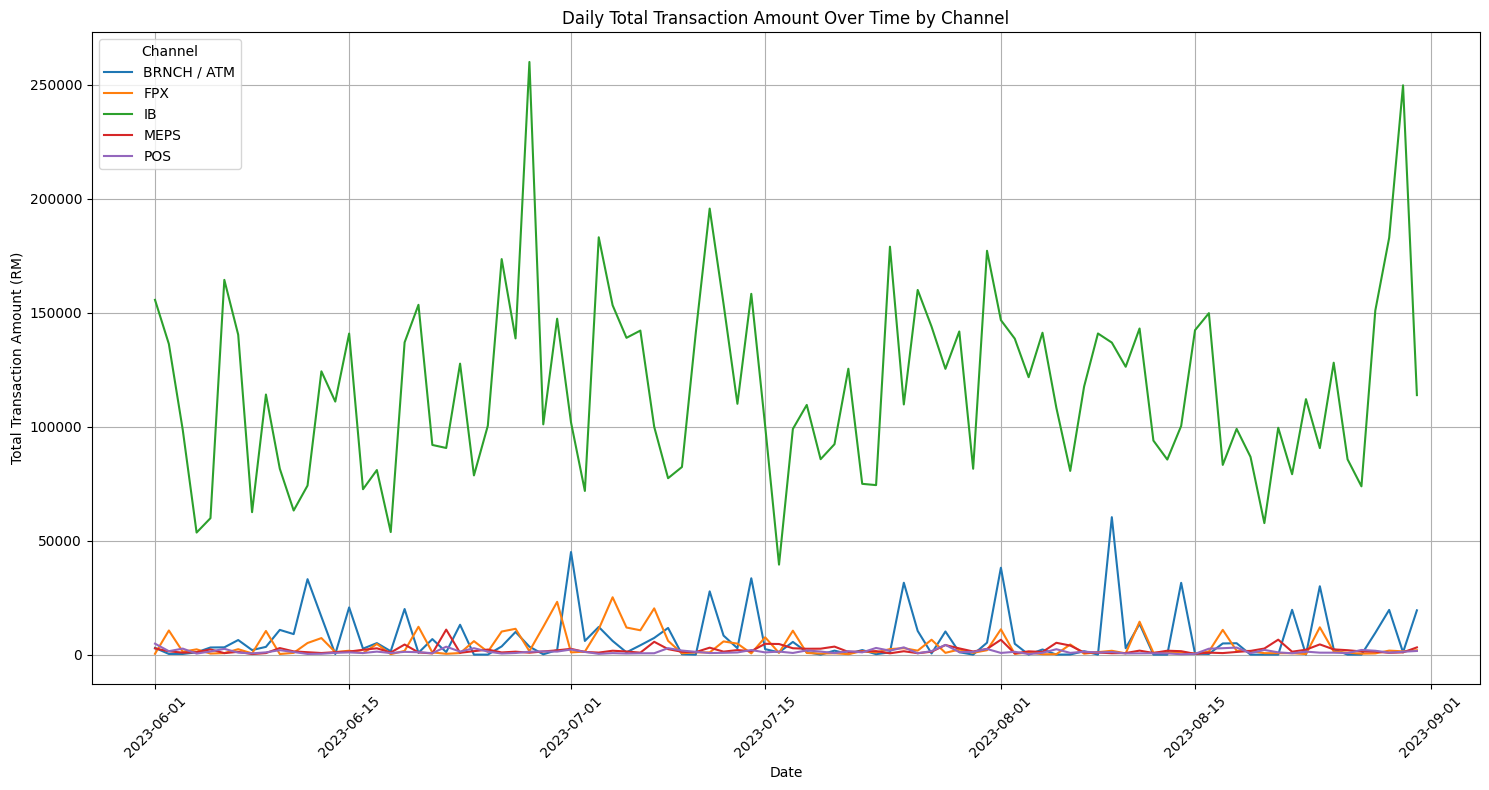

In [ ]:
# Group by date and transaction description, then calculate the sum of transaction amounts
daily_amount_by_desc = df_final_no_duplicates.groupby(['trn_dt', 'chn'])['amt'].sum().unstack(fill_value=0)

# Get the list of unique transaction descriptions for consistent ordering in the legend
unique_descriptions = daily_amount_by_desc.columns.tolist()

# Create the plot
plt.figure(figsize=(15, 8))

# Plot the daily amount for each transaction description
for description in unique_descriptions:
    plt.plot(daily_amount_by_desc.index, daily_amount_by_desc[description], label=f'{description}')

# Set labels and title
plt.title('Daily Total Transaction Amount Over Time by Channel')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount (RM)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

## Comparison between Transaction Amount and Volume Over Time

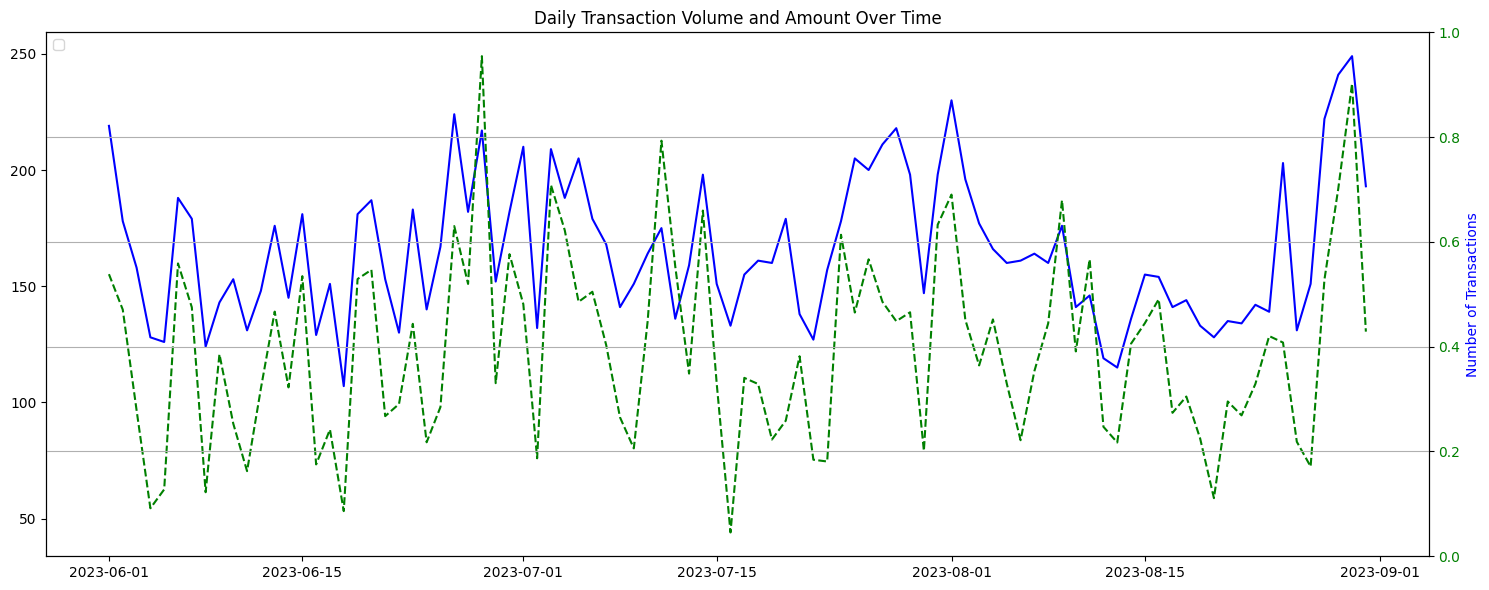

In [ ]:
# Calculate daily transaction volume
daily_volume = df_final_no_duplicates['trn_dt'].value_counts().sort_index()

# Calculate daily total transaction amount
daily_amount = df_final_no_duplicates.groupby('trn_dt')['amt'].sum()

# Create the plot
plt.figure(figsize=(15, 6))

# Plot daily transaction volume
plt.plot(daily_volume.index, daily_volume.values, label='Daily Transaction Volume', color='blue')

# Plot daily total transaction amount (scaled for better visualization)
# You might need to adjust the scaling factor based on the typical range of your amount
scaling_factor = daily_volume.max() / daily_amount.max() if daily_amount.max() != 0 else 1
plt.plot(daily_amount.index, daily_amount.values * scaling_factor, label='Daily Transaction Amount (Scaled)', color='green', linestyle='--')

# Add a secondary y-axis for the transaction amount
ax2 = plt.gca().twinx()
ax2.set_ylabel('Total Transaction Amount (Scaled)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set labels and title
plt.title('Daily Transaction Volume and Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions', color='blue')
plt.xticks(rotation=45)
plt.grid(True)

# Combine legends from both axes
lines, labels = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

##  Branch

The presence of 18 distinct branch codes indicates that transactions are occurring across multiple branches, and we might want to further investigate if certain branches handle a significantly higher volume of transactions. We found that the branch with the most frequent transactions (Branch Code: 449836 with 6775 transactions) is also the branch with the highest total transfer amount (RM 5,562,523.33).



In [ ]:
# Get distinct counts for specified columns
distinct_counts = {
    'Branches': df_final_no_duplicates['brn_cd'].nunique(),
    'Transactions': df_final_no_duplicates['trn_no'].nunique(),
}

print("--- Distinct Counts ---")
for category, count in distinct_counts.items():
    print(f"Number of distinct {category}: {count}")


--- Distinct Counts ---
Number of distinct Branches: 18
Number of distinct Transactions: 15235


In [ ]:
# Group by customer number and count the number of unique branch codes for each customer
customer_branch_counts = df_final_no_duplicates.groupby('cus_no')['brn_cd'].nunique()

# Find customers who have transactions in more than one branch
customers_multiple_branches = customer_branch_counts[customer_branch_counts > 1]

# Print the results
print("\n--- Customers with Transactions in Multiple Branches ---")
if not customers_multiple_branches.empty:
    print(customers_multiple_branches)
    print(f"\nNumber of customers with transactions in more than one branch: {len(customers_multiple_branches)}")
else:
    print("No customers found with transactions in more than one branch.")


--- Customers with Transactions in Multiple Branches ---
cus_no
1.027662e+09    6
1.115485e+09    2
1.247512e+09    2
1.502753e+09    2
1.540948e+09    8
               ..
9.747354e+09    2
9.768227e+09    2
9.795745e+09    2
9.919501e+09    2
9.926739e+09    2
Name: brn_cd, Length: 94, dtype: int64

Number of customers with transactions in more than one branch: 94


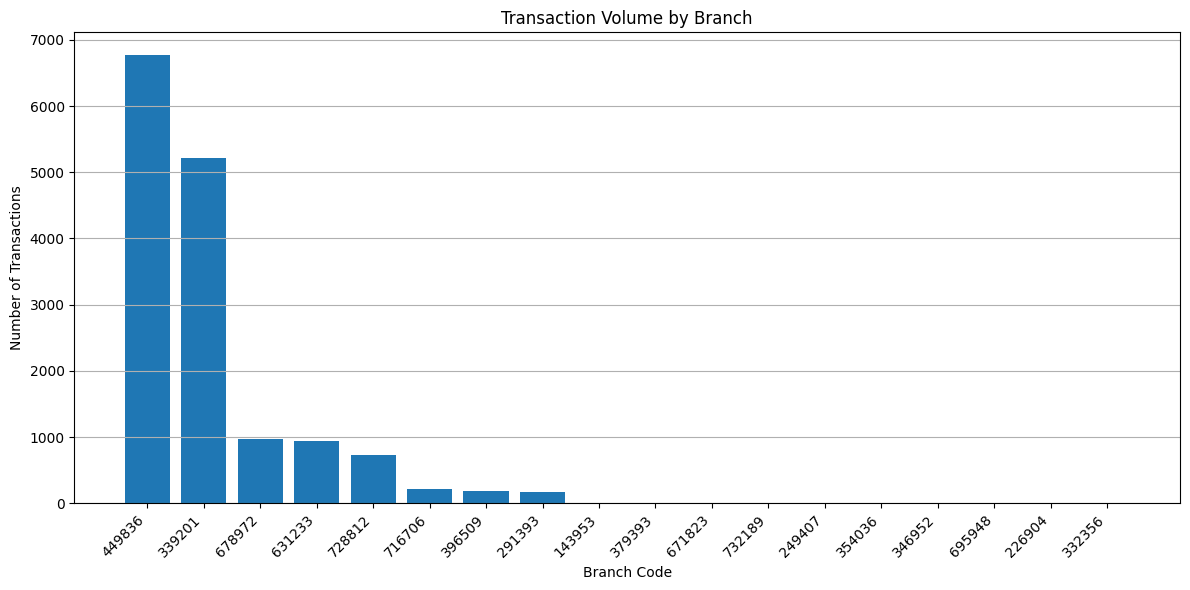

In [ ]:
# Group by branch code and count transactions
branch_transaction_counts = df_final_no_duplicates['brn_cd'].value_counts().sort_values(ascending=False)

# Visualize branch transaction counts
plt.figure(figsize=(12, 6))
plt.bar(branch_transaction_counts.index.astype(str), branch_transaction_counts.values) # Convert index to string
plt.title('Transaction Volume by Branch')
plt.xlabel('Branch Code')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right') # Rotate and align x-axis labels
plt.grid(axis='y')
plt.tight_layout()
plt.show()

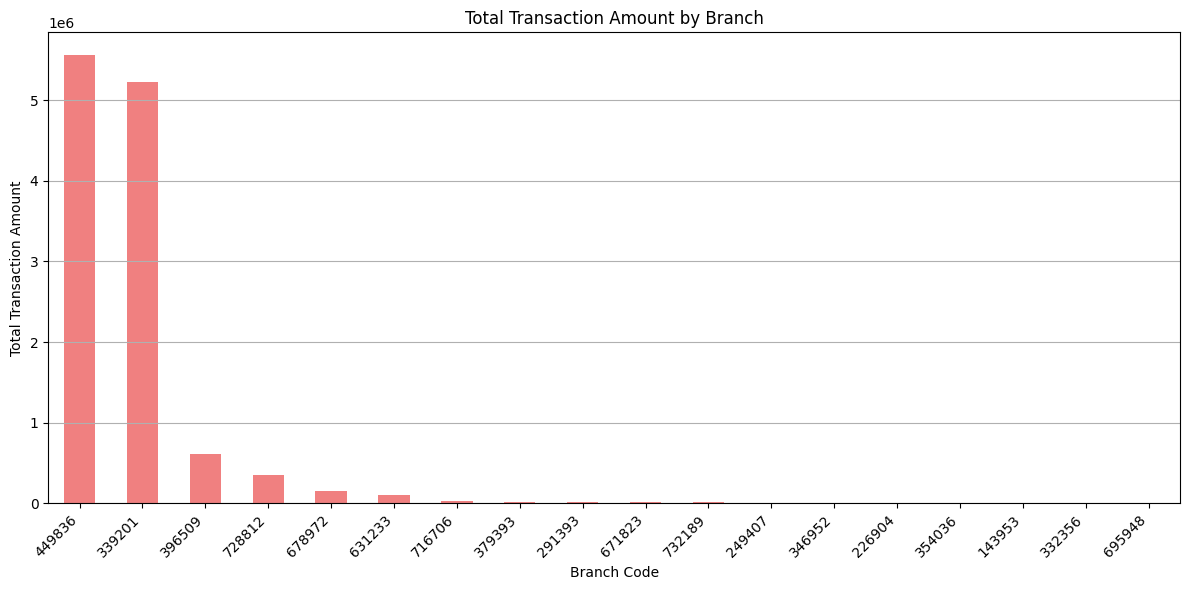

In [ ]:
# Group by branch code and sum the transaction amount
branch_total_amount = df_final_no_duplicates.groupby('brn_cd')['amt'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
branch_total_amount.plot(kind='bar', color='lightcoral')
plt.title('Total Transaction Amount by Branch')
plt.xlabel('Branch Code')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

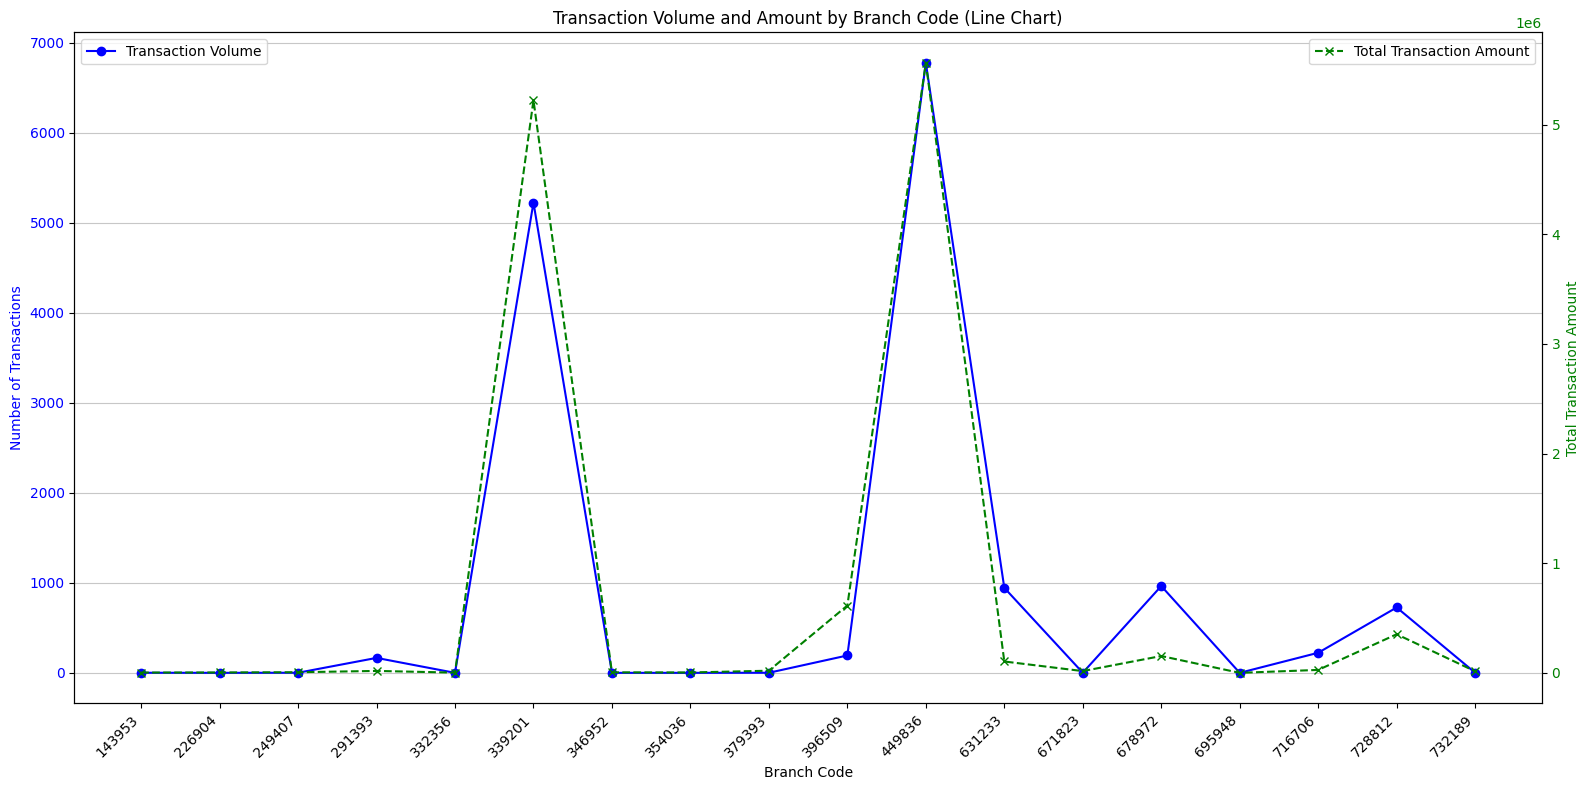

In [ ]:
# Calculate transaction volume by branch
branch_volume = df_final_no_duplicates['brn_cd'].value_counts().sort_index()

# Calculate total transaction amount by branch
branch_amount = df_final_no_duplicates.groupby('brn_cd')['amt'].sum().sort_index()

# Create the plot
plt.figure(figsize=(16, 8))

# Line plot for transaction volume
ax1 = plt.subplot(111)
color = 'blue'
ax1.plot(branch_volume.index.astype(str), branch_volume.values, color=color, label='Transaction Volume', marker='o')
ax1.set_xlabel('Branch Code')
ax1.set_ylabel('Number of Transactions', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.7)
ax1.legend(loc='upper left')

# Create a secondary y-axis for transaction amount
ax2 = ax1.twinx()
color = 'green'
ax2.plot(branch_amount.index.astype(str), branch_amount.values, color=color, label='Total Transaction Amount', linestyle='--', marker='x')
ax2.set_ylabel('Total Transaction Amount', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Set title
plt.title('Transaction Volume and Amount by Branch Code (Line Chart)')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate transaction frequency per branch
branch_transaction_frequency = df_final_no_duplicates['brn_cd'].value_counts().sort_values(ascending=False)
most_frequent_branch = branch_transaction_frequency.index[0]
most_frequent_transaction_count_branch = branch_transaction_frequency.iloc[0]

# Calculate total transfer amount per branch
branch_total_amount = df_final_no_duplicates.groupby('brn_cd')['amt'].sum().sort_values(ascending=False)
highest_transfer_branch = branch_total_amount.index[0]
highest_transfer_amount_branch = branch_total_amount.iloc[0]

# Compare the branch with the most frequent transactions to the one with the highest transfer amount
if most_frequent_branch == highest_transfer_branch:
    print(f"The branch with the most frequent transactions (Branch Code: {most_frequent_branch} with {most_frequent_transaction_count_branch} transactions) is also the branch with the highest total transfer amount (RM {highest_transfer_amount_branch:,.2f}).")
else:
    print(f"The branch with the most frequent transactions (Branch Code: {most_frequent_branch} with {most_frequent_transaction_count_branch} transactions) is NOT the same as the branch with the highest total transfer amount (Branch Code: {highest_transfer_branch} with RM {highest_transfer_amount_branch:,.2f}).")

    # Optionally, print their respective total amounts for comparison
    frequent_branch_total_amount = branch_total_amount.get(most_frequent_branch, 0)
    print(f"Total transfer amount for the most frequent branch (Code: {most_frequent_branch}): RM {frequent_branch_total_amount:,.2f}")
    print(f"Total transfer amount for the highest transfer branch (Code: {highest_transfer_branch}): RM {highest_transfer_amount_branch:,.2f}")

The branch with the most frequent transactions (Branch Code: 449836 with 6775 transactions) is also the branch with the highest total transfer amount (RM 5,562,523.33).


## Customers
The fact that the distinct count of customer numbers (94) is the same as the distinct count of account numbers (94) suggests a one-to-one relationship between customers and account numbers in this dataset. Each customer appears to have exactly one account involved in the transactions recorded here. We also identify that the customer with the most frequent transactions (Customer ID: 4732103968.0 with 598 transactions) is NOT the same as the customer with the highest total transfer amount (Customer ID: 2631583662.0 with RM 773,441.06).

In [ ]:
# Get distinct counts for specified columns
distinct_counts = {
    'Customers': df_final_no_duplicates['cus_no'].nunique(),
    'Accounts': df_final_no_duplicates['acc_no'].nunique()
}

print("--- Distinct Counts ---")
for category, count in distinct_counts.items():
    print(f"Number of distinct {category}: {count}")


--- Distinct Counts ---
Number of distinct Customers: 94
Number of distinct Accounts: 94


We uncover the demographic profile of our distinct customers; age, gender and branch. All customers related with multiple branches.

In [ ]:
# Get the list of unique customer IDs
unique_customer_ids = df_final_no_duplicates['cus_no'].unique()

# Function to get demographic information for a single customer ID
def get_unique_customer_demographics(df, customer_id):
    customer_data = df[df['cus_no'] == customer_id].iloc[0]
    return {
        'Customer ID': int(customer_id),
        'Age': int(customer_data['age']) if pd.notna(customer_data['age']) else None,
        'Branch Code': int(customer_data['brn_cd']) if pd.notna(customer_data['brn_cd']) else None,
        'Gender': customer_data['gndr']
    }

# Get the demographic information for all unique customers
distinct_customer_demographics = []
for cus_id in unique_customer_ids:
    demographics = get_unique_customer_demographics(df_final_no_duplicates, cus_id)
    distinct_customer_demographics.append(demographics)

# Convert the list of dictionaries to a DataFrame
df_distinct_customer_demographics = pd.DataFrame(distinct_customer_demographics)

# Display the demographics of the distinct customers
print("\n--- Demographics of Distinct Customers ---")
print(df_distinct_customer_demographics)

# --- Analyze the demographics of distinct customers ---

# Age Distribution
print("\n--- Age Distribution of Distinct Customers ---")
print(df_distinct_customer_demographics['Age'].describe())

# Gender Distribution
print("\n--- Gender Distribution of Distinct Customers ---")
print(df_distinct_customer_demographics['Gender'].value_counts(normalize=True))

# Branch Distribution
print("\n--- Branch Distribution of Distinct Customers ---")
print(df_distinct_customer_demographics['Branch Code'].value_counts())


--- Demographics of Distinct Customers ---
    Customer ID  Age  Branch Code  Gender
0    6911974770   51       449836  FEMALE
1    9919501476   53       339201    MALE
2    9926739320   53       449836  FEMALE
3    4349273411   56       339201    MALE
4    5591584008   48       449836    MALE
..          ...  ...          ...     ...
89   7400292419   65       449836  FEMALE
90   2100902105   47       449836    MALE
91   9795744721   67       449836    MALE
92   7080106838   45       449836    MALE
93   8920567789   57       449836    MALE

[94 rows x 4 columns]

--- Age Distribution of Distinct Customers ---
count    94.000000
mean     52.723404
std       8.404305
min      25.000000
25%      48.000000
50%      53.000000
75%      58.000000
max      73.000000
Name: Age, dtype: float64

--- Gender Distribution of Distinct Customers ---
Gender
MALE      0.648936
FEMALE    0.351064
Name: proportion, dtype: float64

--- Branch Distribution of Distinct Customers ---
Branch Code
449836    4

In [ ]:
# Display new frequency and percentage for gender for distinct customers
print("\n--- Gender Distribution of Distinct Customers ---")
gender_counts_distinct = df_distinct_customer_demographics['Gender'].value_counts()
gender_percentages_distinct = df_distinct_customer_demographics['Gender'].value_counts(normalize=True) * 100
gender_display_distinct = pd.DataFrame({
    'Frequency': gender_counts_distinct,
    'Percentage': gender_percentages_distinct.map('{:.2f}%'.format)
})
print(gender_display_distinct)


--- Gender Distribution of Distinct Customers ---
        Frequency Percentage
Gender                      
MALE           61     64.89%
FEMALE         33     35.11%


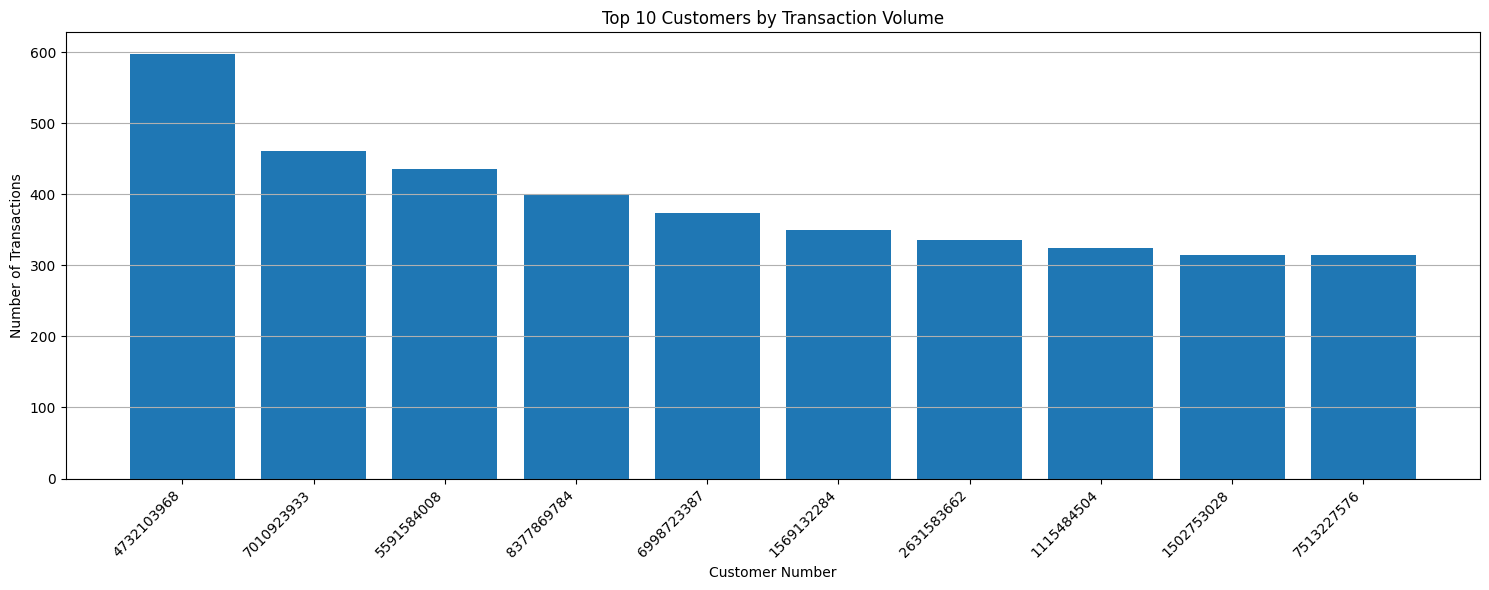

In [ ]:
# Group by customer number and count transactions
customer_transaction_counts = df_final_no_duplicates['cus_no'].value_counts().sort_values(ascending=False)

# Visualize customer transaction counts
plt.figure(figsize=(15, 6))
top_n =10  # Number of top customers to display
top_customers = customer_transaction_counts.head(top_n)
plt.bar(top_customers.index.astype(int).astype(str), top_customers.values)  # Convert index to integer then to string
plt.title(f'Top {top_n} Customers by Transaction Volume')
plt.xlabel('Customer Number')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.grid(axis='y')
plt.tight_layout()
plt.show()

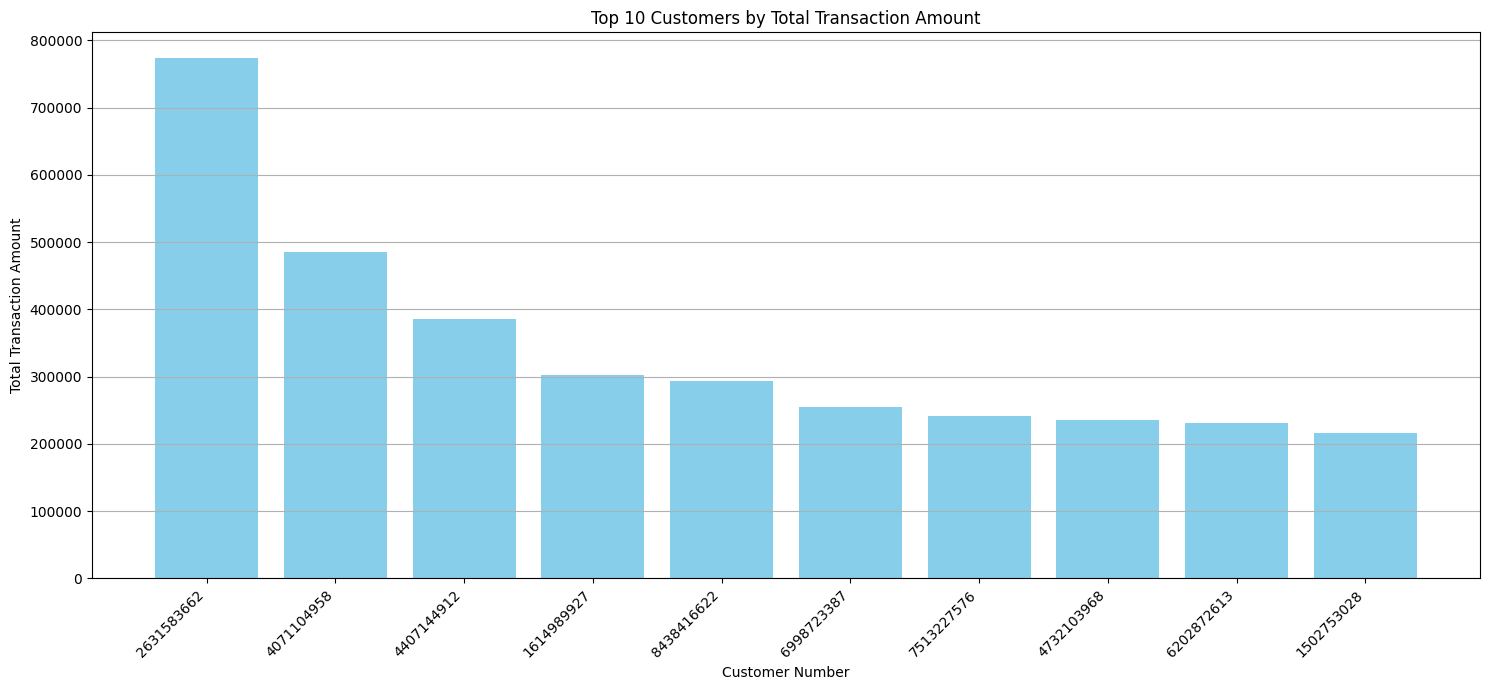

In [ ]:
# --- Visualize Top 10 Customers by Total Transaction Amount ---
# Group by customer number and sum the transaction amount
customer_total_amount = df_final_no_duplicates.groupby('cus_no')['amt'].sum().sort_values(ascending=False)

top_n_customers = 10  # Number of top customers to display
plt.figure(figsize=(15, 7))
top_customers_amount = customer_total_amount.head(top_n_customers)
plt.bar(top_customers_amount.index.astype(int).astype(str), top_customers_amount.values, color='skyblue')
plt.title(f'Top {top_n_customers} Customers by Total Transaction Amount')
plt.xlabel('Customer Number')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate transaction frequency per customer
customer_transaction_frequency = df_final_no_duplicates['cus_no'].value_counts().sort_values(ascending=False)
most_frequent_customer = customer_transaction_frequency.index[0]
most_frequent_transaction_count = customer_transaction_frequency.iloc[0]

# Calculate total transfer amount per customer
customer_total_amount = df_final_no_duplicates.groupby('cus_no')['amt'].sum().sort_values(ascending=False)
highest_transfer_customer = customer_total_amount.index[0]
highest_transfer_amount = customer_total_amount.iloc[0]

# Compare the customer with the most frequent transactions to the one with the highest transfer amount
if most_frequent_customer == highest_transfer_customer:
    print(f"The customer with the most frequent transactions (Customer ID: {most_frequent_customer} with {most_frequent_transaction_count} transactions) is also the customer with the highest total transfer amount (RM {highest_transfer_amount:,.2f}).")
else:
    print(f"The customer with the most frequent transactions (Customer ID: {most_frequent_customer} with {most_frequent_transaction_count} transactions) is NOT the same as the customer with the highest total transfer amount (Customer ID: {highest_transfer_customer} with RM {highest_transfer_amount:,.2f}).")

    # Optionally, print their respective total amounts for comparison
    frequent_customer_total_amount = customer_total_amount.get(most_frequent_customer, 0)
    print(f"Total transfer amount for the most frequent customer (ID: {most_frequent_customer}): RM {frequent_customer_total_amount:,.2f}")
    print(f"Total transfer amount for the highest transfer customer (ID: {highest_transfer_customer}): RM{highest_transfer_amount:,.2f}")

The customer with the most frequent transactions (Customer ID: 4732103968.0 with 598 transactions) is NOT the same as the customer with the highest total transfer amount (Customer ID: 2631583662.0 with RM 773,441.06).
Total transfer amount for the most frequent customer (ID: 4732103968.0): RM 235,475.95
Total transfer amount for the highest transfer customer (ID: 2631583662.0): RM773,441.06


Demographics of Top 20 Customer by Transaction Volume and Amount

In [ ]:
def get_demographics_for_customers(df, customer_ids, title):
    """
    Retrieves and displays demographic information for a list of customer IDs.
    """
    demographics = []
    for cus_id in customer_ids:
        customer_data = df[df['cus_no'] == cus_id].iloc[0]

        most_frequent_trn_type = df[df['cus_no'] == cus_id]['trn_type'].mode().iloc[0] if not df[df['cus_no'] == cus_id]['trn_type'].mode().empty else None
        most_frequent_chn = df[df['cus_no'] == cus_id]['chn'].mode().iloc[0] if not df[df['cus_no'] == cus_id]['chn'].mode().empty else None

        demographics.append({
            'Customer ID': int(cus_id),
            'Age': int(customer_data['age']) if pd.notna(customer_data['age']) else None,
            'Branch Code': int(customer_data['brn_cd']) if pd.notna(customer_data['brn_cd']) else None,
            'Gender': customer_data['gndr'],
            'Most Frequent Transaction Type': most_frequent_trn_type,
            'Most Frequent Transaction Channel': most_frequent_chn
        })
    df_demographics = pd.DataFrame(demographics)
    print(f"\n--- Demographics of Top {len(customer_ids)} Customers by {title} ---")
    print(df_demographics)
    return df_demographics

# --- Identify Top 20 Customers by Transaction Frequency ---
top_20_freq_customers = df_final_no_duplicates['cus_no'].value_counts().nlargest(20).index.tolist()
demographics_freq = get_demographics_for_customers(df_final_no_duplicates, top_20_freq_customers, "Transaction Volume")

# --- Identify Top 20 Customers by Total Transaction Amount ---
customer_total_amount = df_final_no_duplicates.groupby('cus_no')['amt'].sum().sort_values(ascending=False)
top_20_amount_customers = customer_total_amount.nlargest(20).index.tolist()
demographics_amount = get_demographics_for_customers(df_final_no_duplicates, top_20_amount_customers, "Total Transaction Amount")


--- Demographics of Top 20 Customers by Transaction Volume ---
    Customer ID  Age  Branch Code  Gender Most Frequent Transaction Type  \
0    4732103968   46       449836  FEMALE                          DEBIT   
1    7010923933   48       449836  FEMALE                          DEBIT   
2    5591584008   48       449836    MALE                         CREDIT   
3    8377869784   53       339201    MALE                          DEBIT   
4    6998723387   50       339201  FEMALE                          DEBIT   
5    1569132284   36       449836    MALE                          DEBIT   
6    2631583662   63       339201    MALE                          DEBIT   
7    1115484504   39       449836    MALE                          DEBIT   
8    1502753028   54       449836    MALE                          DEBIT   
9    7513227576   36       339201    MALE                          DEBIT   
10   7832073932   39       339201    MALE                          DEBIT   
11   3481072690   46    

## Distribution of Transaction Types & Description, Gender and Channel

- Transaction Type Imbalance: 'DEBIT' transactions significantly outnumber 'CREDIT' transactions, which could impact analyses sensitive to class distribution.

- Gender Imbalance: There's a higher proportion of male customers, suggesting an uneven representation in the dataset.

- Channel Dominance: The 'IB' (Internet Banking) channel overwhelmingly dominates, indicating that most transactions happen online, with other channels contributing minimally.


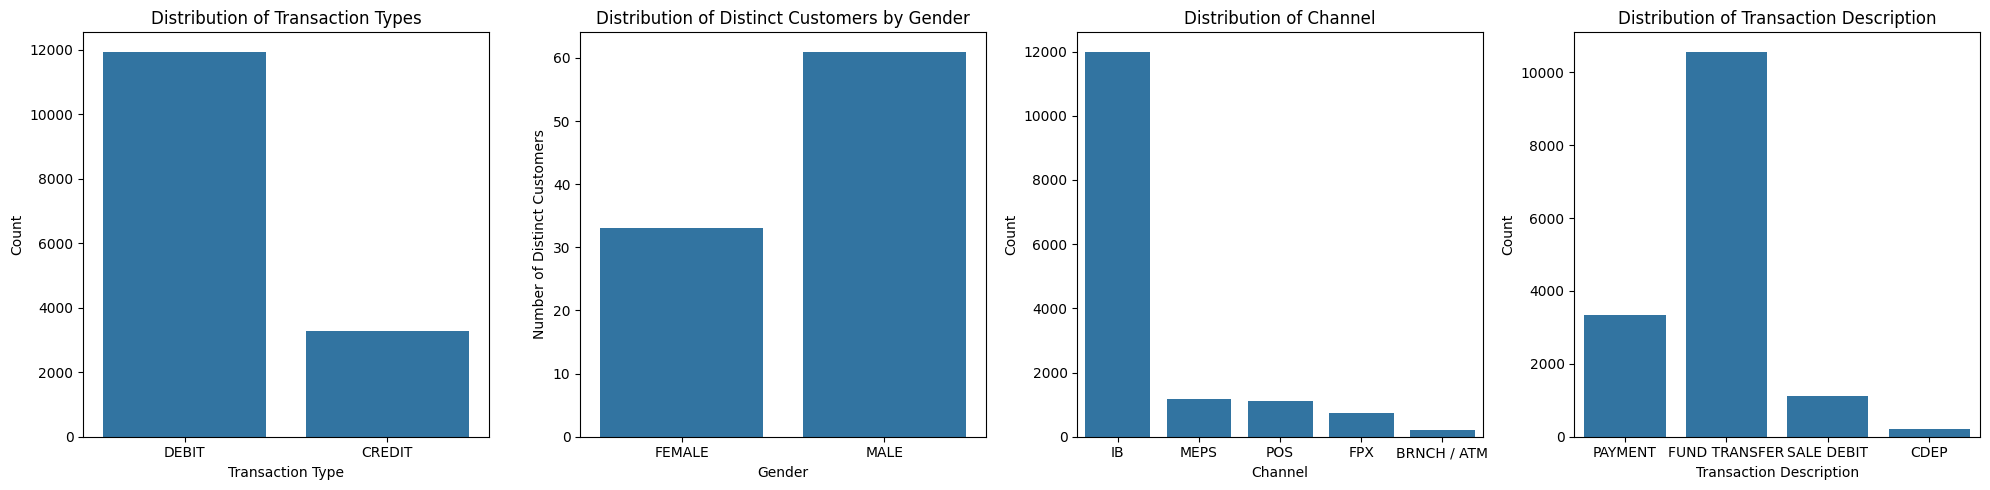

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
sns.countplot(data=df_final_no_duplicates, x='trn_type')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

distinct_customers_gender = df_final_no_duplicates[['cus_no', 'gndr']].drop_duplicates(subset=['cus_no'])
plt.subplot(1, 4, 2)
sns.countplot(data=distinct_customers_gender, x='gndr')
plt.title('Distribution of Distinct Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Distinct Customers')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.countplot(data=df_final_no_duplicates, x='chn')
plt.title('Distribution of Channel')
plt.xlabel('Channel')
plt.ylabel('Count')

plt.subplot(1, 4, 4)
sns.countplot(data=df_final_no_duplicates, x='trn_desc')
plt.title('Distribution of Transaction Description')
plt.xlabel('Transaction Description')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Distribution of Age and Transaction Amount
- The age distribution shows a bimodal pattern, with peaks in the late 40s–50s and early–mid 60s, suggesting two major customer age groups. The spread ranges from mid-20s to early 70s, showing diversity. There's a slight skew toward older ages, but nothing extreme. No outliers or obvious anomalies were found—data looks clean and consistent.

- The transaction amount distribution is heavily right-skewed, with most transactions involving small amounts and a few large ones stretching the upper end. There's a wide spread, ranging up to 10,000, and the long tail suggests potential outliers. These high-value transactions could be valid but might skew averages, so they’re worth a closer look if your analysis is sensitive to extremes.


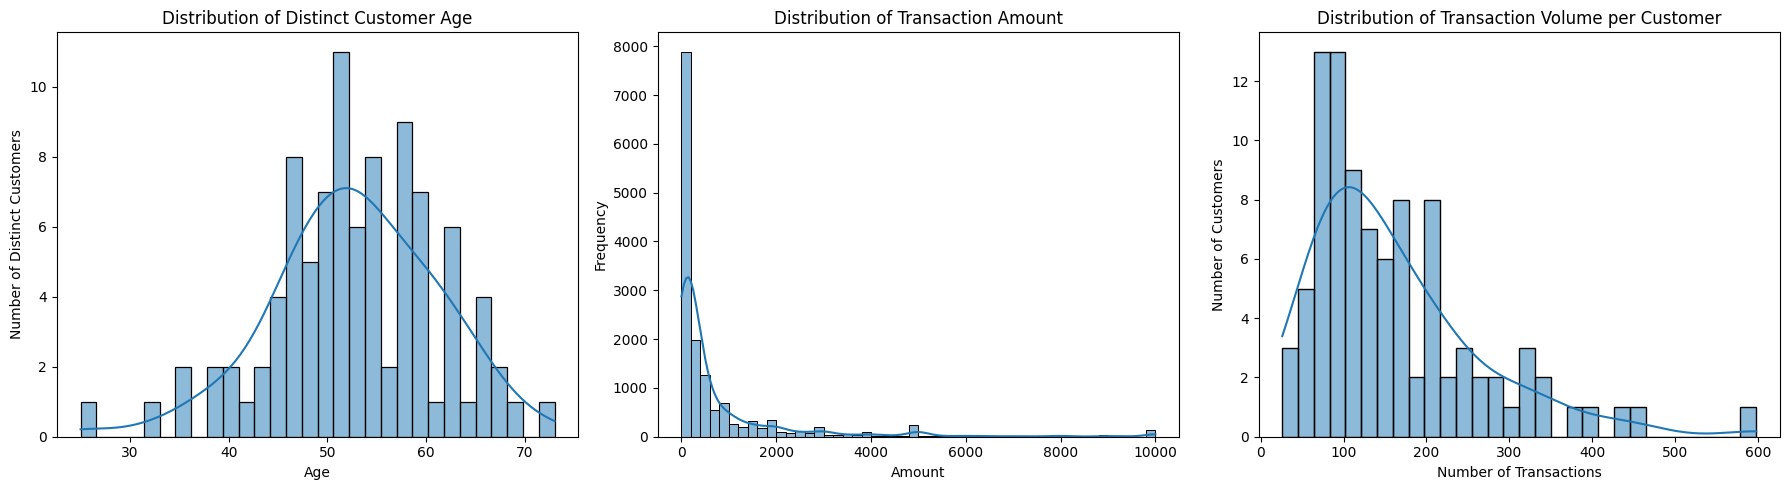

In [ ]:
plt.figure(figsize=(18, 5))

# Subplot 1: Distribution of Distinct Customer Age
distinct_customers_age = df_final_no_duplicates[['cus_no', 'age']].drop_duplicates(subset=['cus_no'])
plt.subplot(1, 3, 1)
sns.histplot(distinct_customers_age['age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Distinct Customer Age')
plt.xlabel('Age')
plt.ylabel('Number of Distinct Customers')
plt.tight_layout()

# Subplot 2: Distribution of Transaction Amount
plt.subplot(1, 3, 2)
sns.histplot(df_final_no_duplicates['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.tight_layout()

# Subplot 3: Distribution of Transaction Volume
transactions_per_customer = df_final_no_duplicates.groupby('cus_no')['trn_no'].count()
plt.subplot(1, 3, 3)
sns.histplot(transactions_per_customer, bins=30, kde=True)
plt.title('Distribution of Transaction Volume per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.tight_layout()

plt.show()

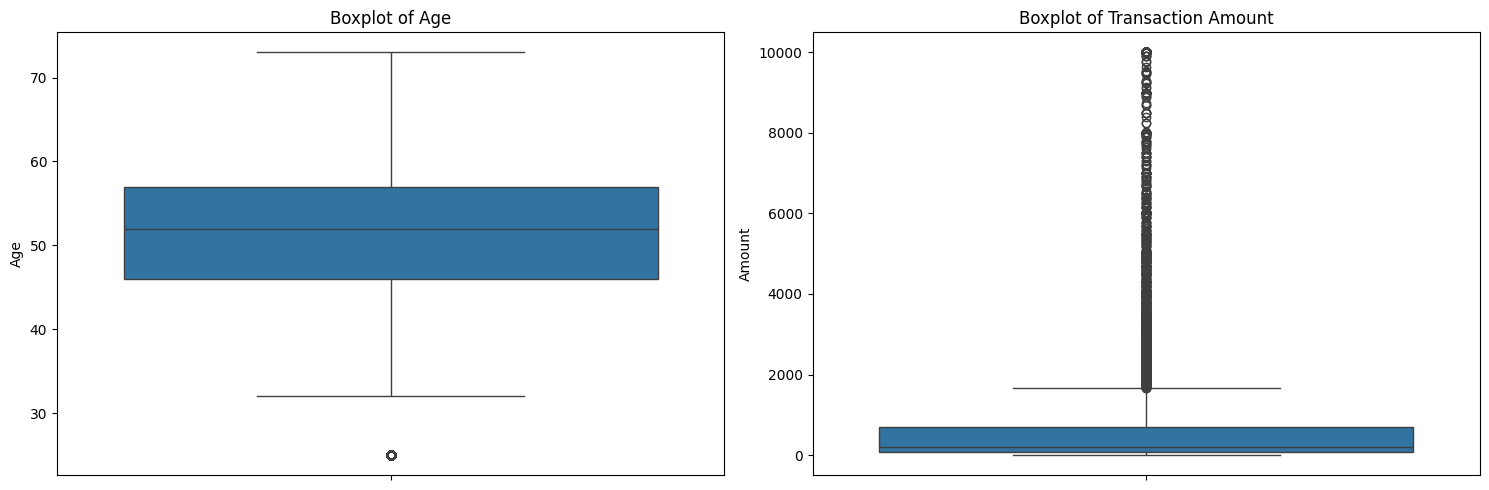

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_final_no_duplicates['age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_final_no_duplicates['amt'])
plt.title('Boxplot of Transaction Amount')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

## Gender

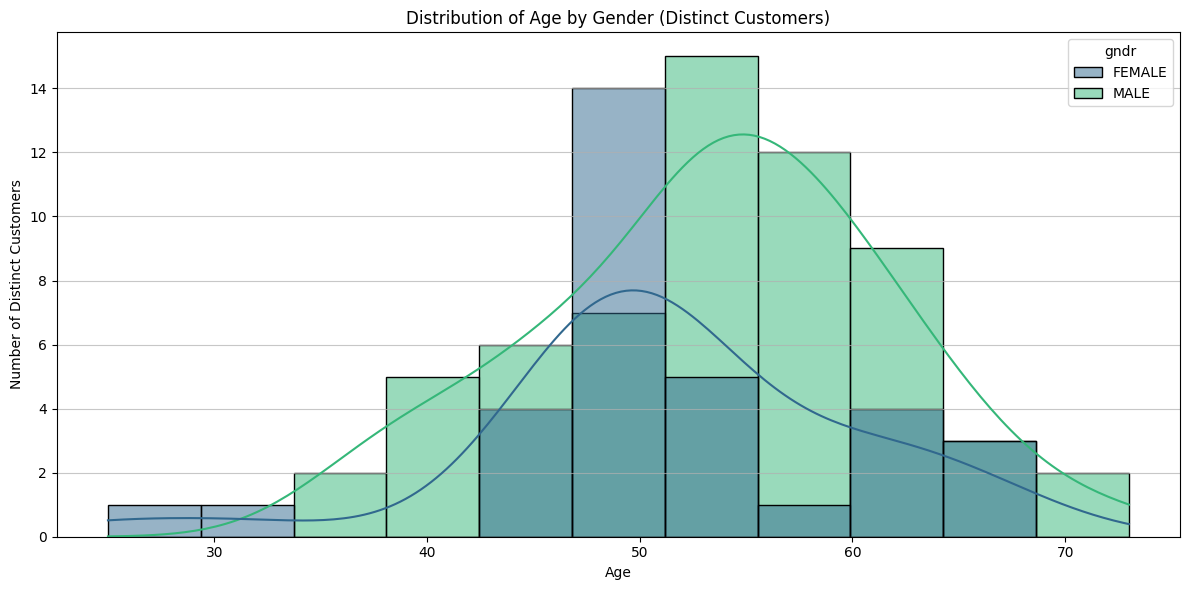

In [ ]:
distinct_customers_demo = df_final_no_duplicates[['cus_no', 'age', 'gndr']].drop_duplicates(subset=['cus_no'])
plt.figure(figsize=(12, 6))
sns.histplot(data=distinct_customers_demo, x='age', hue='gndr', kde=True, palette='viridis', legend=True)
plt.title('Distribution of Age by Gender (Distinct Customers)')
plt.xlabel('Age')
plt.ylabel('Number of Distinct Customers')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

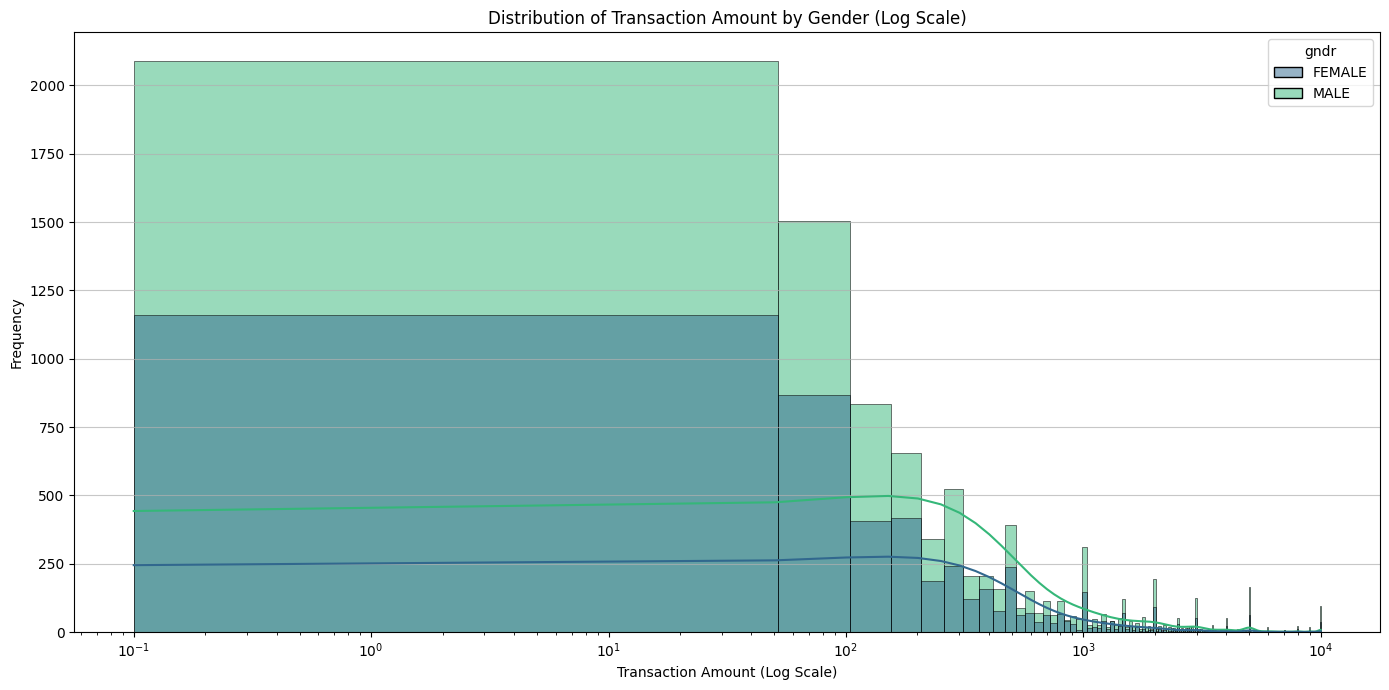

In [ ]:
plt.figure(figsize=(14, 7))
sns.histplot(data=df_final_no_duplicates, x='amt', hue='gndr', kde=True, palette='viridis', legend=True)
plt.title('Distribution of Transaction Amount by Gender (Log Scale)')
plt.xlabel('Transaction Amount (Log Scale)')
plt.ylabel('Frequency')
plt.yscale('linear')
plt.xscale('log')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

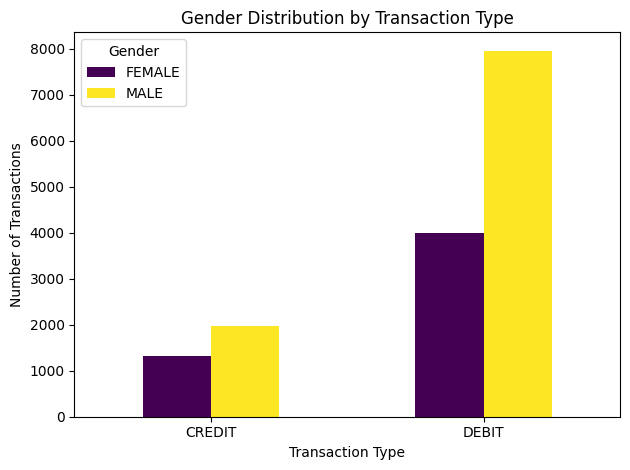

In [ ]:
gender_by_type = df_final_no_duplicates.groupby(['trn_type', 'gndr']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
gender_by_type.plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Gender Distribution by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

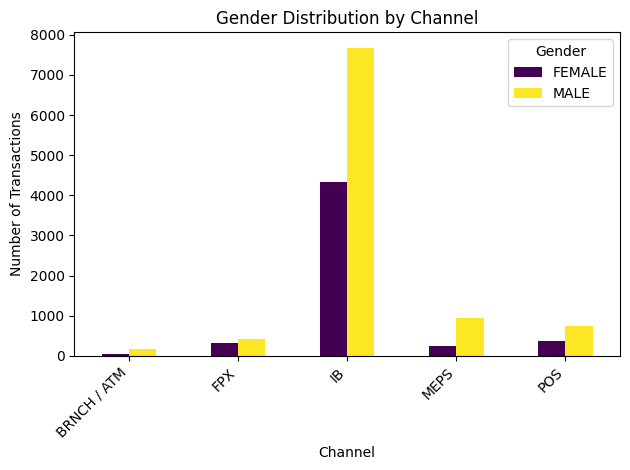

In [ ]:
gender_by_channel = df_final_no_duplicates.groupby(['chn', 'gndr']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
gender_by_channel.plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Gender Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

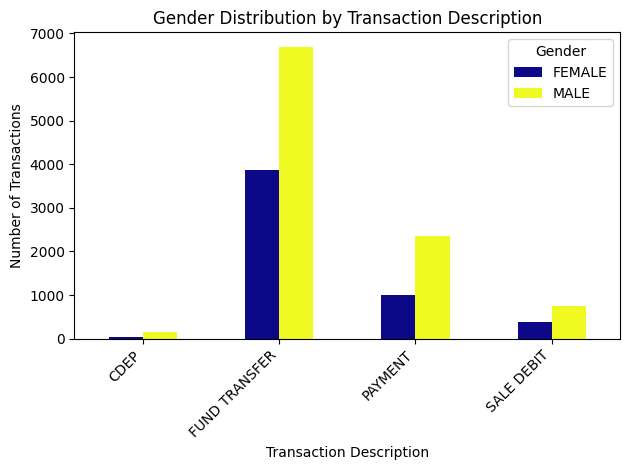

In [ ]:
unique_descriptions = df_final_no_duplicates['trn_desc'].unique()
gender_by_desc = df_final_no_duplicates.groupby(['trn_desc', 'gndr']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
gender_by_desc.plot(kind='bar', stacked=False, colormap='plasma')
plt.title('Gender Distribution by Transaction Description')
plt.xlabel('Transaction Description')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# 4. Data Transformation


### Time-based Data

In [ ]:
# Convert 'trn_dt' to datetime objects
df_final_no_duplicates.loc[:, 'trn_dt'] = pd.to_datetime(df_final_no_duplicates['trn_dt']).dt.date

# Extract hour from 'trn_time'
df_final_no_duplicates.loc[:, 'trn_hour'] = (df_final_no_duplicates['trn_time'] // 10000).astype(int)

# Extract day of the week (localized to Malaysia, if needed)
df_final_no_duplicates.loc[:, 'trn_day_of_week'] = pd.to_datetime(df_final_no_duplicates['trn_dt']).dt.day_name()

# Extract day of the month
df_final_no_duplicates.loc[:, 'trn_day'] = pd.to_datetime(df_final_no_duplicates['trn_dt']).dt.day

# Extract month
df_final_no_duplicates.loc[:, 'trn_month'] = pd.to_datetime(df_final_no_duplicates['trn_dt']).dt.month

# Extract month name
df_final_no_duplicates.loc[:, 'trn_month_name'] = pd.to_datetime(df_final_no_duplicates['trn_dt']).dt.month_name()

# Extract year
df_final_no_duplicates.loc[:, 'trn_year'] = pd.to_datetime(df_final_no_duplicates['trn_dt']).dt.year

# Extract week number (using isocalendar to be consistent)
df_final_no_duplicates.loc[:, 'trn_week'] = pd.to_datetime(df_final_no_duplicates['trn_dt']).dt.isocalendar().week

# Extract weekend/weekday flag
df_final_no_duplicates.loc[:, 'is_weekend'] = pd.to_datetime(df_final_no_duplicates['trn_dt']).dt.dayofweek >= 5

# Extract part of the day (Morning, Afternoon, Evening, Night)
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_final_no_duplicates.loc[:, 'part_of_day'] = df_final_no_duplicates['trn_hour'].apply(get_part_of_day)

print("First few rows with added time-based features:")
print(df_final_no_duplicates[['trn_dt', 'trn_time', 'trn_hour', 'trn_day_of_week', 'trn_day', 'trn_month', 'trn_month_name', 'trn_year', 'trn_week', 'is_weekend', 'part_of_day']].head())

First few rows with added time-based features:
      trn_dt  trn_time  trn_hour trn_day_of_week  trn_day  trn_month  \
0 2023-06-10    150515        15        Saturday       10          6   
1 2023-07-11     33714         3         Tuesday       11          7   
2 2023-08-27    155150        15          Sunday       27          8   
3 2023-07-29    215843        21        Saturday       29          7   
4 2023-07-28    125259        12          Friday       28          7   

  trn_month_name  trn_year  trn_week  is_weekend part_of_day  
0           June      2023        23        True   Afternoon  
1           July      2023        28       False       Night  
2         August      2023        34        True   Afternoon  
3           July      2023        30        True       Night  
4           July      2023        30       False   Afternoon  


In [ ]:
min_age = df_final_no_duplicates['age'].min()
max_age = df_final_no_duplicates['age'].max()

print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")

Minimum age: 25.0
Maximum age: 73.0


In [ ]:
import numpy as np

# Define age group bins
bins = np.arange(min_age // 10 * 10, (max_age // 10 + 2) * 10, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]

# Create the 'age_group' column
df_final_no_duplicates['age_group'] = pd.cut(df_final_no_duplicates['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Display the first few rows with the new 'age_group' column
print("\nFirst few rows with 'age' and 'age_group':")
print(df_final_no_duplicates[['age', 'age_group']].head())

# Display the distribution of age groups
print("\nDistribution of age groups:")
print(df_final_no_duplicates['age_group'].value_counts().sort_index())


First few rows with 'age' and 'age_group':
    age  age_group
0  51.0  50.0-59.0
1  53.0  50.0-59.0
2  53.0  50.0-59.0
3  56.0  50.0-59.0
4  48.0  40.0-49.0

Distribution of age groups:
age_group
20.0-29.0     162
30.0-39.0    1507
40.0-49.0    5212
50.0-59.0    6187
60.0-69.0    2141
70.0-79.0      26
Name: count, dtype: int64


In [ ]:
print(df_final_no_duplicates.columns)

Index(['trn_no', 'acc_no', 'cus_no', 'brn_cd', 'trn_type', 'trn_dt',
       'trn_time', 'amt', 'trn_desc', 'chn', 'gndr', 'age', 'trn_hour',
       'trn_day_of_week', 'trn_day', 'trn_month', 'trn_month_name', 'trn_year',
       'trn_week', 'is_weekend', 'part_of_day', 'age_group'],
      dtype='object')


In [ ]:
# Calculate total transaction amount and count per customer
customer_summary = df_final_no_duplicates.groupby('cus_no').agg(
    total_transaction_amount=('amt', 'sum'),
    total_transactions=('trn_no', 'count')  # Assuming 'trn_no' is a unique transaction identifier
).reset_index()

# Merge with customer demographic information (gender and age)
# We need to get the gender and age for each distinct customer.
# Assuming the first occurrence of a 'cus_no' holds the demographic info.
customer_demographics = df_final_no_duplicates[['cus_no', 'gndr', 'age']].drop_duplicates(subset=['cus_no'])

customer_profile_df = pd.merge(customer_summary, customer_demographics, on='cus_no', how='left')

print("Customer Profile DataFrame:")
print(customer_profile_df.head())

Customer Profile DataFrame:
         cus_no  total_transaction_amount  total_transactions    gndr   age
0  1.027662e+09                  79491.53                  54  FEMALE  68.0
1  1.115485e+09                 140995.25                 325    MALE  39.0
2  1.247512e+09                 109572.36                 210  FEMALE  62.0
3  1.502753e+09                 215489.54                 315    MALE  54.0
4  1.540948e+09                 118195.13                 204  FEMALE  55.0


# 5. Descriptive Analysis Part II


## Customers Demographics

<ipython-input-876-1352c374422e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_profile_df, x='gndr', palette='pastel')


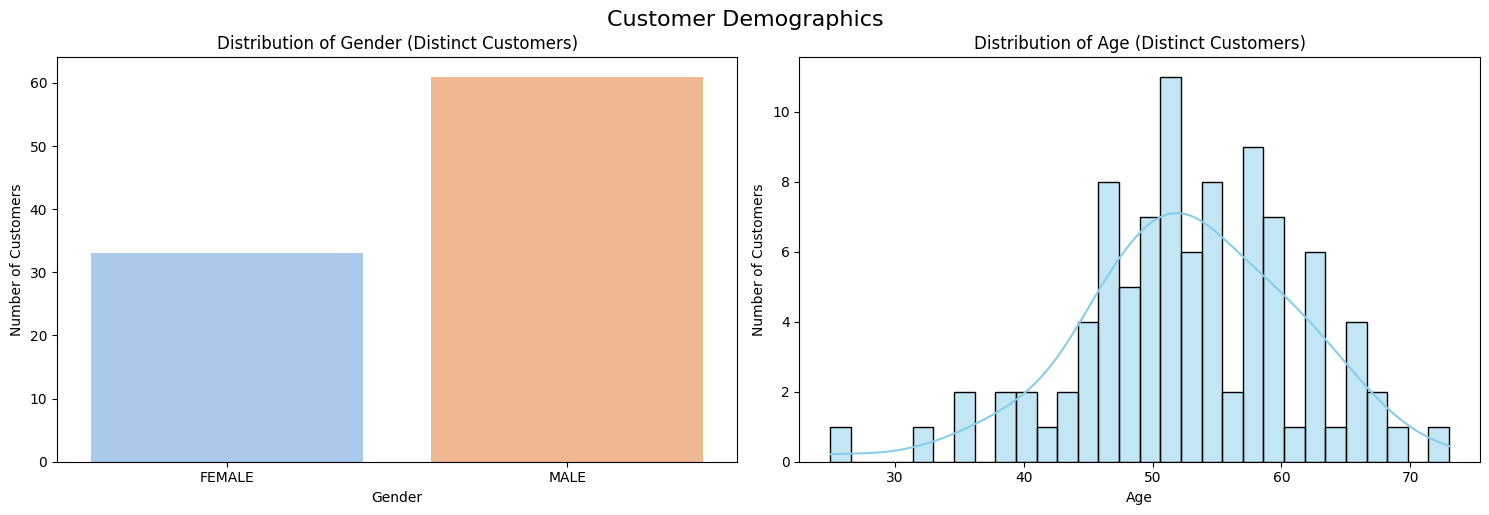

<ipython-input-876-1352c374422e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_profile_df.dropna(subset=['gndr', 'age']), x='gndr', y='age', palette='viridis')


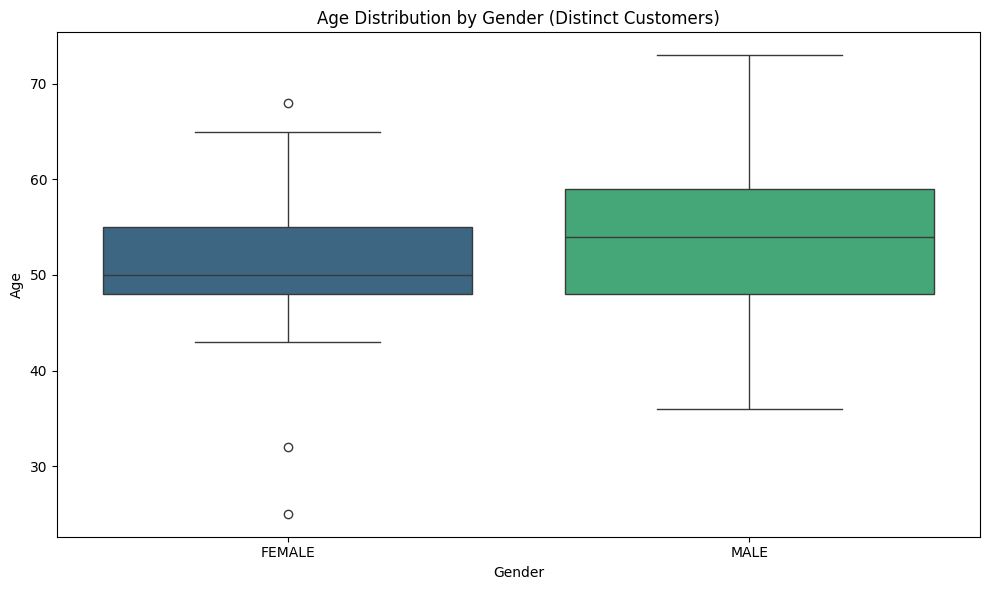

<ipython-input-876-1352c374422e>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=customer_profile_df.dropna(subset=['gndr', 'age']), x='gndr', y='age', palette='viridis')


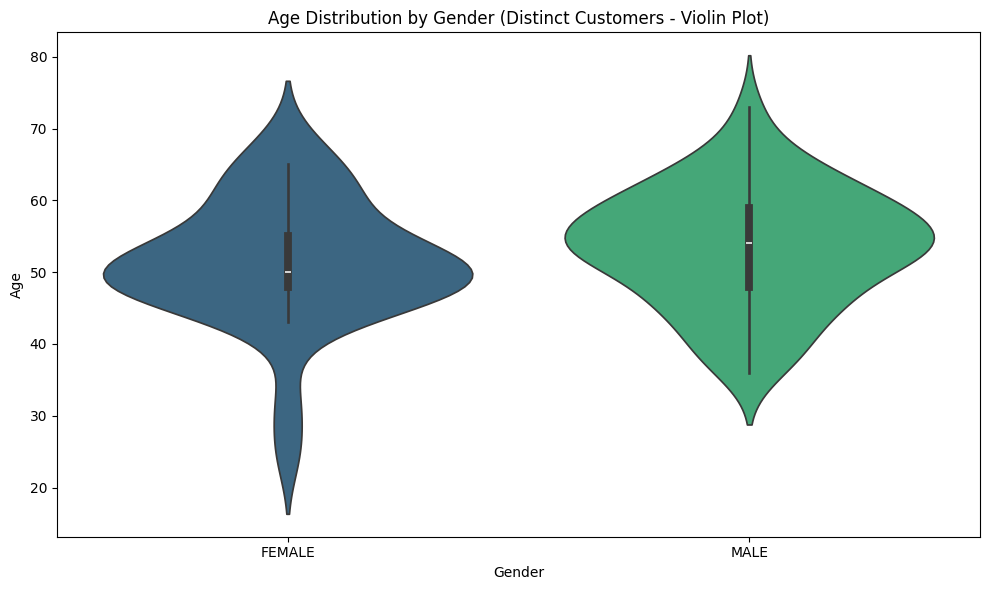

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=customer_profile_df, x='gndr', palette='pastel')
plt.title('Distribution of Gender (Distinct Customers)')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')

plt.subplot(1, 2, 2)
sns.histplot(customer_profile_df['age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age (Distinct Customers)')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.suptitle('Customer Demographics', y=1.02, fontsize=16)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_profile_df.dropna(subset=['gndr', 'age']), x='gndr', y='age', palette='viridis')
plt.title('Age Distribution by Gender (Distinct Customers)')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=customer_profile_df.dropna(subset=['gndr', 'age']), x='gndr', y='age', palette='viridis')
plt.title('Age Distribution by Gender (Distinct Customers - Violin Plot)')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

###Transaction Amount vs. Age

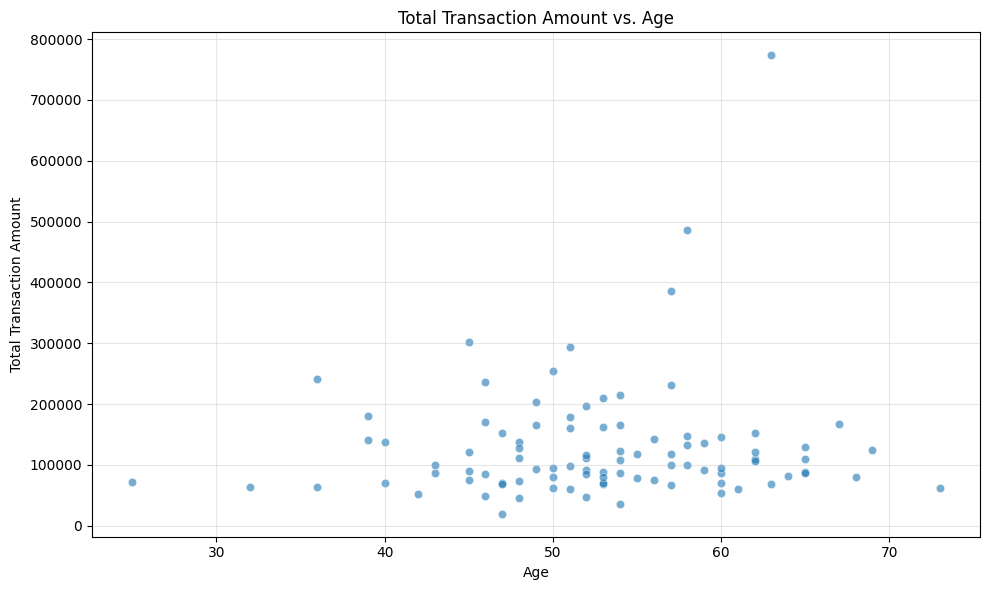

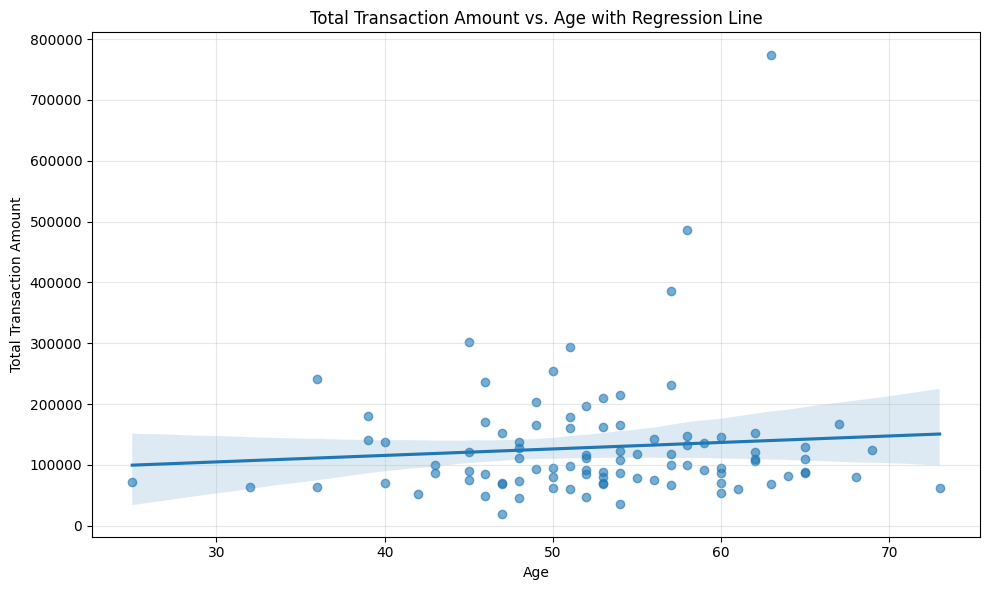

In [ ]:
# Scatter plot of Age vs. Total Transaction Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_profile_df, x='age', y='total_transaction_amount', alpha=0.6)
plt.title('Total Transaction Amount vs. Age')
plt.xlabel('Age')
plt.ylabel('Total Transaction Amount')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=customer_profile_df, x='age', y='total_transaction_amount', scatter_kws={'alpha':0.6})
plt.title('Total Transaction Amount vs. Age with Regression Line')
plt.xlabel('Age')
plt.ylabel('Total Transaction Amount')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Transaction Volume vs. Age

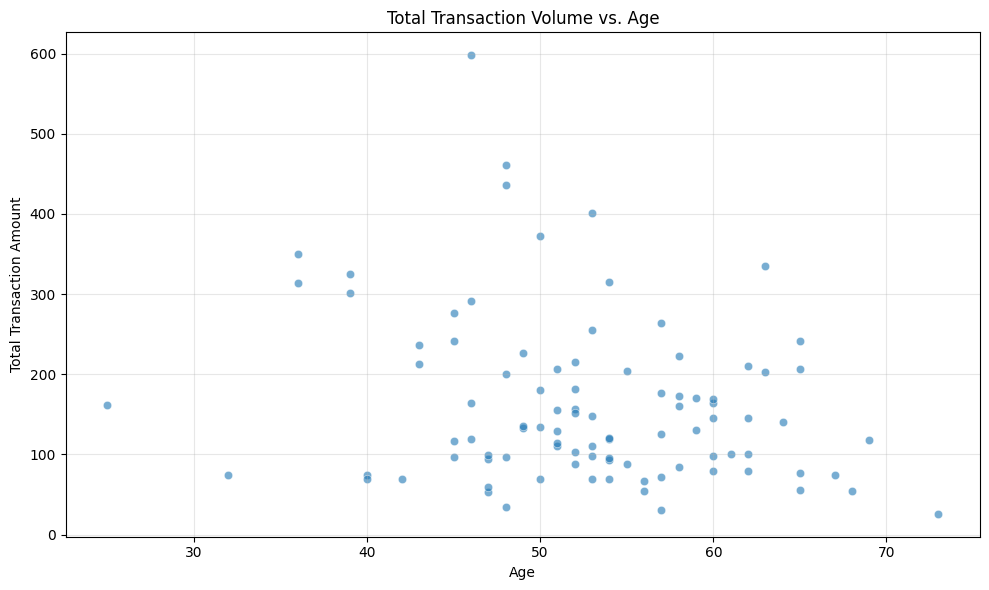

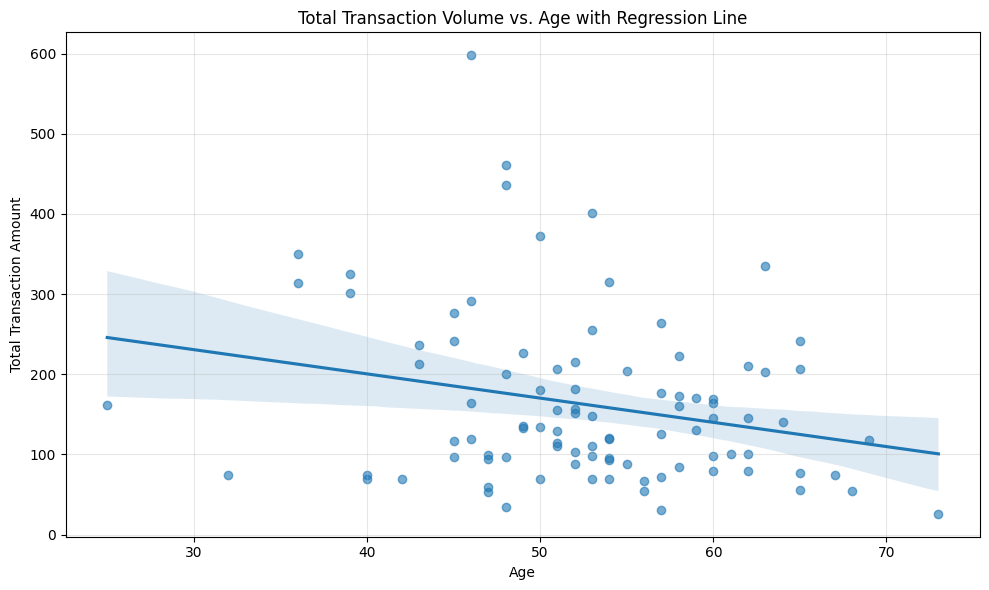

In [ ]:
# Scatter plot of Age vs. Total Transaction Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_profile_df, x='age', y='total_transactions', alpha=0.6)
plt.title('Total Transaction Volume vs. Age')
plt.xlabel('Age')
plt.ylabel('Total Transaction Amount')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# If you want to see a trend line, you can use a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(data=customer_profile_df, x='age', y='total_transactions', scatter_kws={'alpha':0.6})
plt.title('Total Transaction Volume vs. Age with Regression Line')
plt.xlabel('Age')
plt.ylabel('Total Transaction Amount')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Transaction Amount vs. Gender

<ipython-input-840-43830db1d91a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_profile_df, x='gndr', y='total_transaction_amount', palette='viridis')


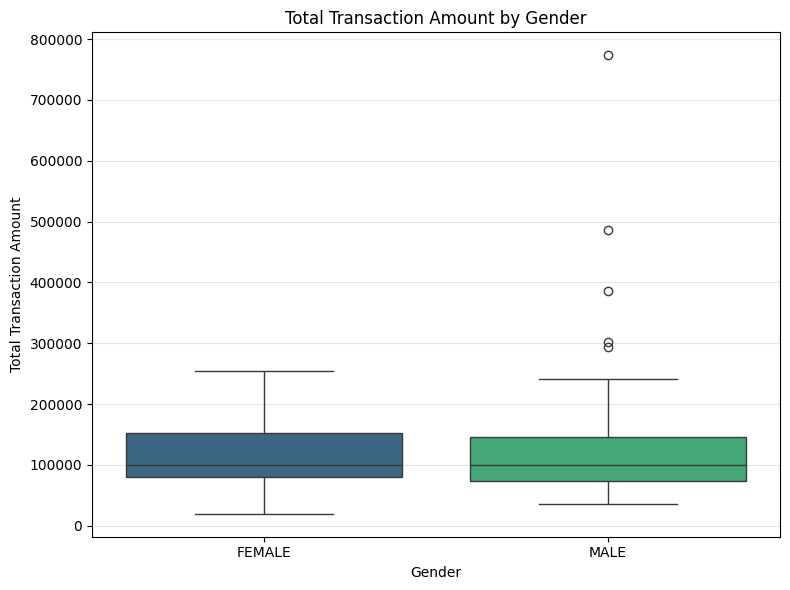

<ipython-input-840-43830db1d91a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=customer_profile_df, x='gndr', y='total_transaction_amount', palette='viridis')


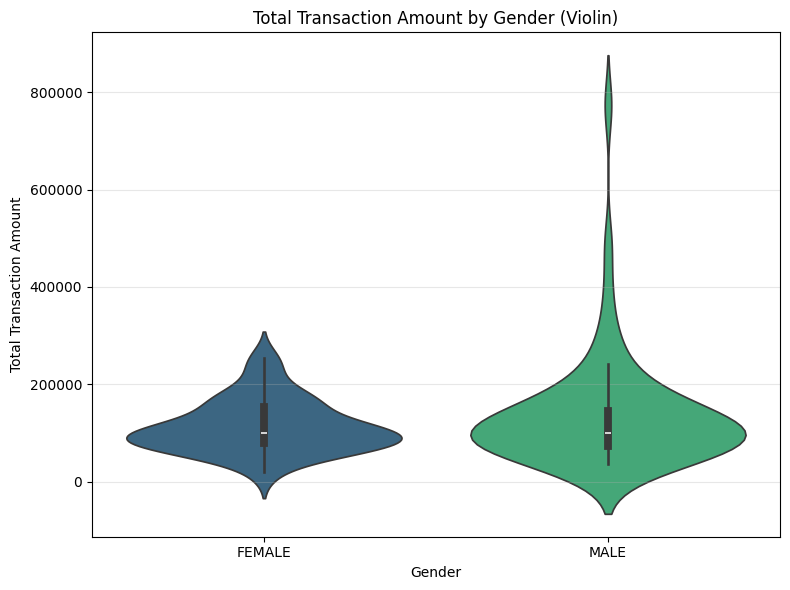

In [ ]:
# Box plot of Gender vs. Total Transaction Amount
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_profile_df, x='gndr', y='total_transaction_amount', palette='viridis')
plt.title('Total Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Transaction Amount')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=customer_profile_df, x='gndr', y='total_transaction_amount', palette='viridis')
plt.title('Total Transaction Amount by Gender (Violin)')
plt.xlabel('Gender')
plt.ylabel('Total Transaction Amount')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Transaction Volume vs. Gender

<ipython-input-841-e85fd076fc5d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_profile_df, x='gndr', y='total_transactions', palette='viridis')


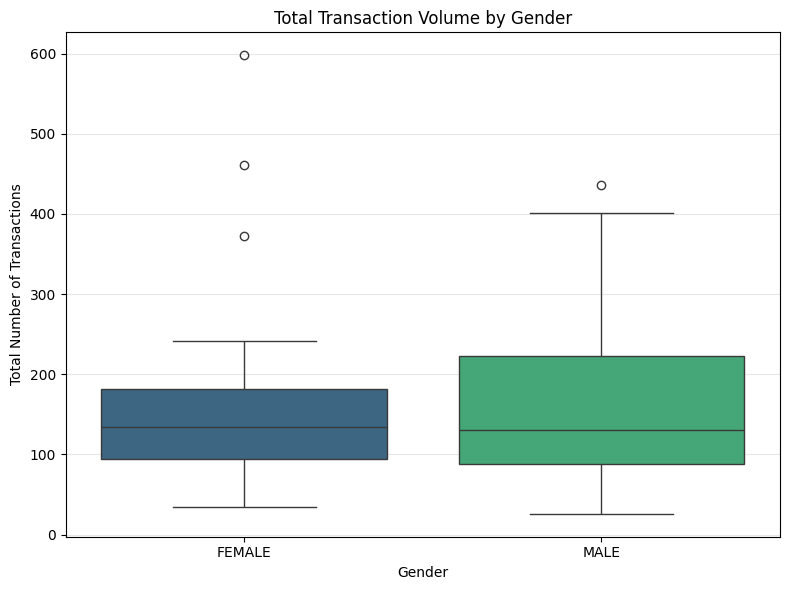

<ipython-input-841-e85fd076fc5d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=customer_profile_df, x='gndr', y='total_transactions', palette='viridis')


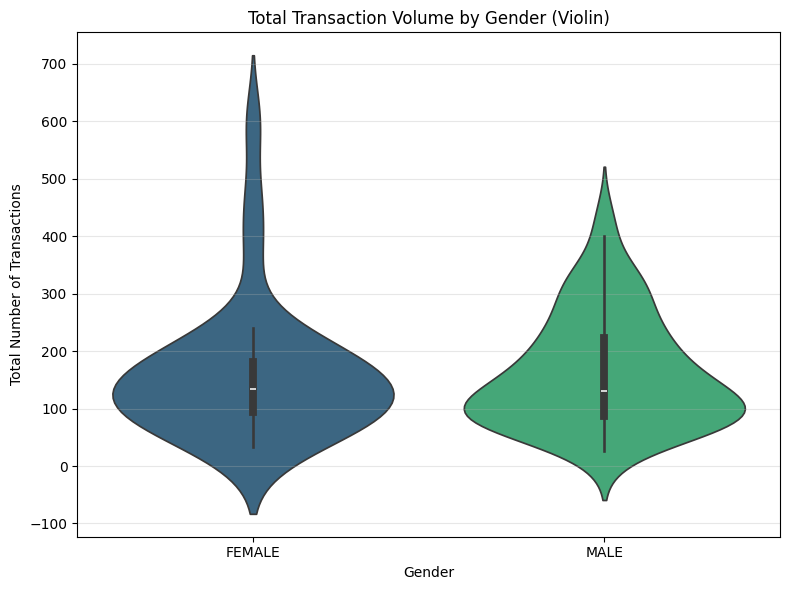

In [ ]:
# Box plot of Gender vs. Total Transactions
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_profile_df, x='gndr', y='total_transactions', palette='viridis')
plt.title('Total Transaction Volume by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Number of Transactions')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=customer_profile_df, x='gndr', y='total_transactions', palette='viridis')
plt.title('Total Transaction Volume by Gender (Violin)')
plt.xlabel('Gender')
plt.ylabel('Total Number of Transactions')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Transaction Amount vs. Age, Segmented by Gender

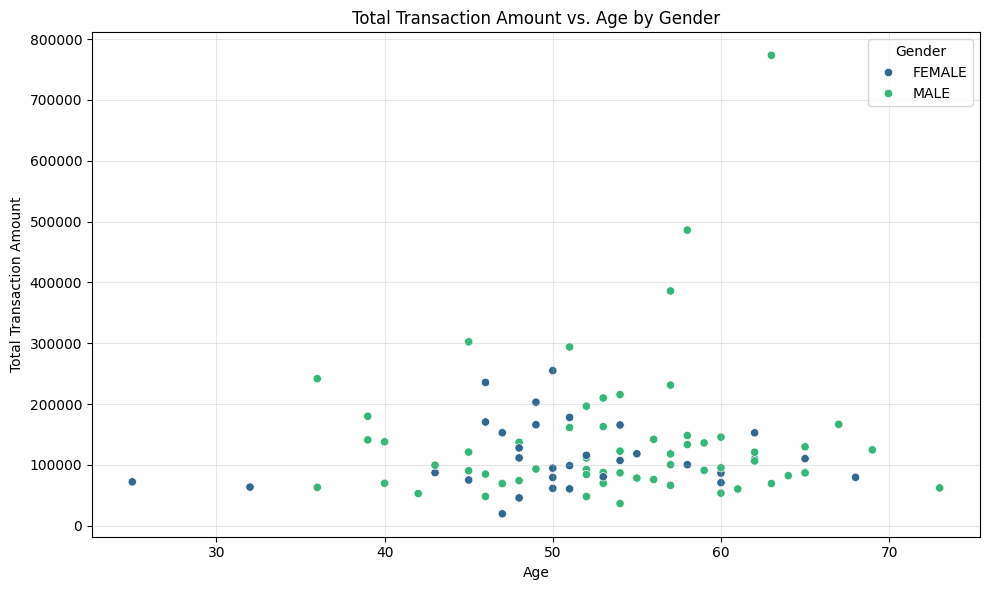

In [ ]:
# Scatter plot of Age vs. Total Transaction Amount, colored by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_profile_df, x='age', y='total_transaction_amount', hue='gndr', alpha=1, palette='viridis')
plt.title('Total Transaction Amount vs. Age by Gender')
plt.xlabel('Age')
plt.ylabel('Total Transaction Amount')
plt.legend(title='Gender')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Transaction Volume vs. Age, Segmented by Gender

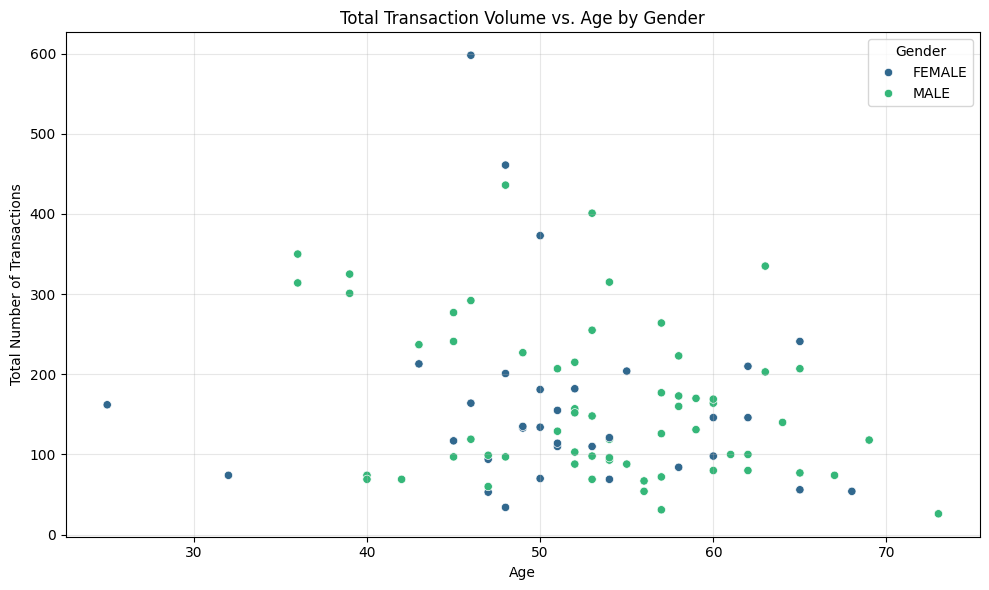

In [ ]:
# Scatter plot of Age vs. Total Transactions, colored by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_profile_df, x='age', y='total_transactions', hue='gndr', alpha=1, palette='viridis')
plt.title('Total Transaction Volume vs. Age by Gender')
plt.xlabel('Age')
plt.ylabel('Total Number of Transactions')
plt.legend(title='Gender')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##Transaction Volume

<ipython-input-844-51ad44666ebf>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis', label='Day Volume')


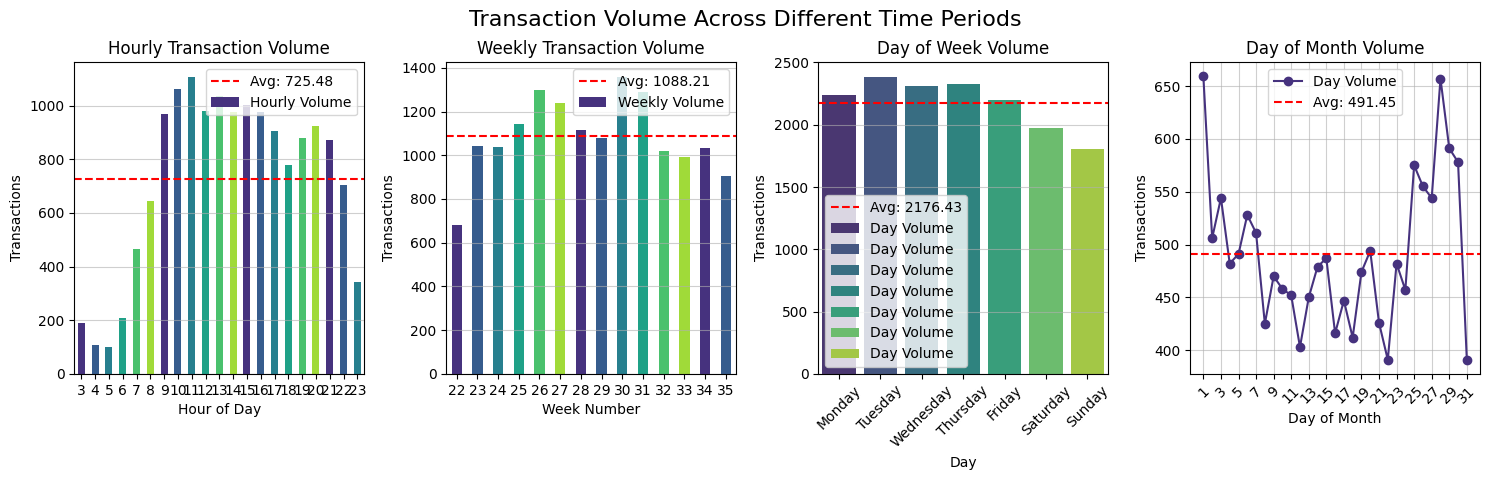

In [ ]:
plt.figure(figsize=(15, 5))

# Calculate average transaction volume per hour
hourly_counts = df_final_no_duplicates['trn_hour'].value_counts().sort_index()
average_hourly_volume = hourly_counts.mean()

# Improved Hourly Transaction Volume Plot
plt.subplot(1, 4, 1)  # Create a subplot for hourly data
hourly_counts.plot(kind='bar', color=sns.color_palette('viridis'), label='Hourly Volume')
plt.axhline(y=average_hourly_volume, color='red', linestyle='--', label=f'Avg: {average_hourly_volume:.2f}')
plt.title('Hourly Transaction Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.6)
plt.legend()

# Calculate average transaction volume per week
weekly_counts = df_final_no_duplicates['trn_week'].value_counts().sort_index()
average_weekly_volume = weekly_counts.mean()

# Improved Weekly Transaction Volume Plot
plt.subplot(1, 4, 2)  # Create a subplot for weekly data
weekly_counts.plot(kind='bar', color=sns.color_palette('viridis'), label='Weekly Volume')
plt.axhline(y=average_weekly_volume, color='red', linestyle='--', label=f'Avg: {average_weekly_volume:.2f}')
plt.title('Weekly Transaction Volume')
plt.xlabel('Week Number')
plt.ylabel('Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.6)
plt.legend()

# Transaction Volume by Day of the Week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df_final_no_duplicates['trn_day_of_week'].value_counts().reindex(days_order).fillna(0)
average_daily_volume_week = day_counts.mean()

# Improved Day of the Week Transaction Volume Plot
plt.subplot(1, 4, 3)  # Create a subplot for day of week data
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis', label='Day Volume')
plt.axhline(y=average_daily_volume_week, color='red', linestyle='--', label=f'Avg: {average_daily_volume_week:.2f}')
plt.title('Day of Week Volume')
plt.xlabel('Day')
plt.ylabel('Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.6)
plt.legend()

# Transaction Volume by Day of Month
day_of_month_counts = df_final_no_duplicates['trn_day'].value_counts().sort_index()
average_daily_volume_month = day_of_month_counts.mean()

# Improved Day of Month Transaction Volume Plot
plt.subplot(1, 4, 4)  # Create a subplot for day of month data
day_of_month_counts.plot(kind='line', marker='o', linestyle='-', color=sns.color_palette('viridis')[0], label='Day Volume')
plt.axhline(y=average_daily_volume_month, color='red', linestyle='--', label=f'Avg: {average_daily_volume_month:.2f}')
plt.title('Day of Month Volume')
plt.xlabel('Day of Month')
plt.ylabel('Transactions')
plt.xticks(range(1, 32, 2), rotation=45)  # Show every other day for clarity
plt.grid(True, alpha=0.6)
plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent titles overlapping
plt.suptitle('Transaction Volume Across Different Time Periods', fontsize=16)
plt.show()

<ipython-input-845-6373dcd31b7f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_by_age_channel = df_final_no_duplicates.groupby(['age_group', 'chn'])['trn_no'].count().reset_index()


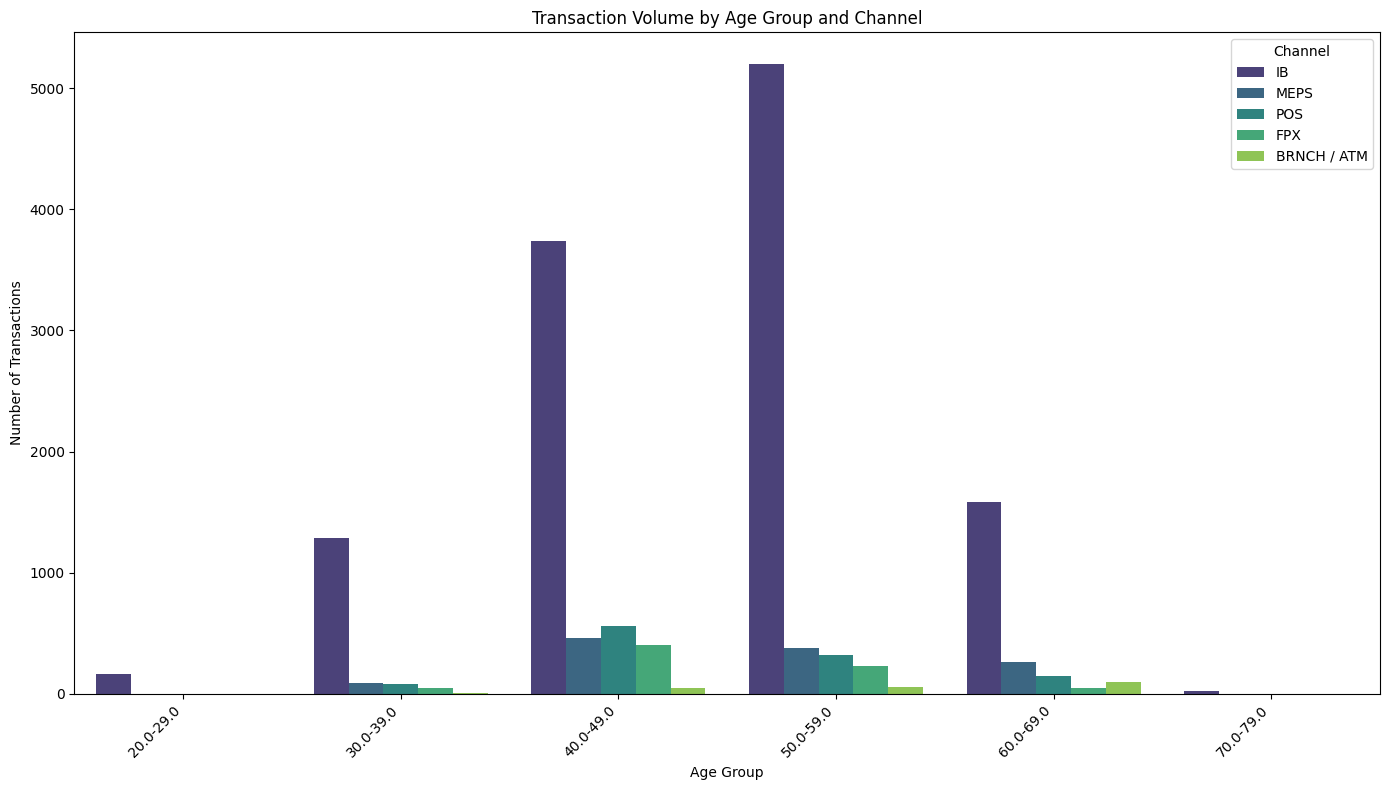

In [ ]:
# Calculate transaction volume by age group and channel
volume_by_age_channel = df_final_no_duplicates.groupby(['age_group', 'chn'])['trn_no'].count().reset_index()

# Define the order for channels to ensure consistent display
channel_order = df_final_no_duplicates['chn'].unique()

# Create the grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    x='age_group',
    y='trn_no',
    hue='chn',
    data=volume_by_age_channel,
    palette='viridis',
    hue_order=channel_order  # Ensure consistent channel order
)

plt.title('Transaction Volume by Age Group and Channel')
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

<ipython-input-846-edfa1a51d93b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_by_age_gender = df_final_no_duplicates.groupby(['age_group', 'gndr'])['trn_no'].count().reset_index()


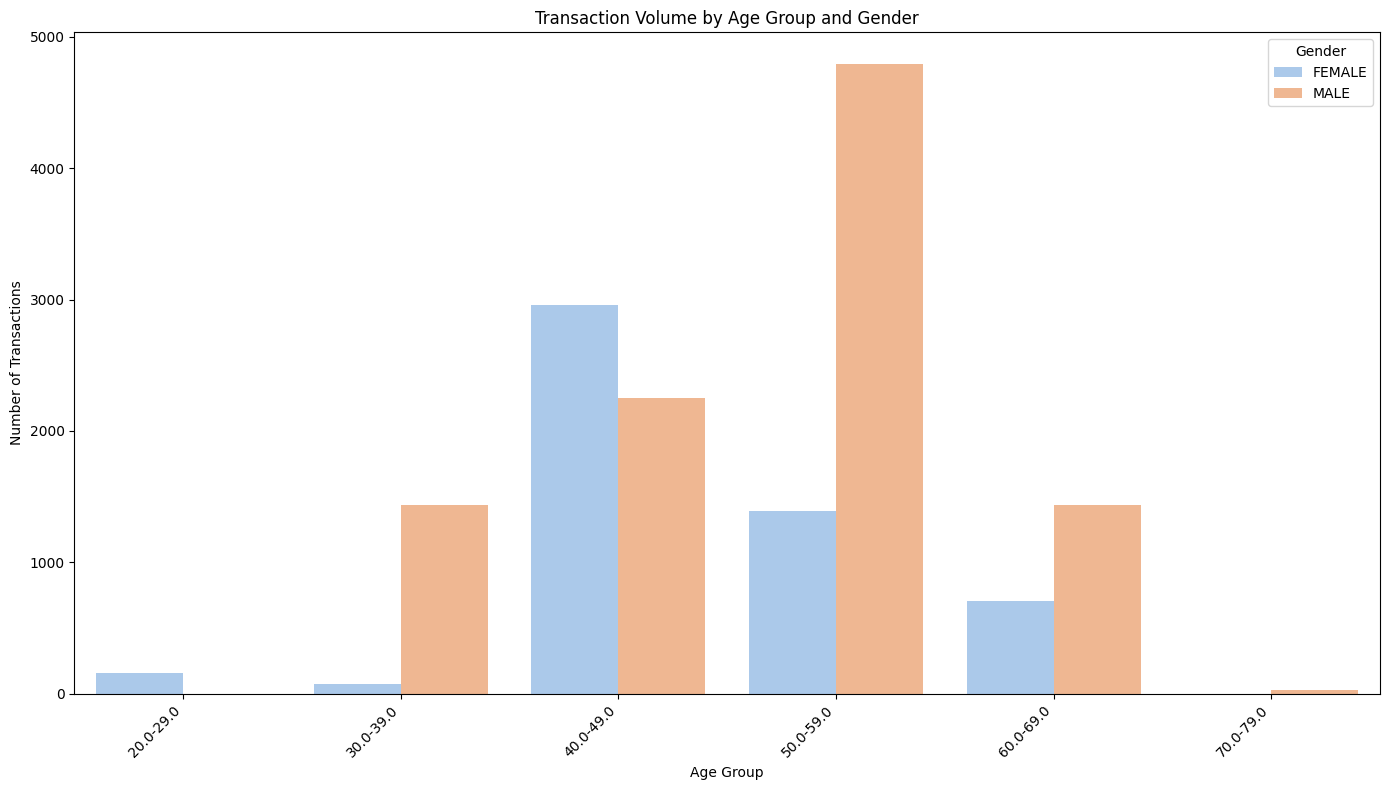

In [ ]:
# Calculate transaction volume by age group and gender
volume_by_age_gender = df_final_no_duplicates.groupby(['age_group', 'gndr'])['trn_no'].count().reset_index()

# Define the order for gender to ensure consistent display
gender_order = df_final_no_duplicates['gndr'].unique()

# Create the grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    x='age_group',
    y='trn_no',
    hue='gndr',
    data=volume_by_age_gender,
    palette='pastel',
    hue_order=gender_order  # Ensure consistent gender order
)

plt.title('Transaction Volume by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

### Transaction Volume by Hour of the Day
Most transactions happen between 10 AM and 1 PM, with the highest activity around 11 or 12 noon. Activity ramps up after 7 AM, peaks at midday, and steadily drops off by evening. Very few transactions occur between midnight and 6 AM, though there’s a curious blip around 3 AM—**possibly linked to system processes or night owls?** Follows a classic business-hours curve, with most users transacting during the day and resting at night.

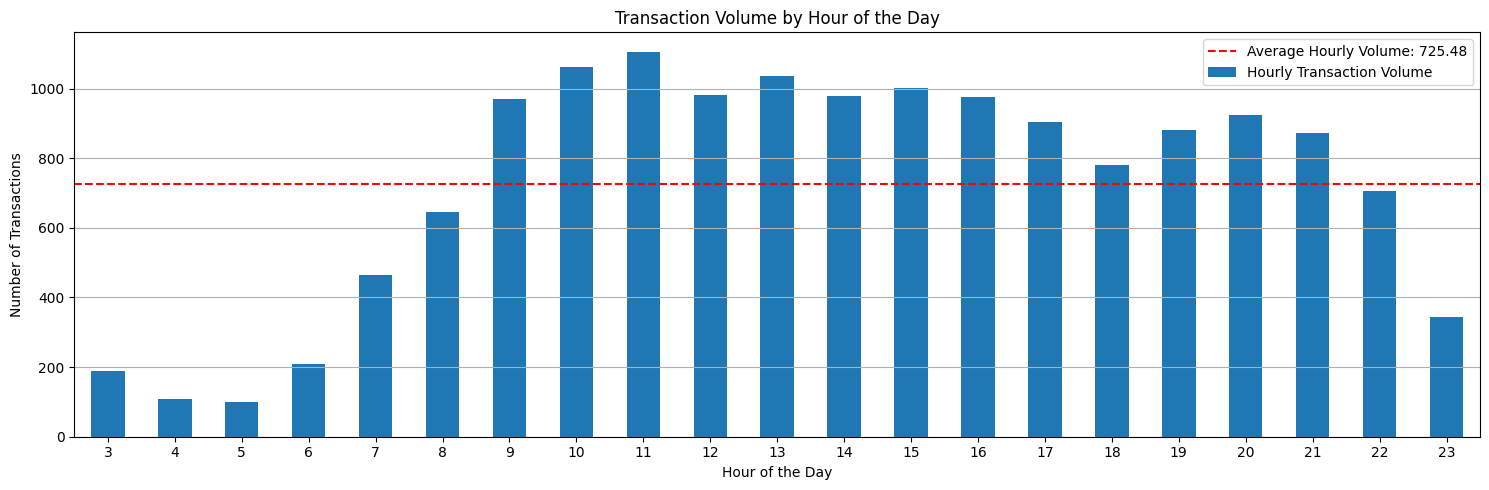

In [ ]:
plt.figure(figsize=(15, 5))

# Calculate average transaction volume per hour
hourly_counts = df_final_no_duplicates['trn_hour'].value_counts().sort_index()
average_hourly_volume = hourly_counts.mean()

hourly_counts.plot(kind='bar', label='Hourly Transaction Volume')  # Added label for the bar plot
plt.axhline(y=average_hourly_volume, color='r', linestyle='--', label=f'Average Hourly Volume: {average_hourly_volume:.2f}')  # Add average line
plt.title('Transaction Volume by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend()  # Show legend
plt.tight_layout()
plt.show()

<ipython-input-848-fbeaef7415ad>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final_no_duplicates.groupby(['trn_hour', 'age_group']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1500x1000 with 0 Axes>

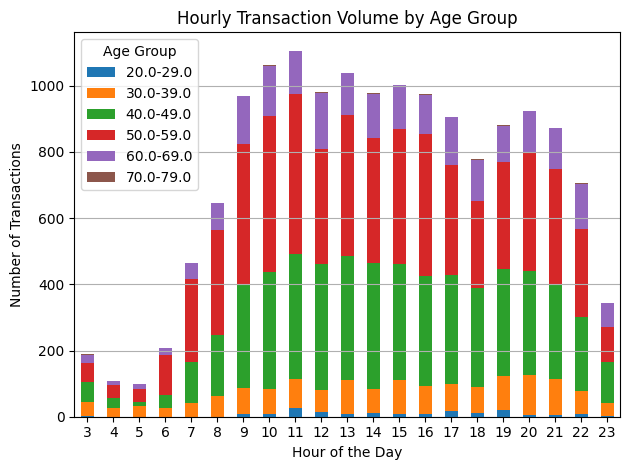

<Figure size 1500x700 with 0 Axes>

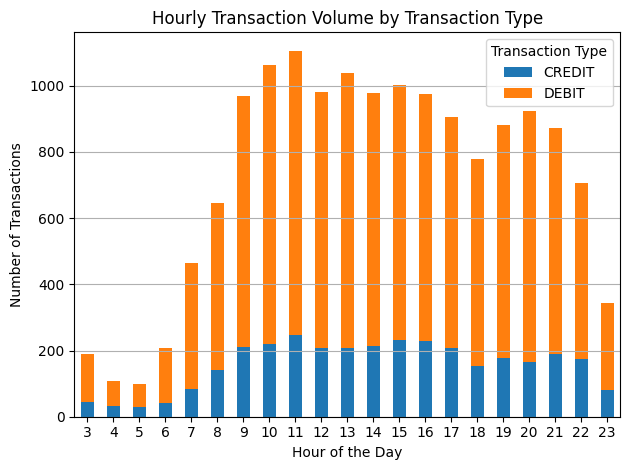

<Figure size 1500x700 with 0 Axes>

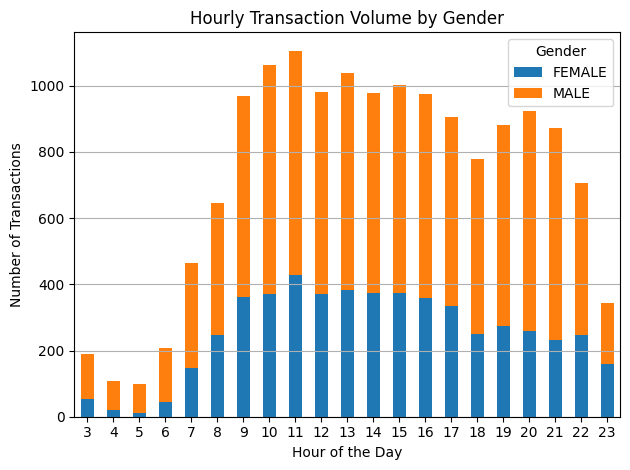

<Figure size 1500x700 with 0 Axes>

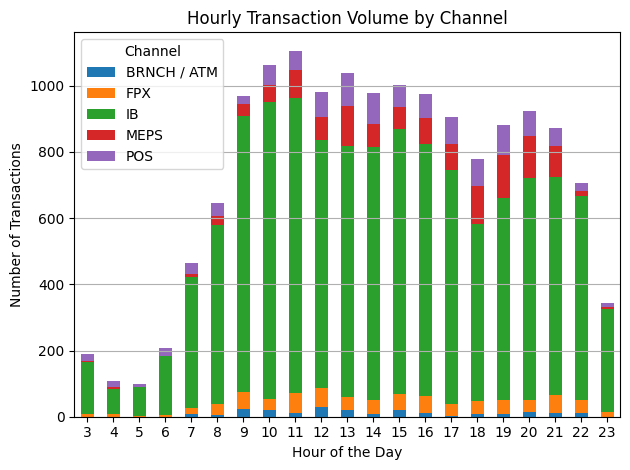

In [ ]:
# Hourly Transaction Volume by Age Group
plt.figure(figsize=(15, 10))
df_final_no_duplicates.groupby(['trn_hour', 'age_group']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Hourly Transaction Volume by Age Group')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

# Hourly Transaction Volume by Transaction Type
plt.figure(figsize=(15, 7))
df_final_no_duplicates.groupby(['trn_hour', 'trn_type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Hourly Transaction Volume by Transaction Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()

# Hourly Transaction Volume by Gender
plt.figure(figsize=(15, 7))
df_final_no_duplicates.groupby(['trn_hour', 'gndr']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Hourly Transaction Volume by Gender')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Hourly Transaction Volume by Channel
plt.figure(figsize=(15, 7))
df_final_no_duplicates.groupby(['trn_hour', 'chn']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Hourly Transaction Volume by Channel')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

### Transaction Volume by Week

Transaction volume stays fairly stable from week 22 to week 35 (early June to late August 2023), suggesting a steady user activity trend. The standout is week 30 and week 31 (late July until early August), which shows the highest activity—possibly driven by paydays, promotions, or seasonal events. Slight drops in weeks 22 and 33, but nothing dramatic—just minor week-to-week variability.

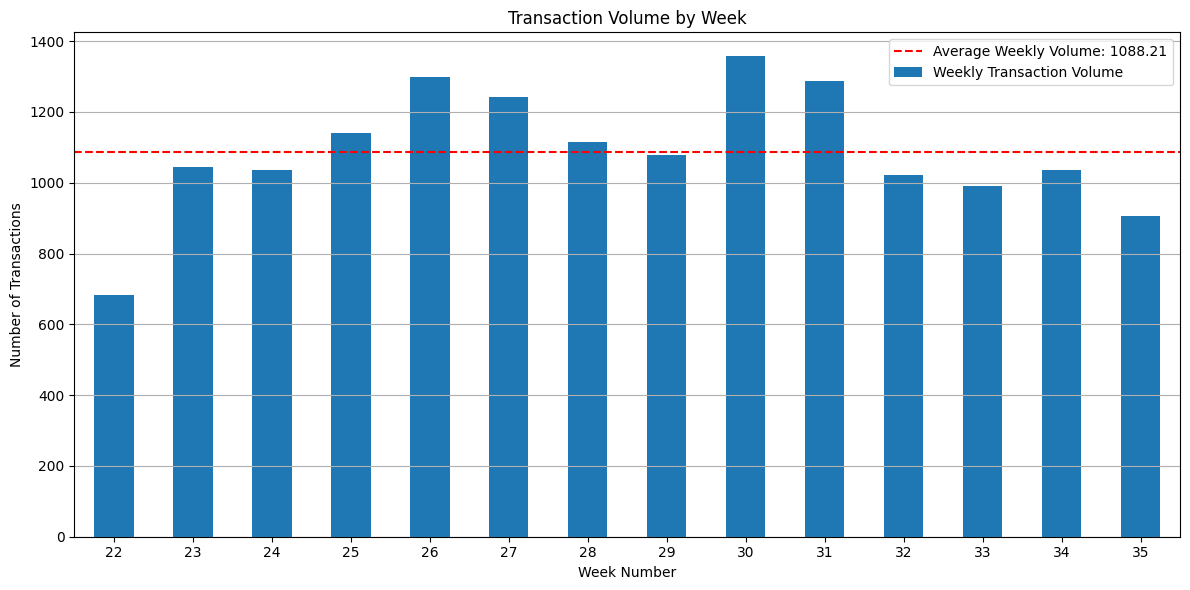

In [ ]:
# Calculate average transaction volume per week
weekly_counts = df_final_no_duplicates['trn_week'].value_counts().sort_index()
average_weekly_volume = weekly_counts.mean()

plt.figure(figsize=(12, 6))
weekly_counts.plot(kind='bar', label='Weekly Transaction Volume')  # Plot weekly counts with label
plt.axhline(y=average_weekly_volume, color='r', linestyle='--', label=f'Average Weekly Volume: {average_weekly_volume:.2f}')  # Add average line
plt.title('Transaction Volume by Week')
plt.xlabel('Week Number')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend()  # Show legend
plt.tight_layout()
plt.show()

<ipython-input-850-117e35e6d6ba>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final_no_duplicates.groupby(['trn_week', 'age_group']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1500x1000 with 0 Axes>

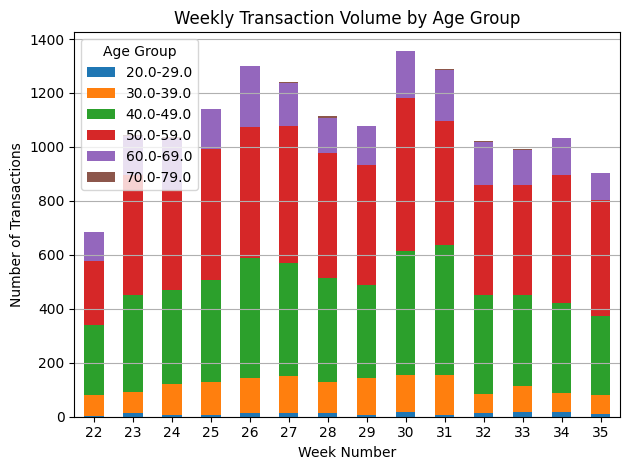

<Figure size 1200x700 with 0 Axes>

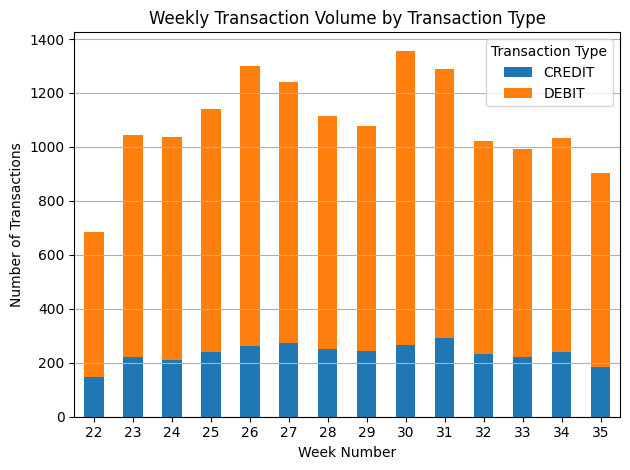

<Figure size 1200x700 with 0 Axes>

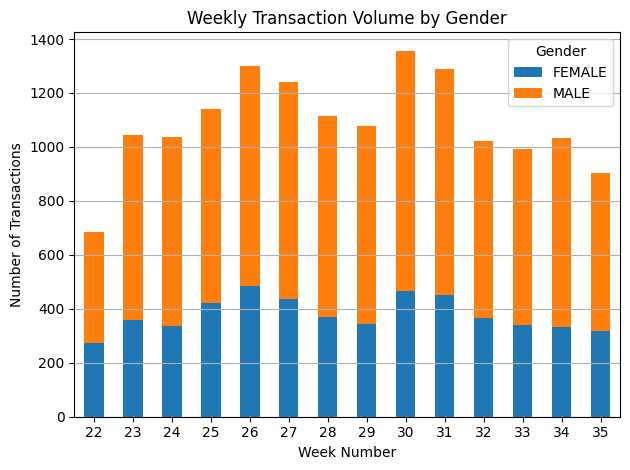

<Figure size 1500x700 with 0 Axes>

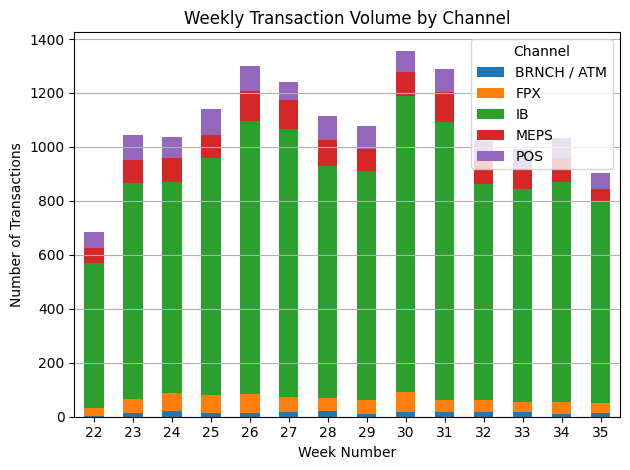

In [ ]:
# Weekly Transaction Volume by Age Group
plt.figure(figsize=(15, 10))
df_final_no_duplicates.groupby(['trn_week', 'age_group']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Weekly Transaction Volume by Age Group')
plt.xlabel('Week Number')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

# Weekly Transaction Volume by Transaction Type
plt.figure(figsize=(12, 7))
df_final_no_duplicates.groupby(['trn_week', 'trn_type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Weekly Transaction Volume by Transaction Type')
plt.xlabel('Week Number')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()

# Weekly Transaction Volume by Gender
plt.figure(figsize=(12, 7))
df_final_no_duplicates.groupby(['trn_week', 'gndr']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Weekly Transaction Volume by Gender')
plt.xlabel('Week Number')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Weekly Transaction Volume by Channel
plt.figure(figsize=(15, 7))
df_final_no_duplicates.groupby(['trn_week', 'chn']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Weekly Transaction Volume by Channel')
plt.xlabel('Week Number')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

### Transaction Volume by Day of the Week

Transaction volume remains relatively steady throughout the week, with no major spikes or slumps.There's a slight increase in activity on Tuesday and Wednesday, hinting at a mild mid-week peak. As expected, Saturday and Sunday show a slight drop, but transactions still occur at a solid rate—so no complete weekend shutdown here.

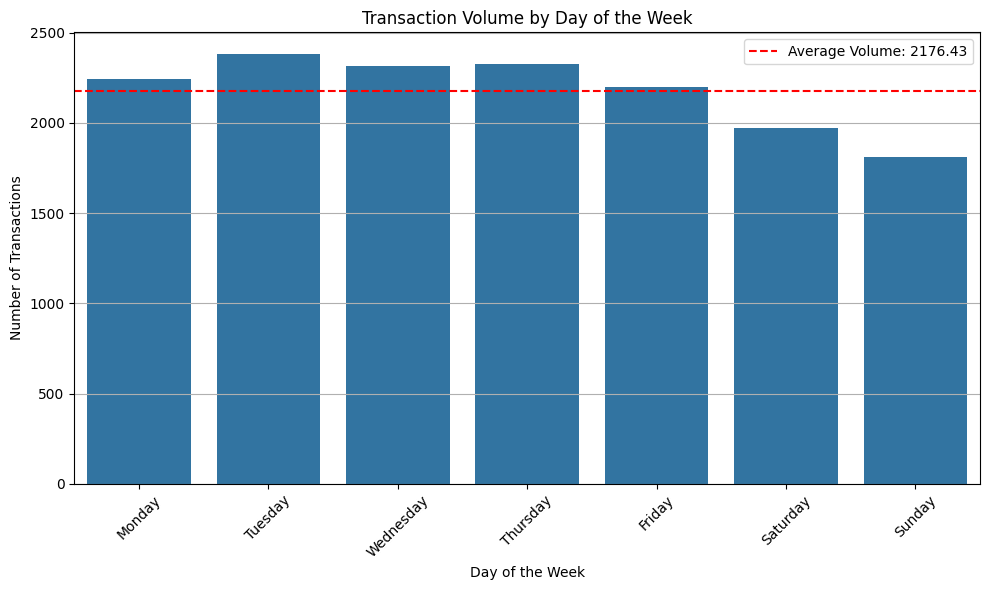

In [ ]:
# Transaction Volume by Day of the Week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.countplot(data=df_final_no_duplicates, x='trn_day_of_week', order=days)

# Calculate the average transaction volume per day of the week
average_volume = df_final_no_duplicates['trn_day_of_week'].value_counts().mean()

# Add a horizontal line for the average
plt.axhline(y=average_volume, color='r', linestyle='--', label=f'Average Volume: {average_volume:.2f}')

plt.title('Transaction Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-852-4ea5e7c5f17a>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final_no_duplicates.groupby(['trn_day_of_week', 'age_group']).size().unstack().reindex(days).plot(kind='bar', stacked=True)


<Figure size 1200x800 with 0 Axes>

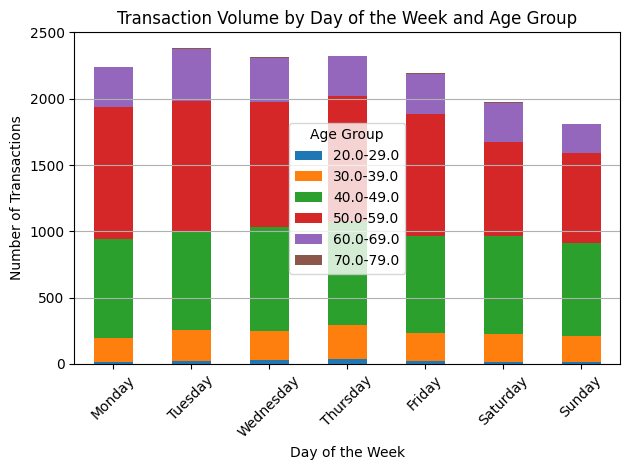

<Figure size 1000x600 with 0 Axes>

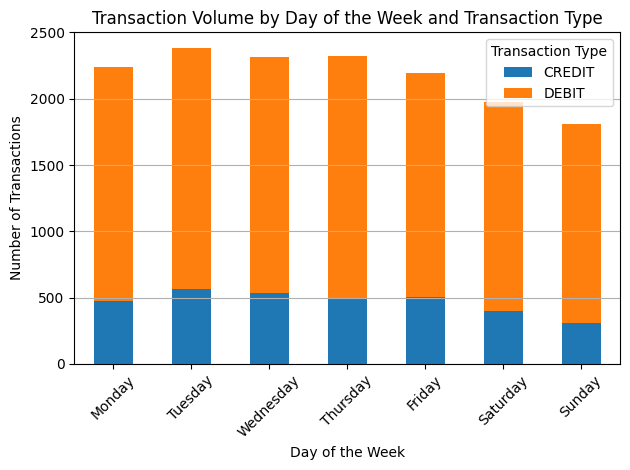

<Figure size 800x600 with 0 Axes>

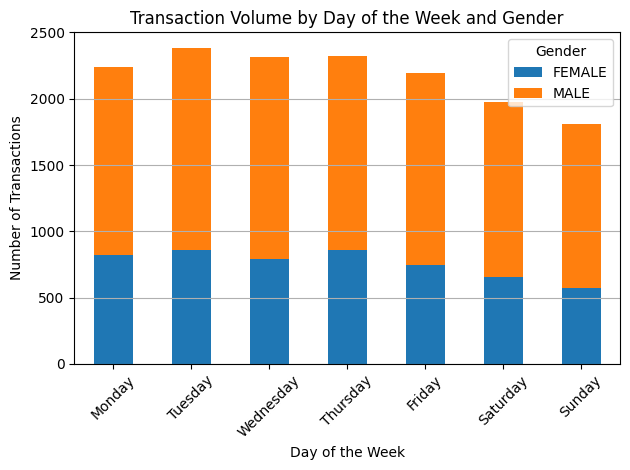

<Figure size 1500x700 with 0 Axes>

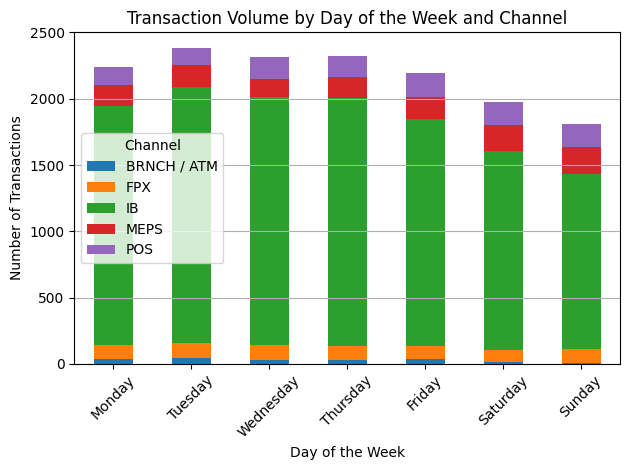

In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Transaction Volume by Day of the Week and Age Group (Stacked Bar)
plt.figure(figsize=(12, 8))
df_final_no_duplicates.groupby(['trn_day_of_week', 'age_group']).size().unstack().reindex(days).plot(kind='bar', stacked=True)
plt.title('Transaction Volume by Day of the Week and Age Group')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

# Transaction Volume by Day of the Week and Transaction Type (Stacked Bar)
plt.figure(figsize=(10, 6))
df_final_no_duplicates.groupby(['trn_day_of_week', 'trn_type']).size().unstack().reindex(days).plot(kind='bar', stacked=True)
plt.title('Transaction Volume by Day of the Week and Transaction Type')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()

# Transaction Volume by Day of the Week and Gender (Stacked Bar)
plt.figure(figsize=(8, 6))
df_final_no_duplicates.groupby(['trn_day_of_week', 'gndr']).size().unstack().reindex(days).plot(kind='bar', stacked=True)
plt.title('Transaction Volume by Day of the Week and Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Transaction Volume by Day of the Week and Channel (Stacked Bar)
plt.figure(figsize=(15, 7))
df_final_no_duplicates.groupby(['trn_day_of_week', 'chn']).size().unstack().reindex(days).plot(kind='bar', stacked=True)
plt.title('Transaction Volume by Day of the Week and Channel')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

### Transaction Volume by Day of the Month
There's a notable spike on the 1st, likely due to salary deposits, automatic bill payments, or other monthly rituals kicking off. Activity dips between the 10th and 20th, suggesting a quieter phase in the transaction cycle—maybe folks are laying low or budgeting harder here.Transactions ramp back up toward the end, especially around the 28th–30th, possibly from end-of-month spending or financial planning. A sharp drop on the 31st is seen, probably because not all months have that day, or it simply lands on weekends or non-banking days.

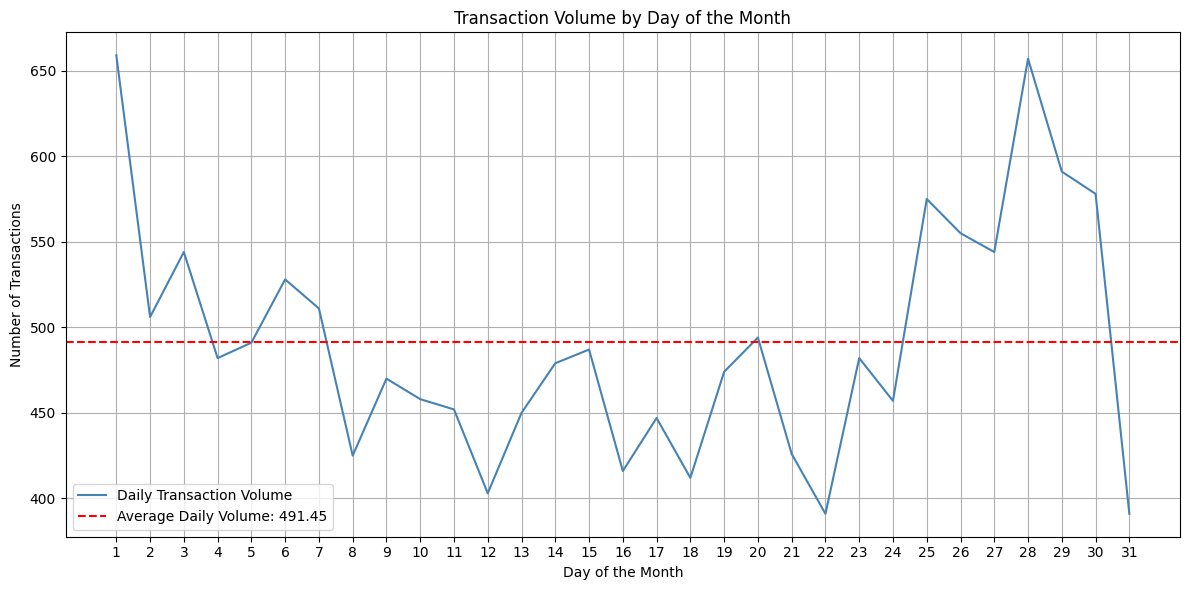

In [ ]:
# Count transactions per day of month
day_counts = df_final_no_duplicates['trn_day'].value_counts().sort_index()

# Calculate average transaction volume per day of the month
average_daily_volume_month = day_counts.mean()

# Plot using a line chart
plt.figure(figsize=(12, 6))
day_counts.plot(kind='line', linestyle='-', color='steelblue', label='Daily Transaction Volume')  # Add label
plt.axhline(y=average_daily_volume_month, color='r', linestyle='--', label=f'Average Daily Volume: {average_daily_volume_month:.2f}')  # Add average line
plt.title('Transaction Volume by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Transactions')
plt.xticks(range(1, 32))  # Days 1 to 31
plt.grid(True)
plt.legend()  # Show legend
plt.tight_layout()
plt.show()

<ipython-input-854-79ed37356d6c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_age_group_volume = df_final_no_duplicates.groupby(['trn_day', 'age_group'])['trn_no'].count().reset_index()


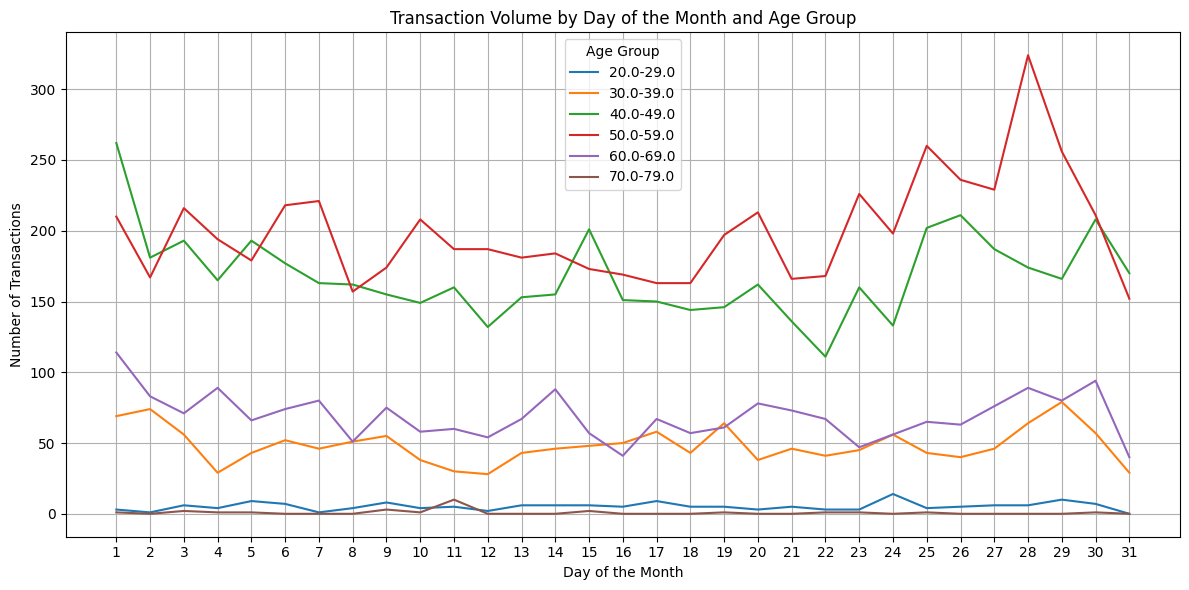

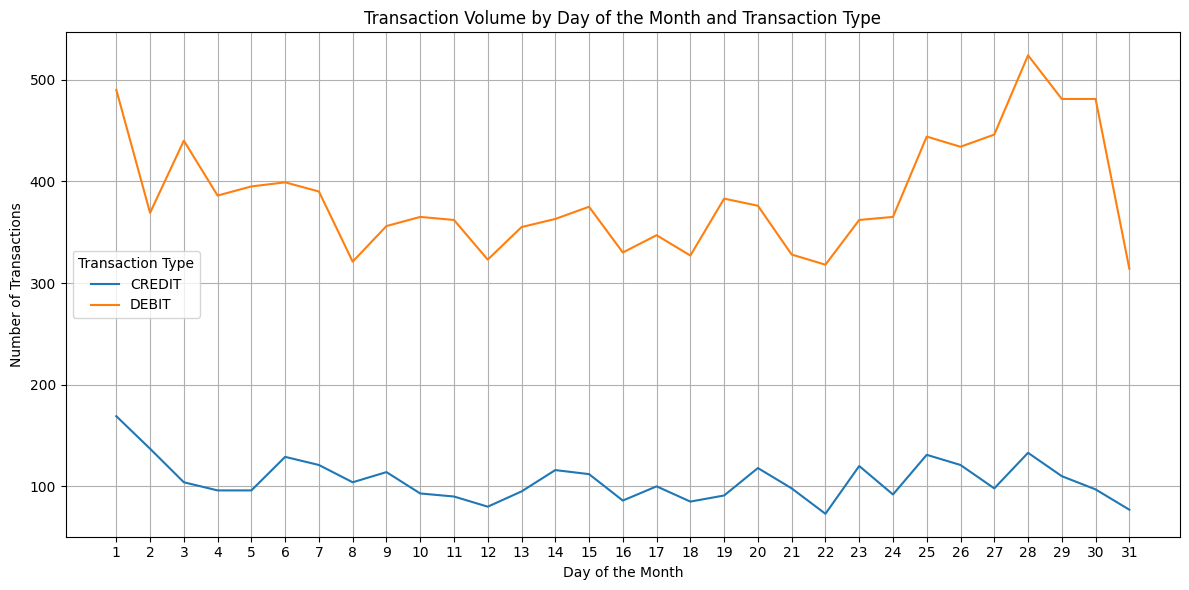

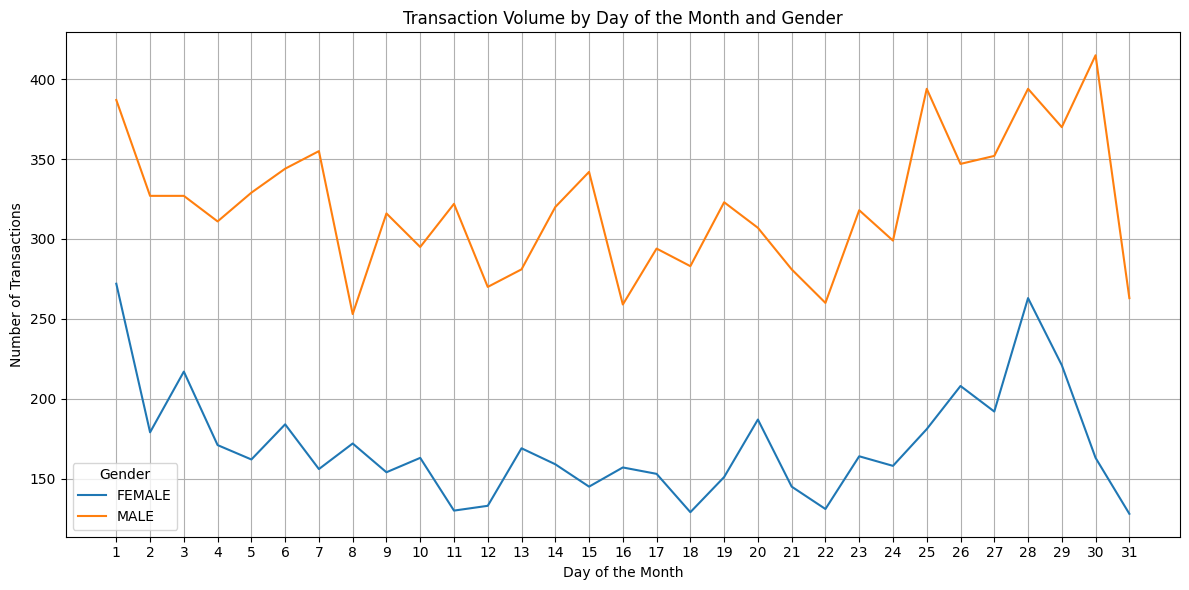

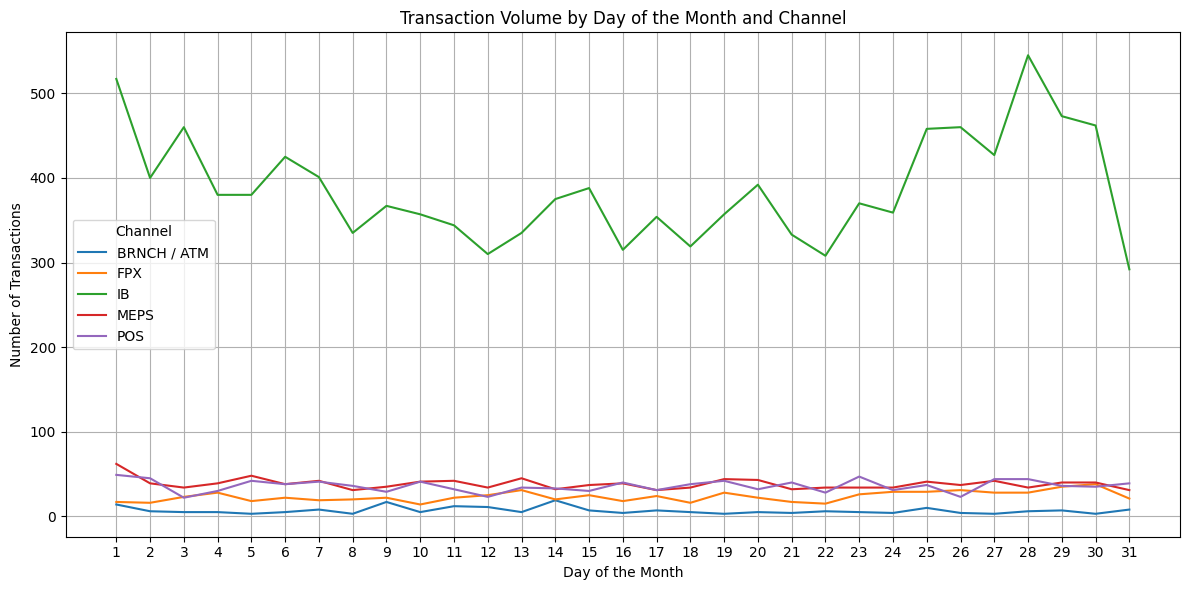

In [ ]:
# 1. Transaction Volume by Day of the Month and Age Group
daily_age_group_volume = df_final_no_duplicates.groupby(['trn_day', 'age_group'])['trn_no'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_age_group_volume, x='trn_day', y='trn_no', hue='age_group')
plt.title('Transaction Volume by Day of the Month and Age Group')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Transactions')
plt.xticks(range(1, 32))
plt.grid(True)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

# 2. Transaction Volume by Day of the Month and Transaction Type
daily_trn_type_volume = df_final_no_duplicates.groupby(['trn_day', 'trn_type'])['trn_no'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_trn_type_volume, x='trn_day', y='trn_no', hue='trn_type')
plt.title('Transaction Volume by Day of the Month and Transaction Type')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Transactions')
plt.xticks(range(1, 32))
plt.grid(True)
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()

# 3. Transaction Volume by Day of the Month and Gender
daily_gender_volume = df_final_no_duplicates.groupby(['trn_day', 'gndr'])['trn_no'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_gender_volume, x='trn_day', y='trn_no', hue='gndr')
plt.title('Transaction Volume by Day of the Month and Gender')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Transactions')
plt.xticks(range(1, 32))
plt.grid(True)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# 4. Transaction Volume by Day of the Month and Channel
daily_channel_volume = df_final_no_duplicates.groupby(['trn_day', 'chn'])['trn_no'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_channel_volume, x='trn_day', y='trn_no', hue='chn')
plt.title('Transaction Volume by Day of the Month and Channel')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Transactions')
plt.xticks(range(1, 32))
plt.grid(True)
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

### Transaction Volume by Month
Transaction activity peaked in July, clearly outpacing both June and August. These two months show similar transaction volumes, with August slightly edging out June. There's no strong upward or downward trend across the three months—more like a mid-summer spike flanked by consistent activity.

<ipython-input-855-2875f04a02d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_no_duplicates['month'] = pd.to_datetime(df_final_no_duplicates['trn_dt']).dt.month_name()
<ipython-input-855-2875f04a02d1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_volume.index, y=monthly_volume.values, palette='viridis')


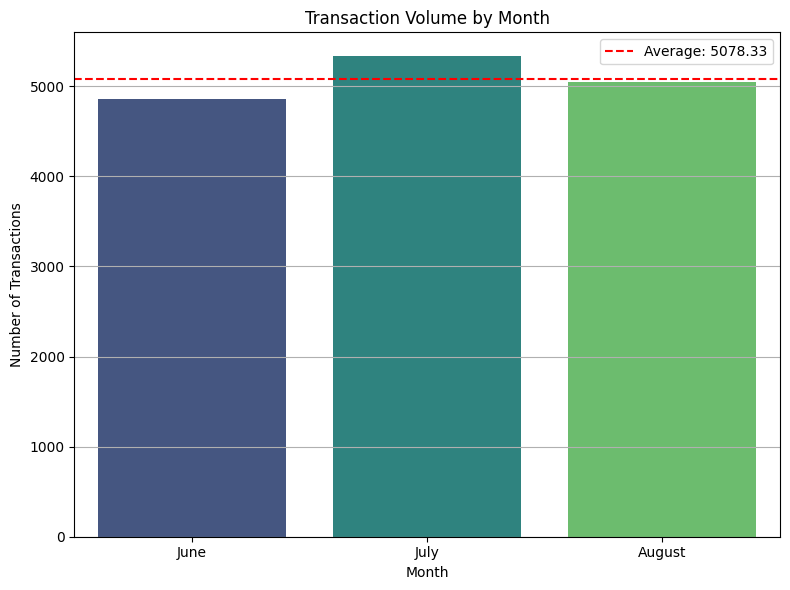

month
June      4862
July      5331
August    5042
Name: count, dtype: int64


In [ ]:
# Extract the month name
df_final_no_duplicates['month'] = pd.to_datetime(df_final_no_duplicates['trn_dt']).dt.month_name()

# Define the order of the months for the plot
month_order = ['June', 'July', 'August']

# Calculate the transaction volume per month
monthly_volume = df_final_no_duplicates['month'].value_counts().reindex(month_order).fillna(0)

# Calculate the average monthly transaction volume
average_monthly_volume = monthly_volume.mean()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=monthly_volume.index, y=monthly_volume.values, palette='viridis')

# Add the average line
plt.axhline(average_monthly_volume, color='red', linestyle='--', label=f'Average: {average_monthly_volume:.2f}')

plt.title('Transaction Volume by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

print(monthly_volume)

<ipython-input-856-a64f947ef9bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_no_duplicates['month'] = pd.to_datetime(df_final_no_duplicates['trn_dt']).dt.month_name()


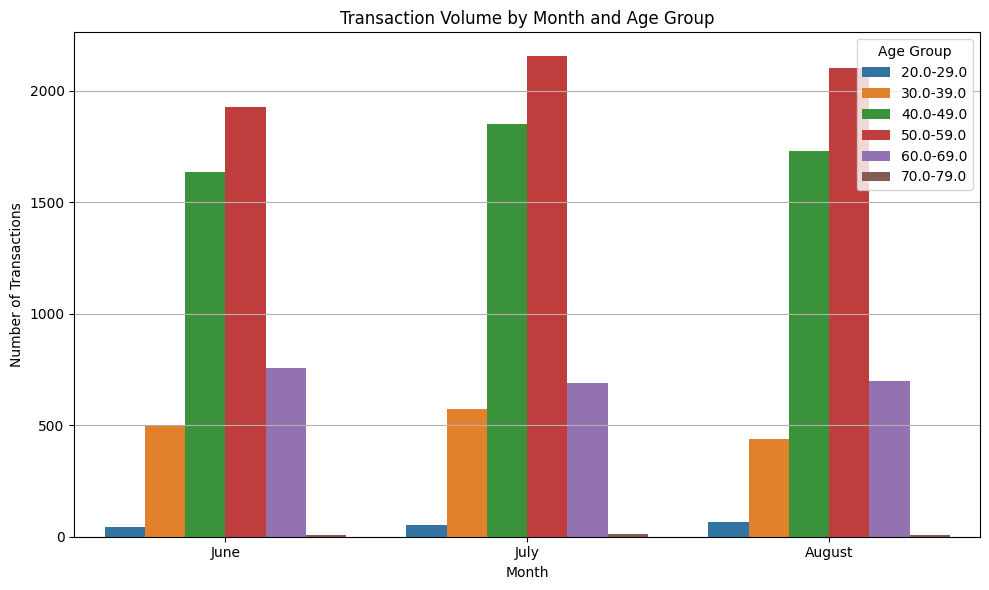

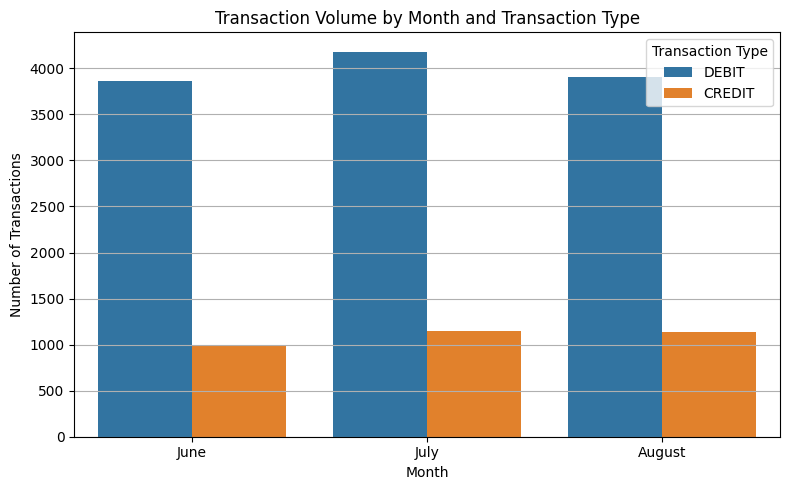

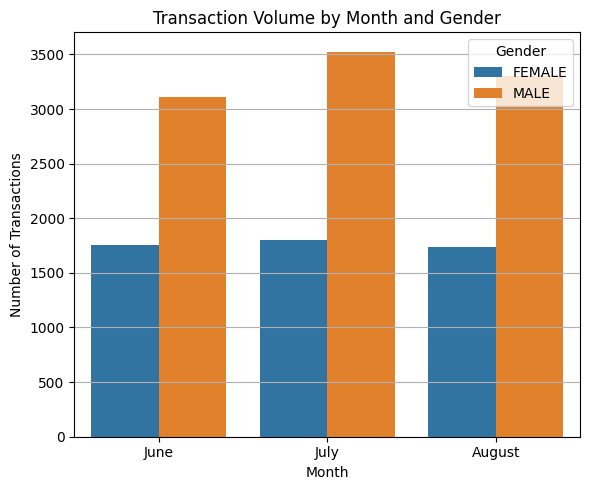

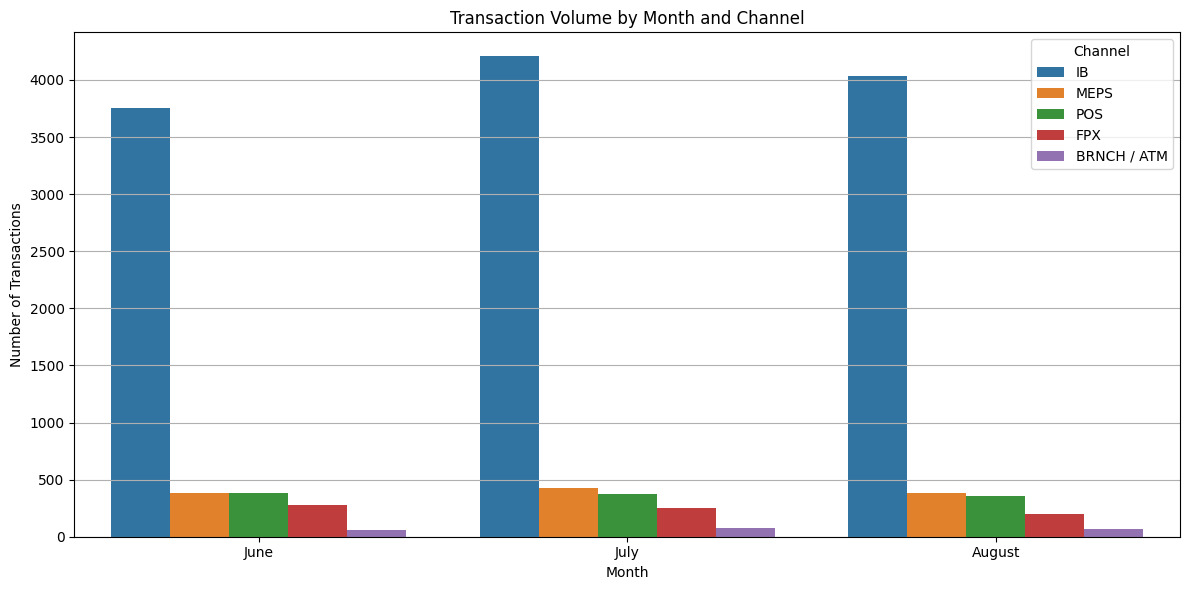

In [ ]:
# Ensure 'trn_dt' is in datetime format
df_final_no_duplicates.loc[:, 'trn_dt'] = pd.to_datetime(df_final_no_duplicates['trn_dt']).dt.date
df_final_no_duplicates['month'] = pd.to_datetime(df_final_no_duplicates['trn_dt']).dt.month_name()
month_order = ['June', 'July', 'August']

# 1. Transaction Volume by Month and Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final_no_duplicates, x='month', order=month_order, hue='age_group')
plt.title('Transaction Volume by Month and Age Group')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

# 2. Transaction Volume by Month and Transaction Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df_final_no_duplicates, x='month', order=month_order, hue='trn_type')
plt.title('Transaction Volume by Month and Transaction Type')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()

# 3. Transaction Volume by Month and Gender
plt.figure(figsize=(6, 5))
sns.countplot(data=df_final_no_duplicates, x='month', order=month_order, hue='gndr')
plt.title('Transaction Volume by Month and Gender')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# 4. Transaction Volume by Month and Channel
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final_no_duplicates, x='month', order=month_order, hue='chn')
plt.title('Transaction Volume by Month and Channel')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

# Drop the temporary 'month' column
df_final_no_duplicates = df_final_no_duplicates.drop(columns=['month'])

## Relationship between Variables

### Relationship between Daily Transaction Volume and Amount

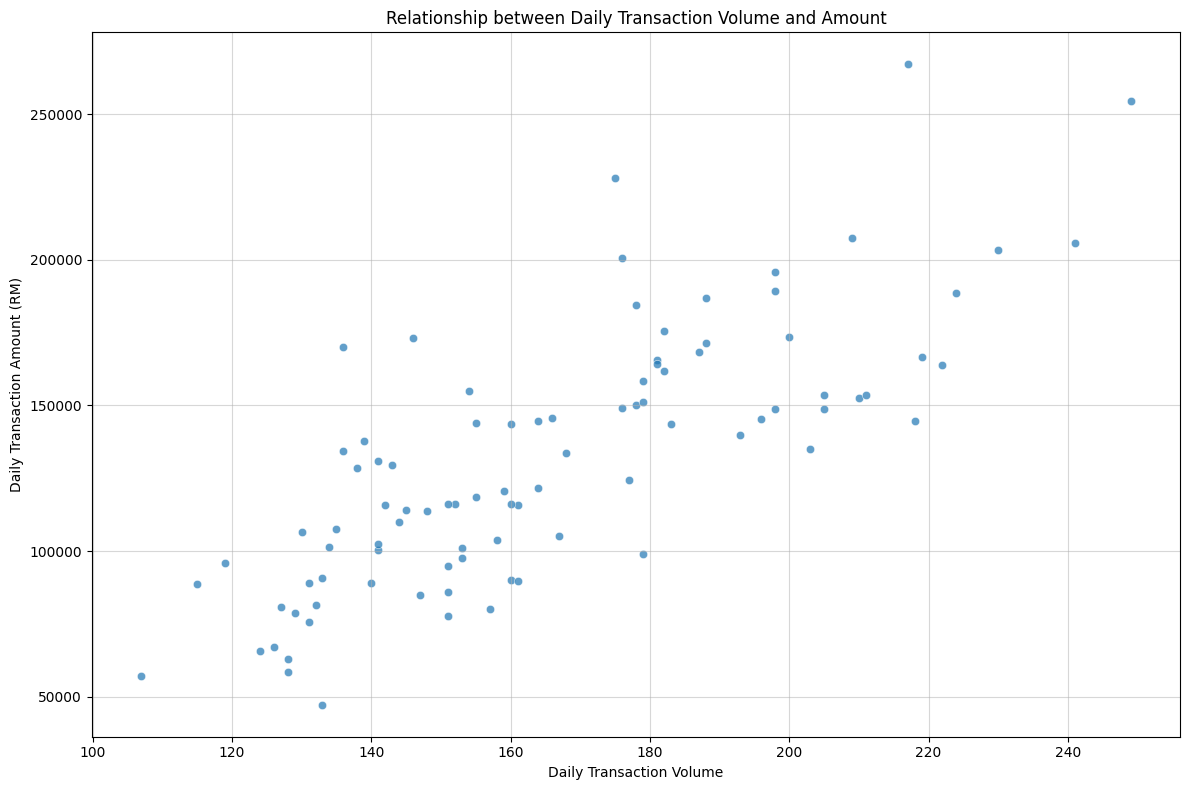

In [ ]:
daily_stats = df_final_no_duplicates.groupby('trn_dt').agg(
    daily_volume=('trn_no', 'count'),
    daily_amount=('amt', 'sum')
).reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=daily_stats, x='daily_volume', y='daily_amount', alpha=0.7)

plt.title('Relationship between Daily Transaction Volume and Amount')
plt.xlabel('Daily Transaction Volume')
plt.ylabel('Daily Transaction Amount (RM)')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

### Relationship between Daily Transaction Volume and Amount by Channel

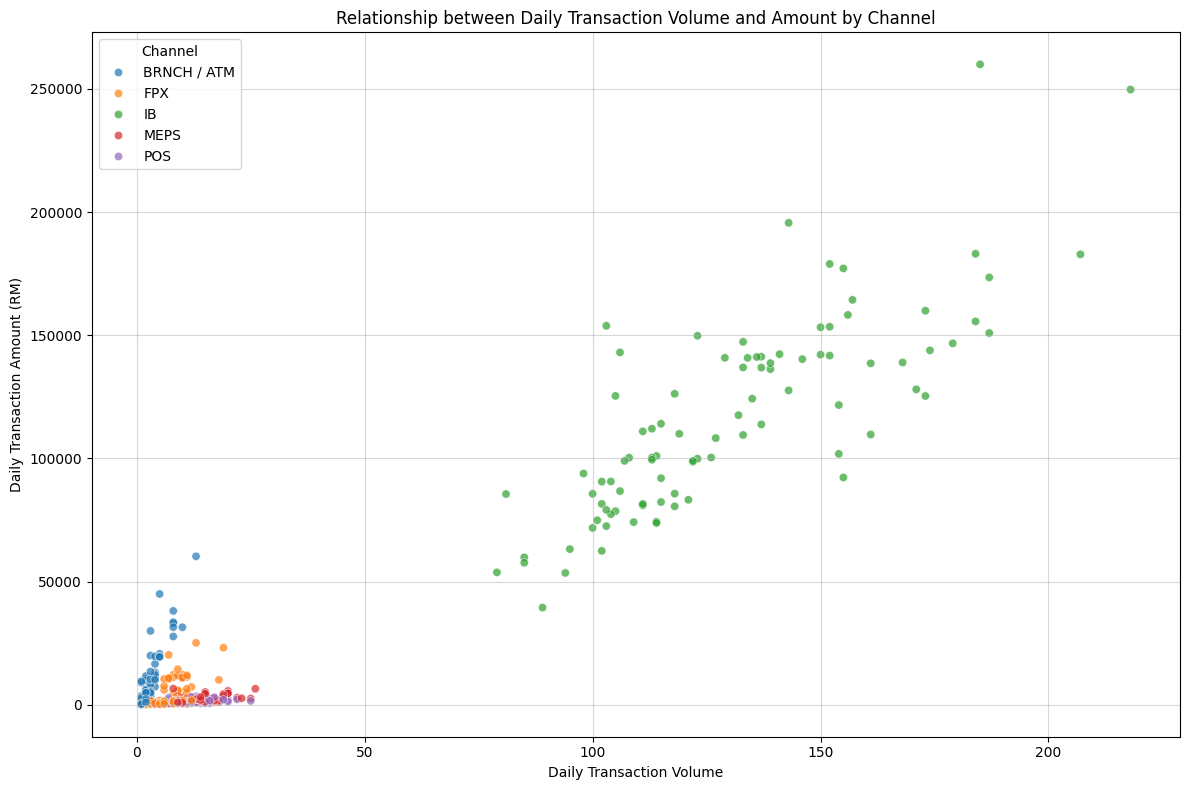

In [ ]:
daily_channel_stats = df_final_no_duplicates.groupby(['trn_dt', 'chn']).agg(
    daily_volume=('trn_no', 'count'),
    daily_amount=('amt', 'sum')
).reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=daily_channel_stats, x='daily_volume', y='daily_amount', hue='chn', alpha=0.7)

plt.title('Relationship between Daily Transaction Volume and Amount by Channel')
plt.xlabel('Daily Transaction Volume')
plt.ylabel('Daily Transaction Amount (RM)')
plt.legend(title='Channel')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

### Relationship between Daily Transaction Volume and Amount by Transaction Type

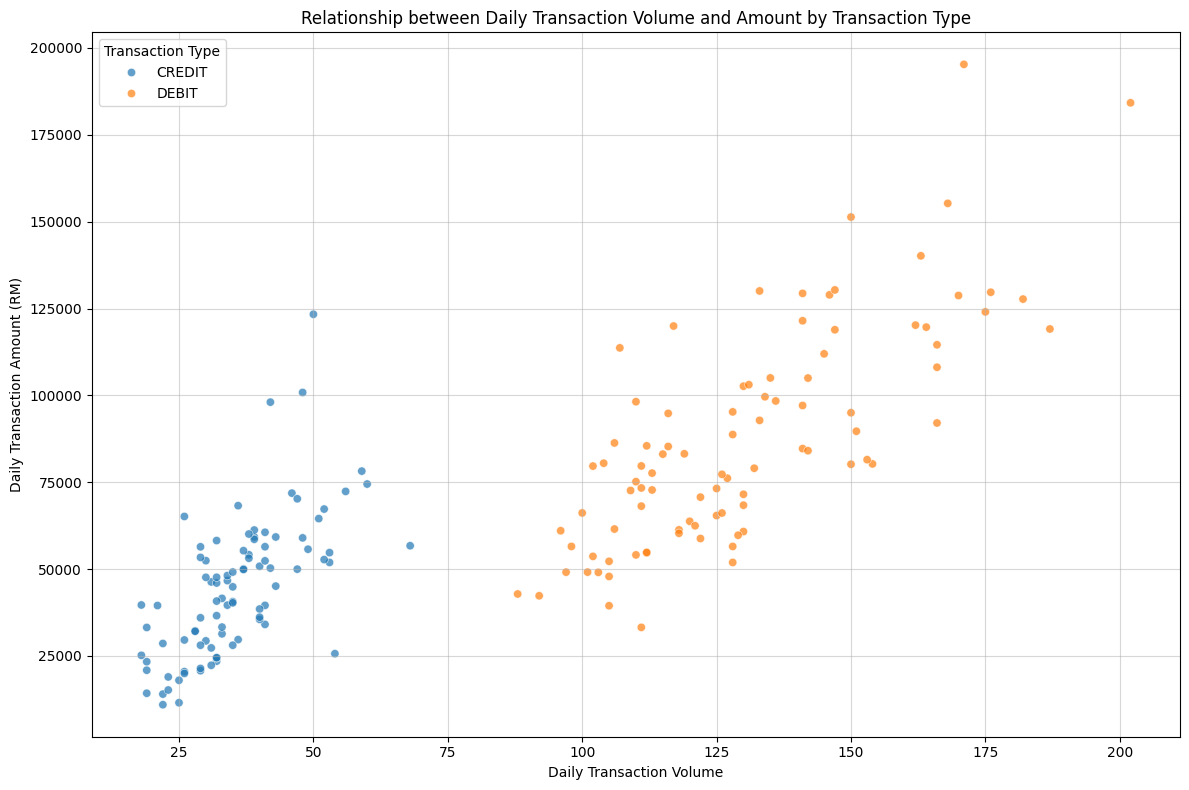

In [ ]:
# Group by date and channel, then calculate daily volume and amount
daily_channel_stats = df_final_no_duplicates.groupby(['trn_dt', 'trn_type']).agg(
    daily_volume=('trn_no', 'count'),
    daily_amount=('amt', 'sum')
).reset_index()

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=daily_channel_stats, x='daily_volume', y='daily_amount', hue='trn_type', alpha=0.7)

plt.title('Relationship between Daily Transaction Volume and Amount by Transaction Type')
plt.xlabel('Daily Transaction Volume')
plt.ylabel('Daily Transaction Amount (RM)')
plt.legend(title='Transaction Type')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

### Relationship between Daily Transaction Volume and Amount by Transaction Description

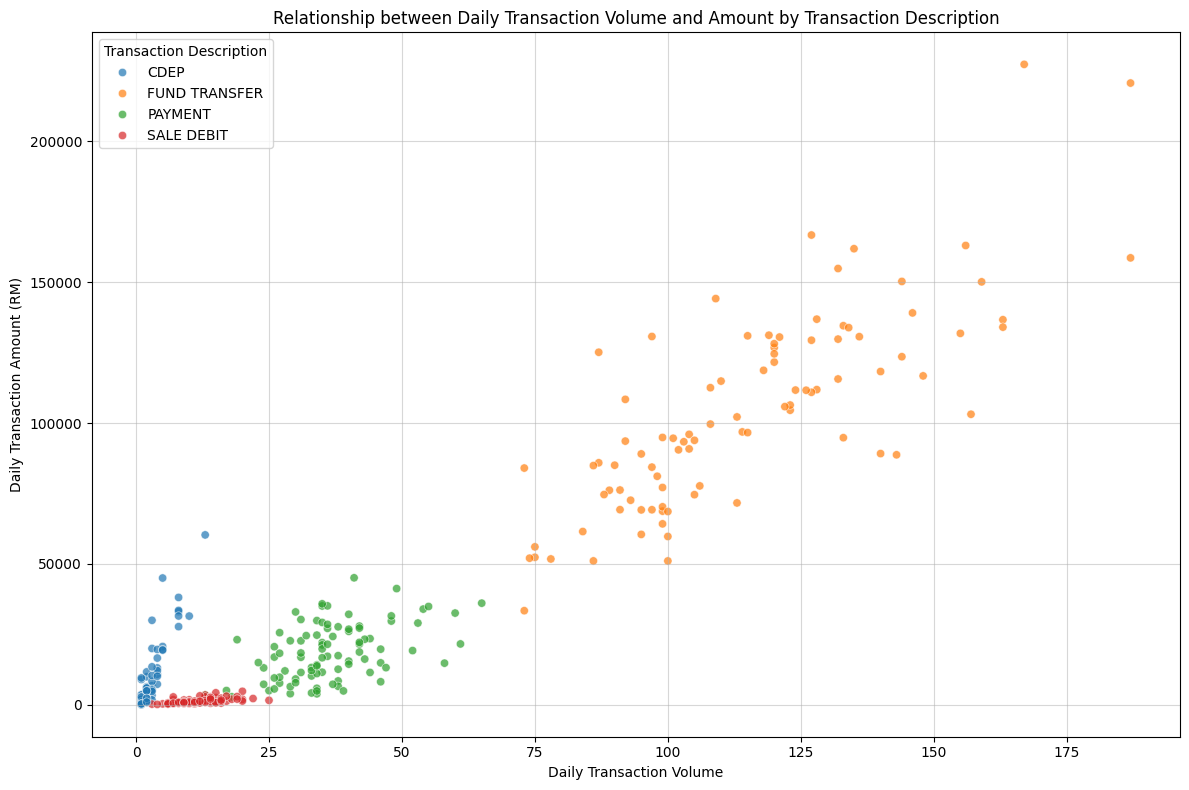

In [ ]:
# Group by date and channel, then calculate daily volume and amount
daily_channel_stats = df_final_no_duplicates.groupby(['trn_dt', 'trn_desc']).agg(
    daily_volume=('trn_no', 'count'),
    daily_amount=('amt', 'sum')
).reset_index()

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=daily_channel_stats, x='daily_volume', y='daily_amount', hue='trn_desc', alpha=0.7)

plt.title('Relationship between Daily Transaction Volume and Amount by Transaction Description')
plt.xlabel('Daily Transaction Volume')
plt.ylabel('Daily Transaction Amount (RM)')
plt.legend(title='Transaction Description')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

### Relationship between Daily Transaction Volume and Amount by Age Group

<ipython-input-861-8eb00bba8bda>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_channel_stats = df_final_no_duplicates.groupby(['trn_dt', 'age_group']).agg(


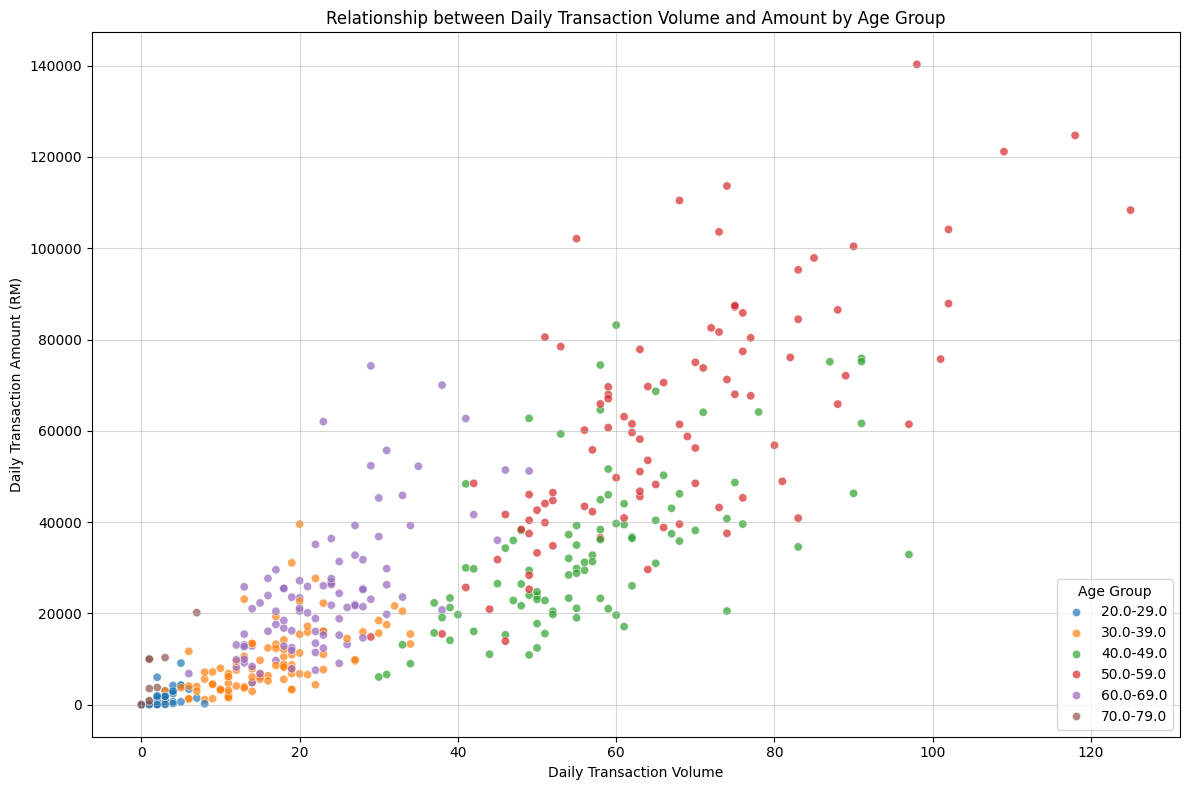

In [ ]:
daily_channel_stats = df_final_no_duplicates.groupby(['trn_dt', 'age_group']).agg(
    daily_volume=('trn_no', 'count'),
    daily_amount=('amt', 'sum')
).reset_index()

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=daily_channel_stats, x='daily_volume', y='daily_amount', hue='age_group', alpha=0.7)

plt.title('Relationship between Daily Transaction Volume and Amount by Age Group')
plt.xlabel('Daily Transaction Volume')
plt.ylabel('Daily Transaction Amount (RM)')
plt.legend(title='Age Group', loc='lower right')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

### Distribution of Transaction Amount by Age Group

- Below Age 30: Transactions are generally low and tightly clustered, mostly under RM 2,000—a modest spending pattern with minimal outliers.
-  Age 30 and Above: The spread of transaction amounts increases significantly. Older users (especially ages 60–79) show greater variability, including high-value transactions nearing RM 10,000.
-  Age vs. Variability: While the median amount remains relatively steady across age groups, older age groups show higher variability, suggesting broader financial activity or responsibilities.

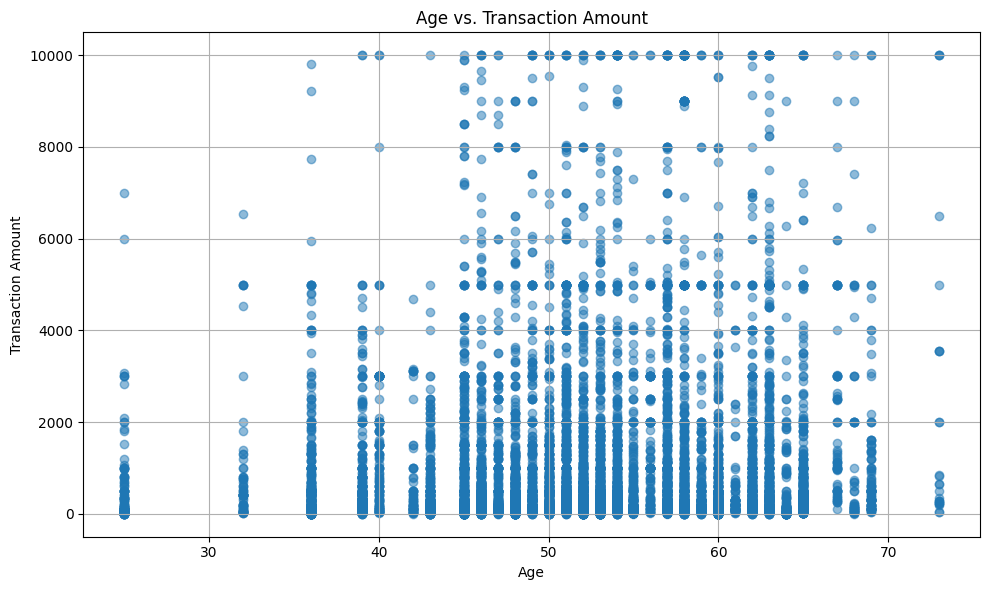

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_final_no_duplicates['age'], df_final_no_duplicates['amt'], alpha=0.5)
plt.title('Age vs. Transaction Amount')
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

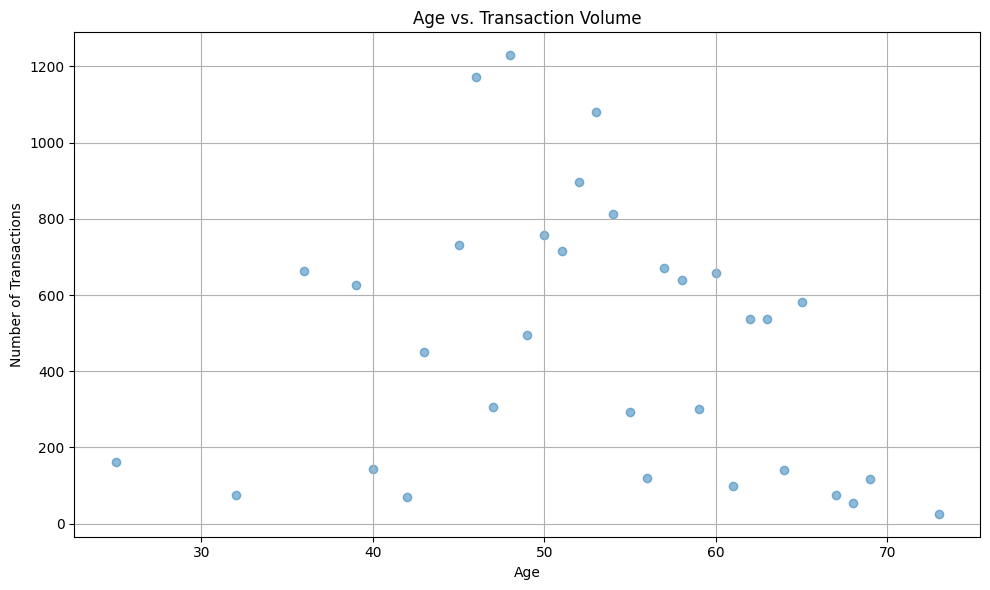

In [ ]:
# Group by age and count the number of transactions for each age
transaction_volume_by_age = df_final_no_duplicates['age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.scatter(transaction_volume_by_age.index, transaction_volume_by_age.values, alpha=0.5)
plt.title('Age vs. Transaction Volume')
plt.xlabel('Age')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

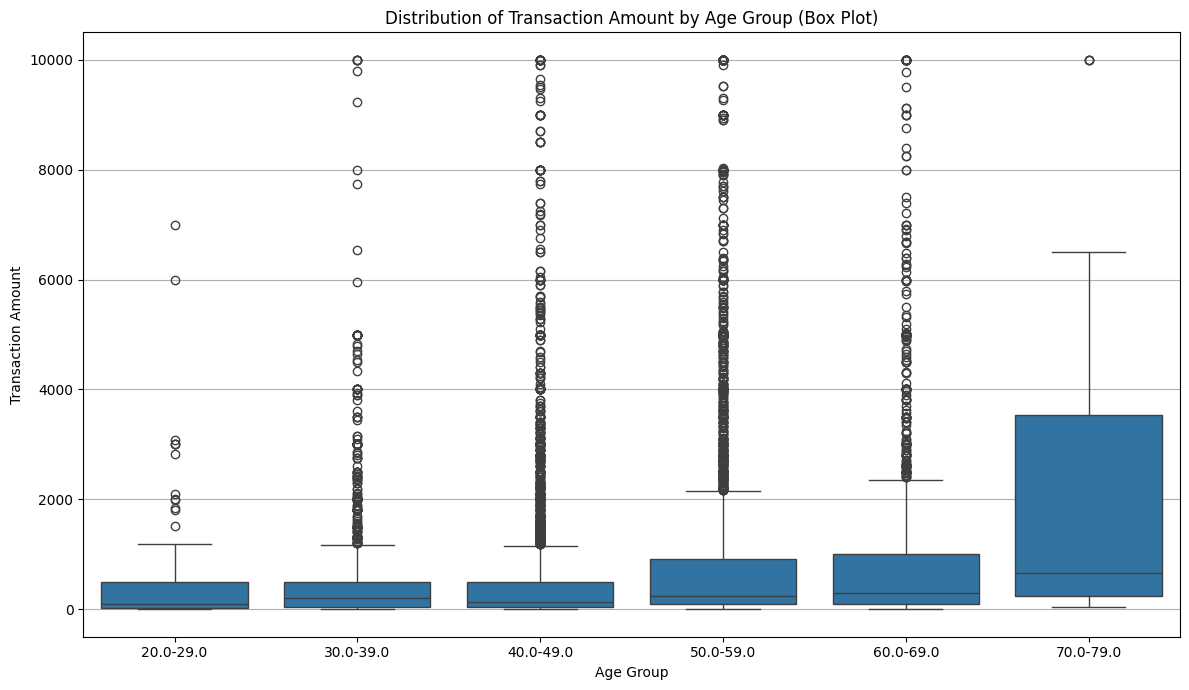

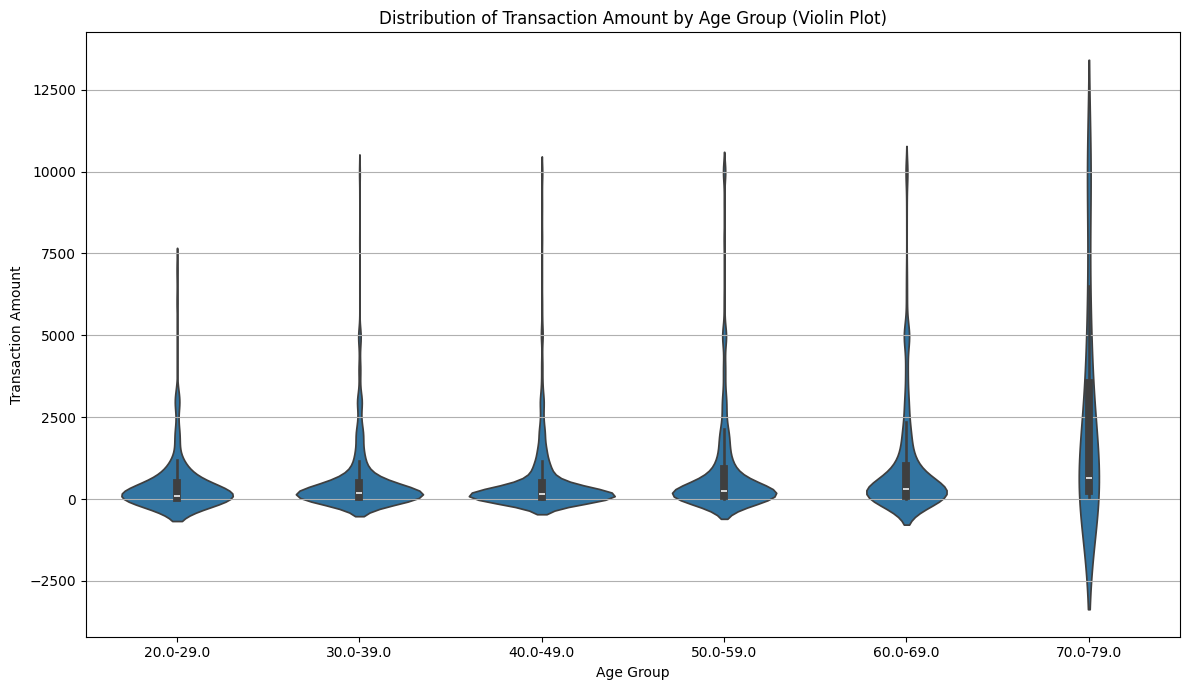

In [ ]:
# Order the age groups for better visualization
age_group_order = sorted(df_final_no_duplicates['age_group'].unique())

plt.figure(figsize=(12, 7))
sns.boxplot(data=df_final_no_duplicates, x='age_group', y='amt', order=age_group_order)
plt.title('Distribution of Transaction Amount by Age Group (Box Plot)')
plt.xlabel('Age Group')
plt.ylabel('Transaction Amount')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.violinplot(data=df_final_no_duplicates, x='age_group', y='amt', order=age_group_order)
plt.title('Distribution of Transaction Amount by Age Group (Violin Plot)')
plt.xlabel('Age Group')
plt.ylabel('Transaction Amount')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Transaction Amount by Transaction Type, Segmented by Age Group


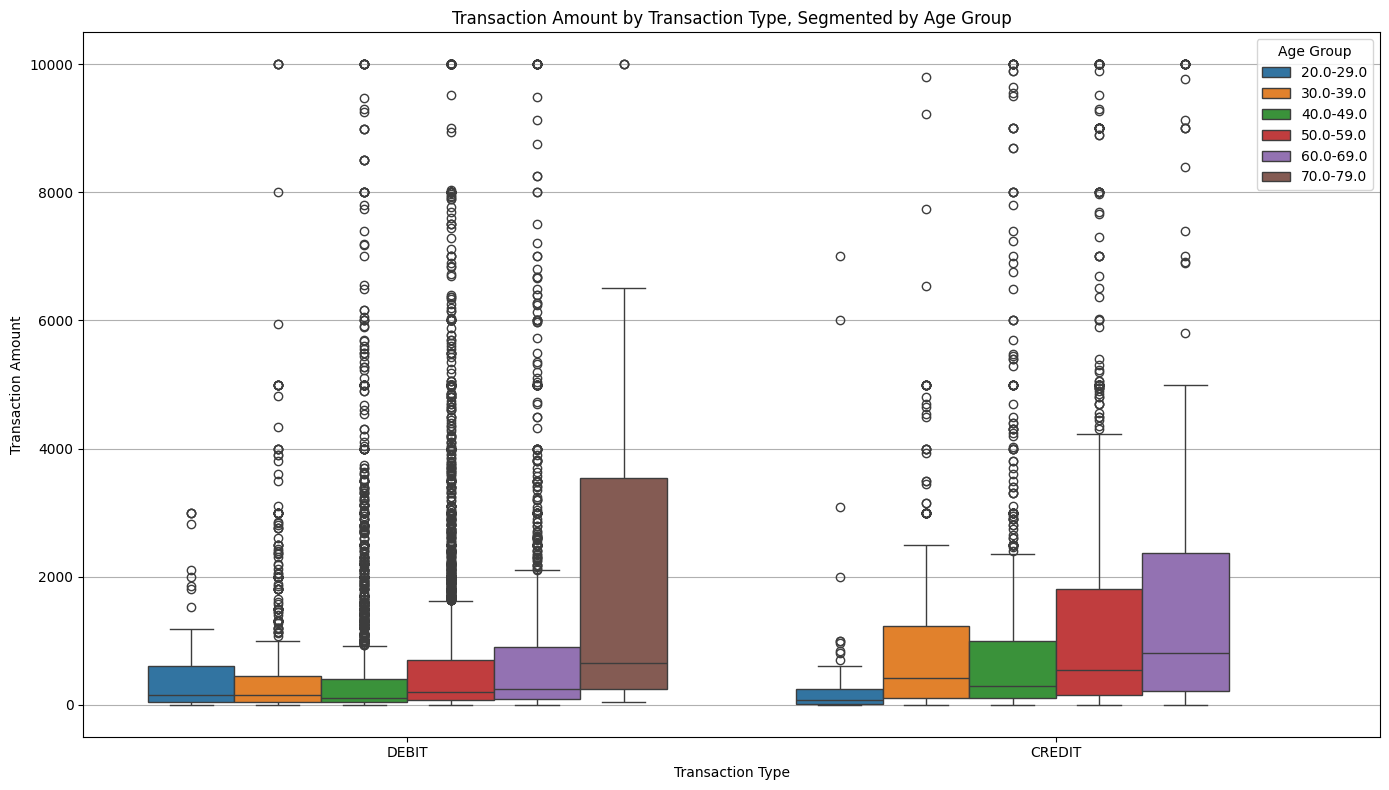

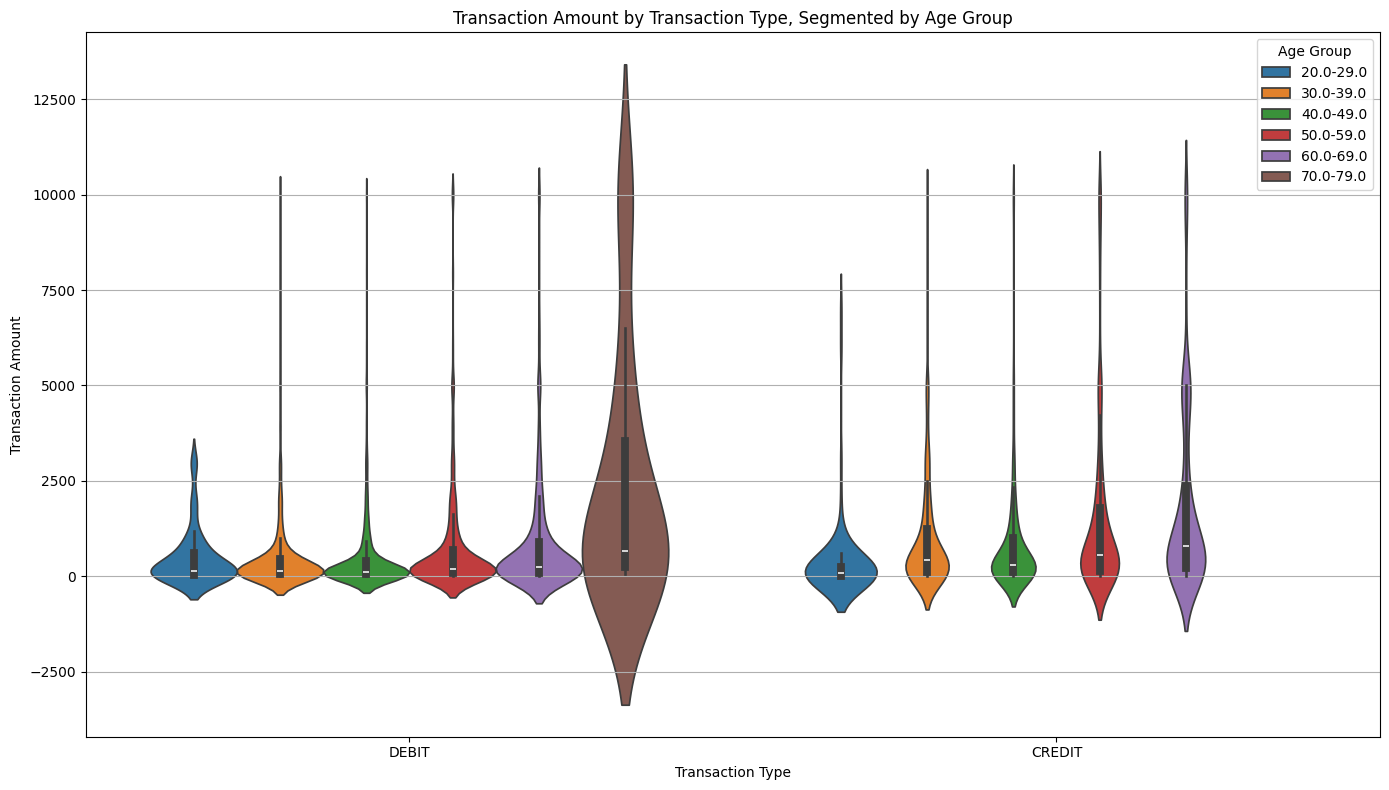

In [ ]:
# Order the age groups for better visualization
age_group_order = sorted(df_final_no_duplicates['age_group'].unique())

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_final_no_duplicates, x='trn_type', y='amt', hue='age_group', order=['DEBIT', 'CREDIT'])
plt.title('Transaction Amount by Transaction Type, Segmented by Age Group')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.legend(title='Age Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.violinplot(data=df_final_no_duplicates, x='trn_type', y='amt', hue='age_group', order=['DEBIT', 'CREDIT'])
plt.title('Transaction Amount by Transaction Type, Segmented by Age Group')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.legend(title='Age Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Verify the absence of credit transactions for the 70-79 age group
credit_transactions_70_79 = df_final_no_duplicates[(df_final_no_duplicates['age_group'] == '70-79') & (df_final_no_duplicates['trn_type'] == 'CREDIT')]

# Check the number of rows in the resulting DataFrame
num_credit_transactions_70_79 = len(credit_transactions_70_79)

print(f"Number of CREDIT transactions for the 70-79 age group: {num_credit_transactions_70_79}")

if num_credit_transactions_70_79 == 0:
    print("Verification successful: There are no CREDIT transactions recorded for the 70-79 age group in this dataset.")
else:
    print("Verification failed: There are CREDIT transactions recorded for the 70-79 age group in this dataset. Please review the visualization.")

Number of CREDIT transactions for the 70-79 age group: 0
Verification successful: There are no CREDIT transactions recorded for the 70-79 age group in this dataset.


### Transaction Amount by Channel, Segmented by Age Group

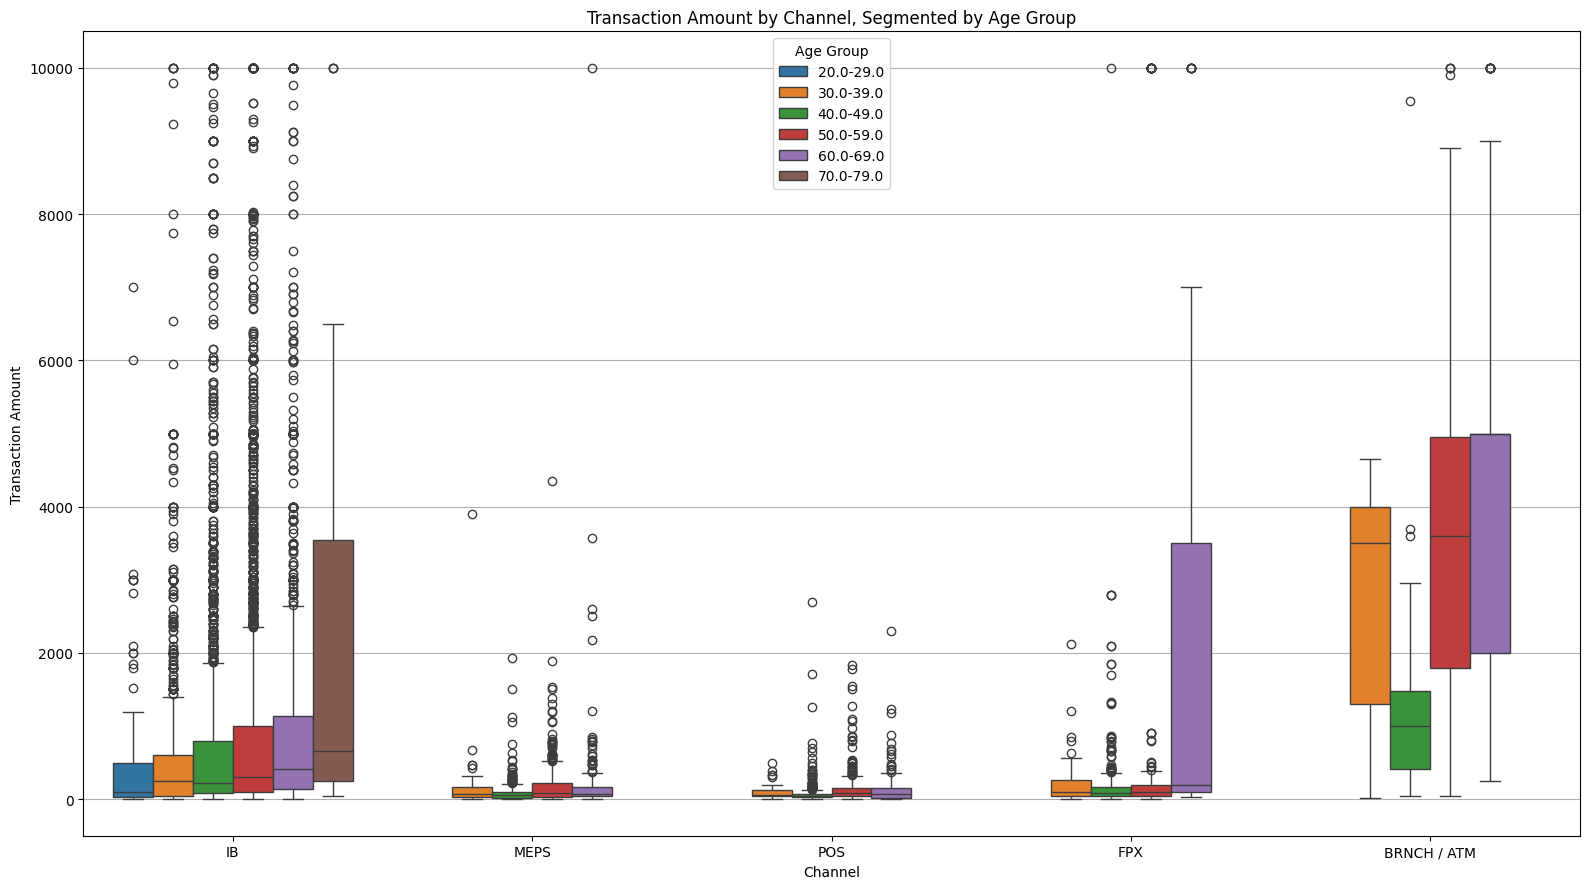

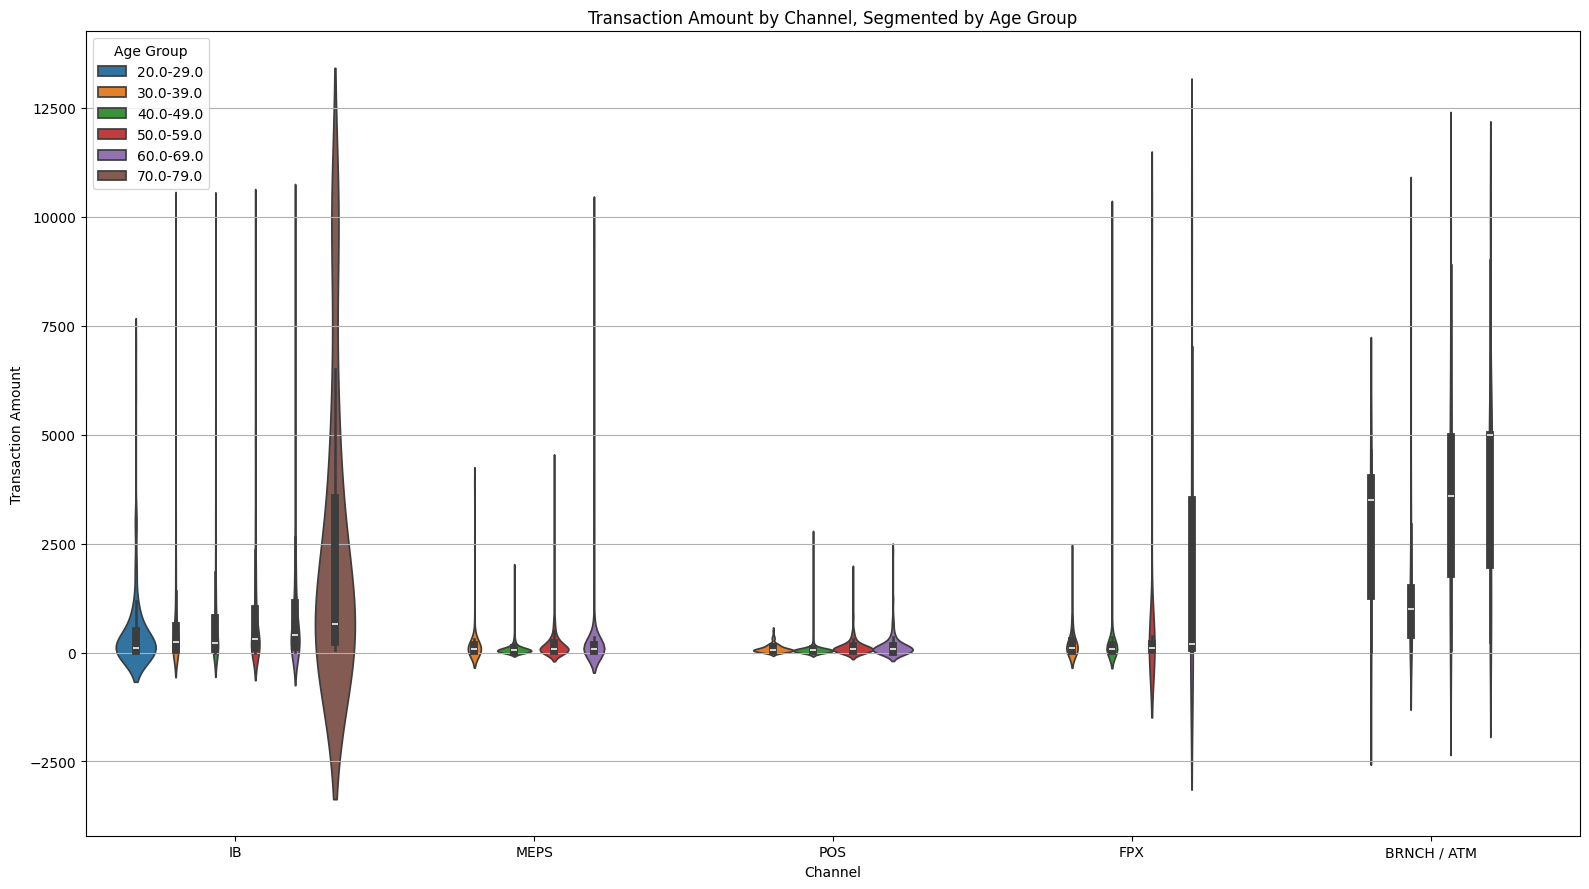

In [ ]:
# Order the age groups for better visualization
age_group_order = sorted(df_final_no_duplicates['age_group'].unique())

plt.figure(figsize=(16, 9))
sns.boxplot(data=df_final_no_duplicates, x='chn', y='amt', hue='age_group')
plt.title('Transaction Amount by Channel, Segmented by Age Group')
plt.xlabel('Channel')
plt.ylabel('Transaction Amount')
plt.legend(title='Age Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 9))
sns.violinplot(data=df_final_no_duplicates, x='chn', y='amt', hue='age_group')
plt.title('Transaction Amount by Channel, Segmented by Age Group')
plt.xlabel('Channel')
plt.ylabel('Transaction Amount')
plt.legend(title='Age Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average transaction amount for each age group
average_transaction_amount_by_age = df_final_no_duplicates.groupby('age_group')['amt'].mean().sort_index()

# Print the results
print("Average Transaction Amount by Age Group:")
print(average_transaction_amount_by_age)

Average Transaction Amount by Age Group:
age_group
20.0-29.0     444.659753
30.0-39.0     594.884559
40.0-49.0     599.681023
50.0-59.0     923.704978
60.0-69.0    1055.179304
70.0-79.0    2384.719615
Name: amt, dtype: float64


<ipython-input-877-749f68b61ed2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_transaction_amount_by_age = df_final_no_duplicates.groupby('age_group')['amt'].mean().sort_index()


In [ ]:
# Filter for debit transactions
debit_transactions = df_final_no_duplicates[df_final_no_duplicates['trn_type'] == 'DEBIT']

# Calculate the average debit transaction amount for each age group
average_debit_amount_by_age = debit_transactions.groupby('age_group')['amt'].mean().sort_index()

# Print the results
print("Average DEBIT Transaction Amount by Age Group:")
print(average_debit_amount_by_age)

Average DEBIT Transaction Amount by Age Group:
age_group
20.0-29.0     487.130000
30.0-39.0     468.850647
40.0-49.0     506.428452
50.0-59.0     780.356963
60.0-69.0     863.426918
70.0-79.0    2384.719615
Name: amt, dtype: float64


<ipython-input-878-5fad2c32f42c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_debit_amount_by_age = debit_transactions.groupby('age_group')['amt'].mean().sort_index()


### Transaction Amount by Gender, Segmented by Age Group

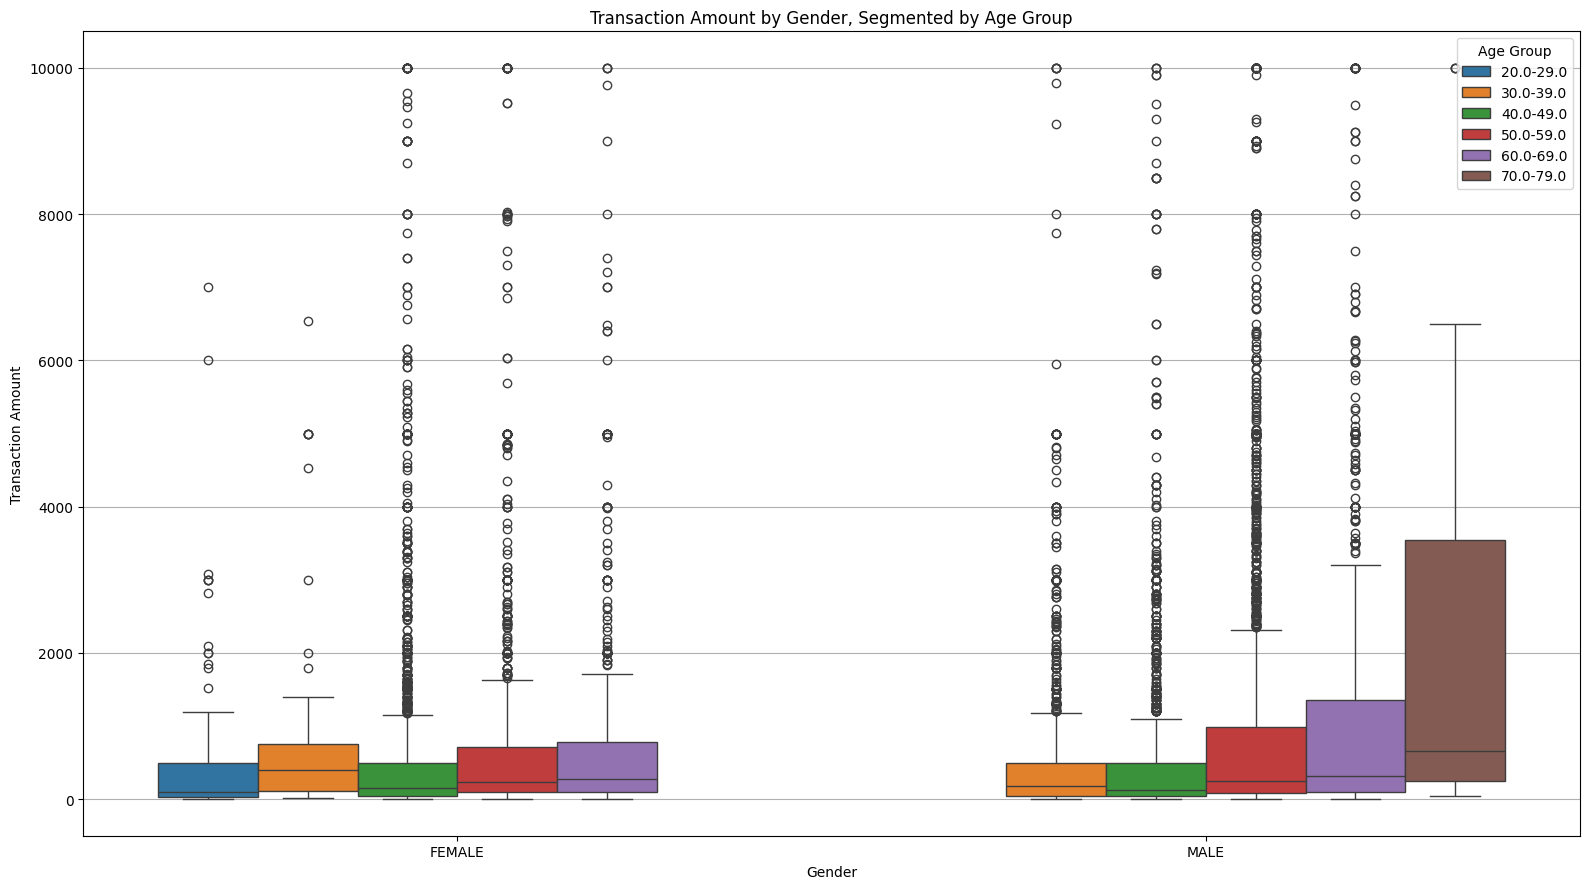

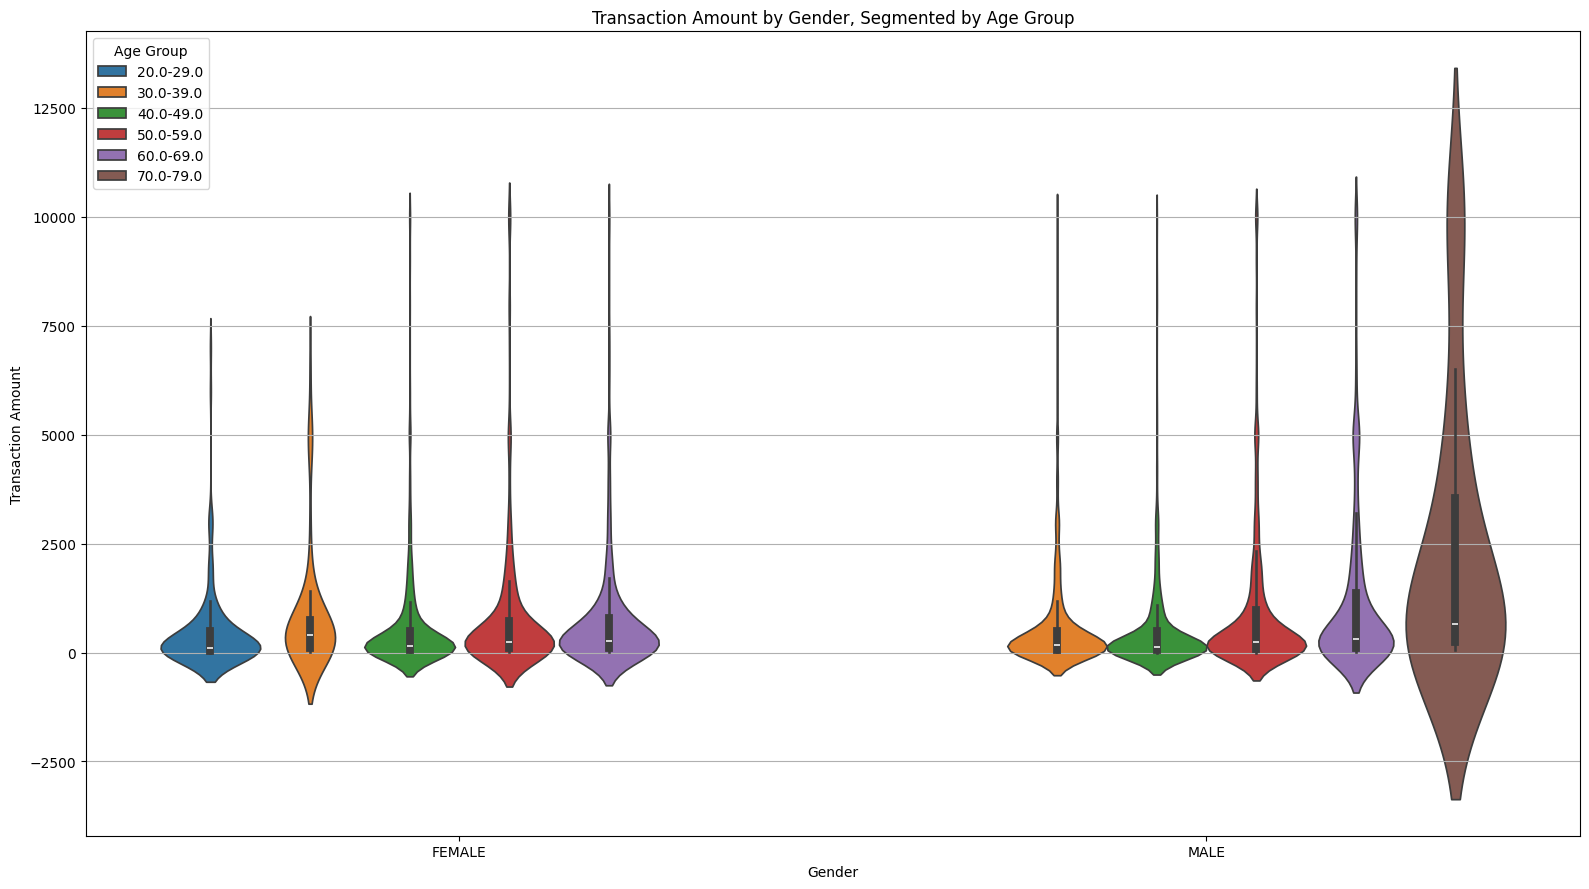

In [ ]:
# Order the age groups for better visualization
age_group_order = sorted(df_final_no_duplicates['age_group'].unique())

plt.figure(figsize=(16, 9))
sns.boxplot(data=df_final_no_duplicates, x='gndr', y='amt', hue='age_group')
plt.title('Transaction Amount by Gender, Segmented by Age Group')
plt.xlabel('Gender')
plt.ylabel('Transaction Amount')
plt.legend(title='Age Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 9))
sns.violinplot(data=df_final_no_duplicates, x='gndr', y='amt', hue='age_group')
plt.title('Transaction Amount by Gender, Segmented by Age Group')
plt.xlabel('Gender')
plt.ylabel('Transaction Amount')
plt.legend(title='Age Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()